In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import datetime
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold

In [4]:
white_wine = pd.read_csv("winequality-white.csv",delimiter=';',header=0)
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
white_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
white_wine = white_wine.values

In [7]:
ivs = white_wine[:,0:11]
quality = white_wine[:,11]
quality = quality.astype(int)

In [8]:
ivs = preprocessing.MinMaxScaler().fit_transform(ivs)

In [18]:
def to_one_hot(labels,dimension=10):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1
    return results

categorical_quality = to_one_hot(quality)
categorical_quality = categorical_quality.astype(float)
categorical_quality[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [10]:
ivs_train, ivs_test, quality_train, quality_test, = train_test_split(ivs,categorical_quality,test_size=.25,random_state=20)

In [9]:
model = Sequential()
model.add(Dense(12,activation='relu',input_dim=11))
model.add(Dense(12,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
start=datetime.datetime.now()

model.fit(ivs_train,quality_train,epochs=25,batch_size=100,verbose=2)
scores = model.evaluate(ivs_test,quality_test,verbose=0)
end=datetime.datetime.now()
print("Run Time:", end-start)

Epoch 1/25
37/37 - 0s - loss: 2.0357 - accuracy: 0.4419
Epoch 2/25
37/37 - 0s - loss: 1.6981 - accuracy: 0.4487
Epoch 3/25
37/37 - 0s - loss: 1.5027 - accuracy: 0.4487
Epoch 4/25
37/37 - 0s - loss: 1.3937 - accuracy: 0.4487
Epoch 5/25
37/37 - 0s - loss: 1.3372 - accuracy: 0.4487
Epoch 6/25
37/37 - 0s - loss: 1.3118 - accuracy: 0.4487
Epoch 7/25
37/37 - 0s - loss: 1.2972 - accuracy: 0.4487
Epoch 8/25
37/37 - 0s - loss: 1.2856 - accuracy: 0.4487
Epoch 9/25
37/37 - 0s - loss: 1.2757 - accuracy: 0.4490
Epoch 10/25
37/37 - 0s - loss: 1.2671 - accuracy: 0.4490
Epoch 11/25
37/37 - 0s - loss: 1.2587 - accuracy: 0.4487
Epoch 12/25
37/37 - 0s - loss: 1.2503 - accuracy: 0.4492
Epoch 13/25
37/37 - 0s - loss: 1.2420 - accuracy: 0.4495
Epoch 14/25
37/37 - 0s - loss: 1.2336 - accuracy: 0.4509
Epoch 15/25
37/37 - 0s - loss: 1.2245 - accuracy: 0.4519
Epoch 16/25
37/37 - 0s - loss: 1.2163 - accuracy: 0.4598
Epoch 17/25
37/37 - 0s - loss: 1.2085 - accuracy: 0.4615
Epoch 18/25
37/37 - 0s - loss: 1.2003 - 

In [10]:
x_val =ivs_train[:1000]
partial_x_train=ivs_train[1000:]

y_val = quality_train[:1000]
partial_y_train = quality_train[1000:]

In [11]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=100,validation_data=(x_val,y_val))

Epoch 1/20
27/27 [==============================] - 1s 33ms/step - loss: 1.1547 - accuracy: 0.5107 - val_loss: 1.1351 - val_accuracy: 0.5200
Epoch 2/20
27/27 [==============================] - 0s 2ms/step - loss: 1.1514 - accuracy: 0.5084 - val_loss: 1.1307 - val_accuracy: 0.5130
Epoch 3/20
27/27 [==============================] - 0s 2ms/step - loss: 1.1492 - accuracy: 0.5092 - val_loss: 1.1287 - val_accuracy: 0.5190
Epoch 4/20
27/27 [==============================] - 0s 2ms/step - loss: 1.1462 - accuracy: 0.5073 - val_loss: 1.1258 - val_accuracy: 0.5190
Epoch 5/20
27/27 [==============================] - 0s 2ms/step - loss: 1.1431 - accuracy: 0.5088 - val_loss: 1.1217 - val_accuracy: 0.5260
Epoch 6/20
27/27 [==============================] - 0s 2ms/step - loss: 1.1413 - accuracy: 0.5129 - val_loss: 1.1194 - val_accuracy: 0.5260
Epoch 7/20
27/27 [==============================] - 0s 2ms/step - loss: 1.1385 - accuracy: 0.5155 - val_loss: 1.1176 - val_accuracy: 0.5220
Epoch 8/20
27/27 [=

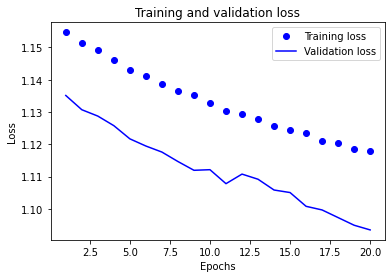

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

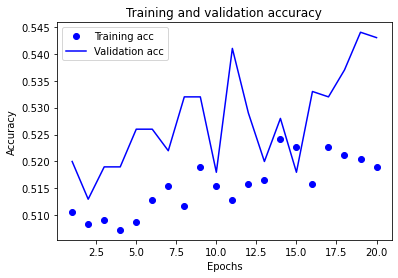

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
nodes_1 = [i for i in range(12,24,2)]
nodes_2 = [i for i in range(10,18,2)]

start = datetime.datetime.now()

initial_accuracies=[]
for i in (nodes_1):
    for j in (nodes_2):
        model = Sequential()
        model.add(Dense(i,input_dim=11,activation='relu'))
        model.add(Dense(j,activation='relu'))
        model.add(Dense(10,activation='softmax'))
        model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
        estimator = model.fit(ivs_train,quality_train,validation_data =(ivs_test,quality_test),epochs=20,verbose=0)
        initial_accuracies.append(((estimator.history['val_accuracy']),('layers',i,j)))

In [15]:
average_accuracies= [(np.mean(initial_accuracies[i][0]),initial_accuracies[i][1]) for i in range(len(initial_accuracies))]
optimal_nodes = max(average_accuracies)

In [18]:
optimal_nodes

(0.5099591836333275, ('layers', 14, 16))

In [26]:
accuracies = []
nodes_3 = [i for i in range(12,28,2)]
for i in (nodes_3):
    model = Sequential()
    model.add(Dense(optimal_nodes[1][1],activation='relu',input_dim=11))
    model.add(Dense(optimal_nodes[1][2],activation='relu'))
    model.add(Dense(i,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    estimator = model.fit(ivs_train,quality_train,validation_data =(ivs_test,quality_test),epochs=20,verbose=0)
    accuracies.append(((estimator.history['val_accuracy']),('layers',i)))

In [37]:
new_averages = [(np.mean(accuracies[i][0]),accuracies[i][1]) for i in range(len(accuracies))]
optimal_hidden_layer = max(new_averages)
optimal_hidden_layer

(0.5113469362258911, ('layers', 16))

In [39]:
model = Sequential()
model.add(Dense(14,activation='relu',input_dim=11))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(ivs_train,quality_train,validation_data =(ivs_test,quality_test),epochs=20,verbose=0)
model.evaluate(ivs_test,quality_test)

39/39 [==============================] - 0s 474us/step - loss: 1.1589 - accuracy: 0.5306


[1.158892273902893, 0.5306122303009033]

In [52]:
def build_model():
    model = Sequential()
    model.add(Dense(14,activation='relu',input_dim=11))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [54]:
for train_index, test_index in KFold(n_splits=10, shuffle=True, random_state=None).split(ivs):
    x_train, x_test=ivs[train_index], ivs[test_index]
    y_train, y_test=categorical_quality[train_index], categorical_quality[test_index]
    model=build_model()
    start=datetime.datetime.now()
    model.fit(x_train, y_train, batch_size=100, epochs=100, verbose=2, validation_data=(x_test, y_test))
    scores = model.evaluate(ivs_test,quality_test,verbose=0)
    end=datetime.datetime.now()
    print("Run Time:", end-start)

Epoch 1/100
45/45 - 1s - loss: 2.0269 - accuracy: 0.3428 - val_loss: 1.7806 - val_accuracy: 0.4776
Epoch 2/100
45/45 - 0s - loss: 1.5829 - accuracy: 0.4456 - val_loss: 1.4401 - val_accuracy: 0.4776
Epoch 3/100
45/45 - 0s - loss: 1.3665 - accuracy: 0.4456 - val_loss: 1.3498 - val_accuracy: 0.4776
Epoch 4/100
45/45 - 0s - loss: 1.3055 - accuracy: 0.4458 - val_loss: 1.3171 - val_accuracy: 0.4776
Epoch 5/100
45/45 - 0s - loss: 1.2692 - accuracy: 0.4546 - val_loss: 1.2862 - val_accuracy: 0.4796
Epoch 6/100
45/45 - 0s - loss: 1.2405 - accuracy: 0.4698 - val_loss: 1.2544 - val_accuracy: 0.4980
Epoch 7/100
45/45 - 0s - loss: 1.2151 - accuracy: 0.4862 - val_loss: 1.2299 - val_accuracy: 0.4735
Epoch 8/100
45/45 - 0s - loss: 1.1968 - accuracy: 0.4955 - val_loss: 1.2118 - val_accuracy: 0.4939
Epoch 9/100
45/45 - 0s - loss: 1.1802 - accuracy: 0.5018 - val_loss: 1.2326 - val_accuracy: 0.4612
Epoch 10/100
45/45 - 0s - loss: 1.1703 - accuracy: 0.5077 - val_loss: 1.1920 - val_accuracy: 0.4918
Epoch 11/

45/45 - 0s - loss: 1.0604 - accuracy: 0.5556 - val_loss: 1.0793 - val_accuracy: 0.5306
Epoch 84/100
45/45 - 0s - loss: 1.0589 - accuracy: 0.5497 - val_loss: 1.0983 - val_accuracy: 0.5102
Epoch 85/100
45/45 - 0s - loss: 1.0594 - accuracy: 0.5563 - val_loss: 1.0785 - val_accuracy: 0.5265
Epoch 86/100
45/45 - 0s - loss: 1.0588 - accuracy: 0.5524 - val_loss: 1.0911 - val_accuracy: 0.5163
Epoch 87/100
45/45 - 0s - loss: 1.0589 - accuracy: 0.5554 - val_loss: 1.1024 - val_accuracy: 0.5122
Epoch 88/100
45/45 - 0s - loss: 1.0569 - accuracy: 0.5547 - val_loss: 1.0902 - val_accuracy: 0.5163
Epoch 89/100
45/45 - 0s - loss: 1.0569 - accuracy: 0.5533 - val_loss: 1.0765 - val_accuracy: 0.5245
Epoch 90/100
45/45 - 0s - loss: 1.0550 - accuracy: 0.5554 - val_loss: 1.0914 - val_accuracy: 0.5143
Epoch 91/100
45/45 - 0s - loss: 1.0555 - accuracy: 0.5583 - val_loss: 1.1123 - val_accuracy: 0.5082
Epoch 92/100
45/45 - 0s - loss: 1.0557 - accuracy: 0.5574 - val_loss: 1.0787 - val_accuracy: 0.5265
Epoch 93/100


Epoch 65/100
45/45 - 0s - loss: 1.0868 - accuracy: 0.5381 - val_loss: 1.1142 - val_accuracy: 0.5551
Epoch 66/100
45/45 - 0s - loss: 1.0860 - accuracy: 0.5402 - val_loss: 1.1137 - val_accuracy: 0.5510
Epoch 67/100
45/45 - 0s - loss: 1.0858 - accuracy: 0.5388 - val_loss: 1.1113 - val_accuracy: 0.5347
Epoch 68/100
45/45 - 0s - loss: 1.0849 - accuracy: 0.5372 - val_loss: 1.1128 - val_accuracy: 0.5327
Epoch 69/100
45/45 - 0s - loss: 1.0846 - accuracy: 0.5415 - val_loss: 1.1221 - val_accuracy: 0.5020
Epoch 70/100
45/45 - 0s - loss: 1.0847 - accuracy: 0.5377 - val_loss: 1.1124 - val_accuracy: 0.5286
Epoch 71/100
45/45 - 0s - loss: 1.0830 - accuracy: 0.5402 - val_loss: 1.1191 - val_accuracy: 0.5224
Epoch 72/100
45/45 - 0s - loss: 1.0824 - accuracy: 0.5424 - val_loss: 1.1174 - val_accuracy: 0.5449
Epoch 73/100
45/45 - 0s - loss: 1.0817 - accuracy: 0.5392 - val_loss: 1.1193 - val_accuracy: 0.5429
Epoch 74/100
45/45 - 0s - loss: 1.0814 - accuracy: 0.5426 - val_loss: 1.1334 - val_accuracy: 0.5000


Epoch 47/100
45/45 - 0s - loss: 1.1061 - accuracy: 0.5381 - val_loss: 1.1745 - val_accuracy: 0.4898
Epoch 48/100
45/45 - 0s - loss: 1.1061 - accuracy: 0.5368 - val_loss: 1.1679 - val_accuracy: 0.4878
Epoch 49/100
45/45 - 0s - loss: 1.1052 - accuracy: 0.5352 - val_loss: 1.1617 - val_accuracy: 0.5102
Epoch 50/100
45/45 - 0s - loss: 1.1053 - accuracy: 0.5370 - val_loss: 1.1580 - val_accuracy: 0.5102
Epoch 51/100
45/45 - 0s - loss: 1.1038 - accuracy: 0.5374 - val_loss: 1.1544 - val_accuracy: 0.4939
Epoch 52/100
45/45 - 0s - loss: 1.1022 - accuracy: 0.5345 - val_loss: 1.1646 - val_accuracy: 0.4816
Epoch 53/100
45/45 - 0s - loss: 1.1032 - accuracy: 0.5361 - val_loss: 1.1558 - val_accuracy: 0.4918
Epoch 54/100
45/45 - 0s - loss: 1.1013 - accuracy: 0.5365 - val_loss: 1.1538 - val_accuracy: 0.4939
Epoch 55/100
45/45 - 0s - loss: 1.1002 - accuracy: 0.5390 - val_loss: 1.1562 - val_accuracy: 0.4898
Epoch 56/100
45/45 - 0s - loss: 1.1000 - accuracy: 0.5324 - val_loss: 1.1538 - val_accuracy: 0.4939


Epoch 29/100
45/45 - 0s - loss: 1.1191 - accuracy: 0.5245 - val_loss: 1.0928 - val_accuracy: 0.5592
Epoch 30/100
45/45 - 0s - loss: 1.1191 - accuracy: 0.5188 - val_loss: 1.0833 - val_accuracy: 0.5694
Epoch 31/100
45/45 - 0s - loss: 1.1182 - accuracy: 0.5256 - val_loss: 1.0799 - val_accuracy: 0.5673
Epoch 32/100
45/45 - 0s - loss: 1.1178 - accuracy: 0.5250 - val_loss: 1.0854 - val_accuracy: 0.5714
Epoch 33/100
45/45 - 0s - loss: 1.1153 - accuracy: 0.5252 - val_loss: 1.0708 - val_accuracy: 0.5673
Epoch 34/100
45/45 - 0s - loss: 1.1150 - accuracy: 0.5200 - val_loss: 1.0699 - val_accuracy: 0.5796
Epoch 35/100
45/45 - 0s - loss: 1.1129 - accuracy: 0.5277 - val_loss: 1.0732 - val_accuracy: 0.5816
Epoch 36/100
45/45 - 0s - loss: 1.1140 - accuracy: 0.5240 - val_loss: 1.0711 - val_accuracy: 0.5735
Epoch 37/100
45/45 - 0s - loss: 1.1122 - accuracy: 0.5225 - val_loss: 1.0748 - val_accuracy: 0.5653
Epoch 38/100
45/45 - 0s - loss: 1.1115 - accuracy: 0.5202 - val_loss: 1.0650 - val_accuracy: 0.5714


Epoch 11/100
45/45 - 0s - loss: 1.1710 - accuracy: 0.4966 - val_loss: 1.1980 - val_accuracy: 0.5143
Epoch 12/100
45/45 - 0s - loss: 1.1634 - accuracy: 0.5091 - val_loss: 1.1992 - val_accuracy: 0.5224
Epoch 13/100
45/45 - 0s - loss: 1.1566 - accuracy: 0.5043 - val_loss: 1.1773 - val_accuracy: 0.5327
Epoch 14/100
45/45 - 0s - loss: 1.1513 - accuracy: 0.5127 - val_loss: 1.1794 - val_accuracy: 0.5347
Epoch 15/100
45/45 - 0s - loss: 1.1483 - accuracy: 0.5125 - val_loss: 1.1707 - val_accuracy: 0.5327
Epoch 16/100
45/45 - 0s - loss: 1.1439 - accuracy: 0.5154 - val_loss: 1.1613 - val_accuracy: 0.5408
Epoch 17/100
45/45 - 0s - loss: 1.1383 - accuracy: 0.5222 - val_loss: 1.1702 - val_accuracy: 0.5347
Epoch 18/100
45/45 - 0s - loss: 1.1370 - accuracy: 0.5179 - val_loss: 1.1554 - val_accuracy: 0.5265
Epoch 19/100
45/45 - 0s - loss: 1.1342 - accuracy: 0.5168 - val_loss: 1.1424 - val_accuracy: 0.5510
Epoch 20/100
45/45 - 0s - loss: 1.1299 - accuracy: 0.5211 - val_loss: 1.1485 - val_accuracy: 0.5367


Epoch 93/100
45/45 - 0s - loss: 1.0963 - accuracy: 0.5345 - val_loss: 1.1262 - val_accuracy: 0.5408
Epoch 94/100
45/45 - 0s - loss: 1.0953 - accuracy: 0.5340 - val_loss: 1.1199 - val_accuracy: 0.5531
Epoch 95/100
45/45 - 0s - loss: 1.0943 - accuracy: 0.5406 - val_loss: 1.1219 - val_accuracy: 0.5490
Epoch 96/100
45/45 - 0s - loss: 1.0942 - accuracy: 0.5343 - val_loss: 1.1377 - val_accuracy: 0.5143
Epoch 97/100
45/45 - 0s - loss: 1.0935 - accuracy: 0.5324 - val_loss: 1.1194 - val_accuracy: 0.5469
Epoch 98/100
45/45 - 0s - loss: 1.0940 - accuracy: 0.5327 - val_loss: 1.1194 - val_accuracy: 0.5612
Epoch 99/100
45/45 - 0s - loss: 1.0920 - accuracy: 0.5354 - val_loss: 1.1393 - val_accuracy: 0.5306
Epoch 100/100
45/45 - 0s - loss: 1.0936 - accuracy: 0.5358 - val_loss: 1.1194 - val_accuracy: 0.5429
Run Time: 0:00:05.209000
Epoch 1/100
45/45 - 1s - loss: 2.0628 - accuracy: 0.1776 - val_loss: 1.8381 - val_accuracy: 0.1980
Epoch 2/100
45/45 - 0s - loss: 1.6859 - accuracy: 0.2970 - val_loss: 1.5589

Epoch 75/100
45/45 - 0s - loss: 1.0721 - accuracy: 0.5538 - val_loss: 1.1246 - val_accuracy: 0.4735
Epoch 76/100
45/45 - 0s - loss: 1.0723 - accuracy: 0.5508 - val_loss: 1.1244 - val_accuracy: 0.5020
Epoch 77/100
45/45 - 0s - loss: 1.0706 - accuracy: 0.5558 - val_loss: 1.1186 - val_accuracy: 0.5082
Epoch 78/100
45/45 - 0s - loss: 1.0711 - accuracy: 0.5490 - val_loss: 1.1202 - val_accuracy: 0.5020
Epoch 79/100
45/45 - 0s - loss: 1.0697 - accuracy: 0.5551 - val_loss: 1.1326 - val_accuracy: 0.4857
Epoch 80/100
45/45 - 0s - loss: 1.0701 - accuracy: 0.5542 - val_loss: 1.1244 - val_accuracy: 0.5082
Epoch 81/100
45/45 - 0s - loss: 1.0695 - accuracy: 0.5576 - val_loss: 1.1260 - val_accuracy: 0.5020
Epoch 82/100
45/45 - 0s - loss: 1.0687 - accuracy: 0.5565 - val_loss: 1.1241 - val_accuracy: 0.4776
Epoch 83/100
45/45 - 0s - loss: 1.0684 - accuracy: 0.5513 - val_loss: 1.1228 - val_accuracy: 0.5041
Epoch 84/100
45/45 - 0s - loss: 1.0675 - accuracy: 0.5563 - val_loss: 1.1226 - val_accuracy: 0.4776


Epoch 57/100
45/45 - 0s - loss: 1.0894 - accuracy: 0.5386 - val_loss: 1.0808 - val_accuracy: 0.5347
Epoch 58/100
45/45 - 0s - loss: 1.0885 - accuracy: 0.5381 - val_loss: 1.0757 - val_accuracy: 0.5592
Epoch 59/100
45/45 - 0s - loss: 1.0885 - accuracy: 0.5411 - val_loss: 1.0885 - val_accuracy: 0.5551
Epoch 60/100
45/45 - 0s - loss: 1.0884 - accuracy: 0.5392 - val_loss: 1.0780 - val_accuracy: 0.5551
Epoch 61/100
45/45 - 0s - loss: 1.0878 - accuracy: 0.5397 - val_loss: 1.0835 - val_accuracy: 0.5510
Epoch 62/100
45/45 - 0s - loss: 1.0868 - accuracy: 0.5411 - val_loss: 1.0864 - val_accuracy: 0.5367
Epoch 63/100
45/45 - 0s - loss: 1.0865 - accuracy: 0.5399 - val_loss: 1.0765 - val_accuracy: 0.5592
Epoch 64/100
45/45 - 0s - loss: 1.0851 - accuracy: 0.5390 - val_loss: 1.0830 - val_accuracy: 0.5429
Epoch 65/100
45/45 - 0s - loss: 1.0858 - accuracy: 0.5363 - val_loss: 1.0800 - val_accuracy: 0.5429
Epoch 66/100
45/45 - 0s - loss: 1.0853 - accuracy: 0.5417 - val_loss: 1.0768 - val_accuracy: 0.5531


Epoch 39/100
45/45 - 0s - loss: 1.1038 - accuracy: 0.5327 - val_loss: 1.0766 - val_accuracy: 0.5571
Epoch 40/100
45/45 - 0s - loss: 1.1046 - accuracy: 0.5352 - val_loss: 1.0620 - val_accuracy: 0.5673
Epoch 41/100
45/45 - 0s - loss: 1.1043 - accuracy: 0.5315 - val_loss: 1.0654 - val_accuracy: 0.5633
Epoch 42/100
45/45 - 0s - loss: 1.1022 - accuracy: 0.5313 - val_loss: 1.0777 - val_accuracy: 0.5531
Epoch 43/100
45/45 - 0s - loss: 1.1025 - accuracy: 0.5281 - val_loss: 1.0568 - val_accuracy: 0.5449
Epoch 44/100
45/45 - 0s - loss: 1.1007 - accuracy: 0.5343 - val_loss: 1.0601 - val_accuracy: 0.5347
Epoch 45/100
45/45 - 0s - loss: 1.1000 - accuracy: 0.5352 - val_loss: 1.0553 - val_accuracy: 0.5531
Epoch 46/100
45/45 - 0s - loss: 1.0990 - accuracy: 0.5338 - val_loss: 1.0561 - val_accuracy: 0.5571
Epoch 47/100
45/45 - 0s - loss: 1.0968 - accuracy: 0.5331 - val_loss: 1.0623 - val_accuracy: 0.5551
Epoch 48/100
45/45 - 0s - loss: 1.0965 - accuracy: 0.5374 - val_loss: 1.0533 - val_accuracy: 0.5551


Epoch 21/100
45/45 - 0s - loss: 1.1075 - accuracy: 0.5264 - val_loss: 1.1658 - val_accuracy: 0.5194
Epoch 22/100
45/45 - 0s - loss: 1.1058 - accuracy: 0.5303 - val_loss: 1.1603 - val_accuracy: 0.5235
Epoch 23/100
45/45 - 0s - loss: 1.1044 - accuracy: 0.5289 - val_loss: 1.1607 - val_accuracy: 0.5337
Epoch 24/100
45/45 - 0s - loss: 1.1040 - accuracy: 0.5307 - val_loss: 1.1602 - val_accuracy: 0.5337
Epoch 25/100
45/45 - 0s - loss: 1.1036 - accuracy: 0.5242 - val_loss: 1.1657 - val_accuracy: 0.5460
Epoch 26/100
45/45 - 0s - loss: 1.1034 - accuracy: 0.5291 - val_loss: 1.1666 - val_accuracy: 0.5399
Epoch 27/100
45/45 - 0s - loss: 1.1021 - accuracy: 0.5301 - val_loss: 1.1623 - val_accuracy: 0.5317
Epoch 28/100
45/45 - 0s - loss: 1.1002 - accuracy: 0.5278 - val_loss: 1.1638 - val_accuracy: 0.5235
Epoch 29/100
45/45 - 0s - loss: 1.0996 - accuracy: 0.5346 - val_loss: 1.1618 - val_accuracy: 0.5378
Epoch 30/100
45/45 - 0s - loss: 1.0996 - accuracy: 0.5291 - val_loss: 1.1605 - val_accuracy: 0.5378


Epoch 3/100
45/45 - 0s - loss: 1.3466 - accuracy: 0.4493 - val_loss: 1.2856 - val_accuracy: 0.4438
Epoch 4/100
45/45 - 0s - loss: 1.3073 - accuracy: 0.4493 - val_loss: 1.2621 - val_accuracy: 0.4438
Epoch 5/100
45/45 - 0s - loss: 1.2877 - accuracy: 0.4493 - val_loss: 1.2479 - val_accuracy: 0.4438
Epoch 6/100
45/45 - 0s - loss: 1.2694 - accuracy: 0.4493 - val_loss: 1.2261 - val_accuracy: 0.4438
Epoch 7/100
45/45 - 0s - loss: 1.2502 - accuracy: 0.4527 - val_loss: 1.2068 - val_accuracy: 0.5031
Epoch 8/100
45/45 - 0s - loss: 1.2310 - accuracy: 0.4731 - val_loss: 1.1866 - val_accuracy: 0.4458
Epoch 9/100
45/45 - 0s - loss: 1.2132 - accuracy: 0.4777 - val_loss: 1.1597 - val_accuracy: 0.5153
Epoch 10/100
45/45 - 0s - loss: 1.1992 - accuracy: 0.4917 - val_loss: 1.1357 - val_accuracy: 0.5051
Epoch 11/100
45/45 - 0s - loss: 1.1853 - accuracy: 0.4994 - val_loss: 1.1197 - val_accuracy: 0.5174
Epoch 12/100
45/45 - 0s - loss: 1.1742 - accuracy: 0.5065 - val_loss: 1.1095 - val_accuracy: 0.5051
Epoch 1

Epoch 85/100
45/45 - 0s - loss: 1.0911 - accuracy: 0.5439 - val_loss: 1.0503 - val_accuracy: 0.5153
Epoch 86/100
45/45 - 0s - loss: 1.0922 - accuracy: 0.5387 - val_loss: 1.0488 - val_accuracy: 0.5460
Epoch 87/100
45/45 - 0s - loss: 1.0907 - accuracy: 0.5416 - val_loss: 1.0462 - val_accuracy: 0.5235
Epoch 88/100
45/45 - 0s - loss: 1.0892 - accuracy: 0.5400 - val_loss: 1.0432 - val_accuracy: 0.5440
Epoch 89/100
45/45 - 0s - loss: 1.0903 - accuracy: 0.5396 - val_loss: 1.0450 - val_accuracy: 0.5256
Epoch 90/100
45/45 - 0s - loss: 1.0899 - accuracy: 0.5375 - val_loss: 1.0417 - val_accuracy: 0.5337
Epoch 91/100
45/45 - 0s - loss: 1.0890 - accuracy: 0.5407 - val_loss: 1.0413 - val_accuracy: 0.5460
Epoch 92/100
45/45 - 0s - loss: 1.0889 - accuracy: 0.5391 - val_loss: 1.0603 - val_accuracy: 0.5153
Epoch 93/100
45/45 - 0s - loss: 1.0885 - accuracy: 0.5394 - val_loss: 1.0489 - val_accuracy: 0.5194
Epoch 94/100
45/45 - 0s - loss: 1.0871 - accuracy: 0.5421 - val_loss: 1.0445 - val_accuracy: 0.5092


In [55]:
accs = []
for train_index, test_index in KFold(n_splits=10, shuffle=True, random_state=None).split(ivs):
    x_train, x_test=ivs[train_index], ivs[test_index]
    y_train, y_test=categorical_quality[train_index], categorical_quality[test_index]
    model=build_model()
    start=datetime.datetime.now()
    history = model.fit(x_train, y_train, batch_size=100, epochs=300, verbose=2, validation_data=(x_test, y_test))
    acc_history = history.history['val_accuracy']
    accs.append(acc_history)
    


Epoch 1/300
45/45 - 1s - loss: 2.0853 - accuracy: 0.2995 - val_loss: 1.9204 - val_accuracy: 0.2796
Epoch 2/300
45/45 - 0s - loss: 1.7124 - accuracy: 0.2995 - val_loss: 1.5869 - val_accuracy: 0.2796
Epoch 3/300
45/45 - 0s - loss: 1.4224 - accuracy: 0.3938 - val_loss: 1.3997 - val_accuracy: 0.4429
Epoch 4/300
45/45 - 0s - loss: 1.3183 - accuracy: 0.4496 - val_loss: 1.3550 - val_accuracy: 0.4633
Epoch 5/300
45/45 - 0s - loss: 1.2773 - accuracy: 0.4555 - val_loss: 1.3159 - val_accuracy: 0.4429
Epoch 6/300
45/45 - 0s - loss: 1.2480 - accuracy: 0.4691 - val_loss: 1.2842 - val_accuracy: 0.4673
Epoch 7/300
45/45 - 0s - loss: 1.2238 - accuracy: 0.4891 - val_loss: 1.2654 - val_accuracy: 0.4429
Epoch 8/300
45/45 - 0s - loss: 1.2053 - accuracy: 0.4964 - val_loss: 1.2531 - val_accuracy: 0.4837
Epoch 9/300
45/45 - 0s - loss: 1.1901 - accuracy: 0.5027 - val_loss: 1.2419 - val_accuracy: 0.4898
Epoch 10/300
45/45 - 0s - loss: 1.1788 - accuracy: 0.5045 - val_loss: 1.2396 - val_accuracy: 0.4816
Epoch 11/

45/45 - 0s - loss: 1.0880 - accuracy: 0.5454 - val_loss: 1.1475 - val_accuracy: 0.5082
Epoch 84/300
45/45 - 0s - loss: 1.0860 - accuracy: 0.5463 - val_loss: 1.1440 - val_accuracy: 0.5061
Epoch 85/300
45/45 - 0s - loss: 1.0864 - accuracy: 0.5449 - val_loss: 1.1264 - val_accuracy: 0.5102
Epoch 86/300
45/45 - 0s - loss: 1.0862 - accuracy: 0.5458 - val_loss: 1.1453 - val_accuracy: 0.5041
Epoch 87/300
45/45 - 0s - loss: 1.0850 - accuracy: 0.5431 - val_loss: 1.1282 - val_accuracy: 0.4980
Epoch 88/300
45/45 - 0s - loss: 1.0838 - accuracy: 0.5472 - val_loss: 1.1276 - val_accuracy: 0.5122
Epoch 89/300
45/45 - 0s - loss: 1.0838 - accuracy: 0.5488 - val_loss: 1.1248 - val_accuracy: 0.4980
Epoch 90/300
45/45 - 0s - loss: 1.0828 - accuracy: 0.5447 - val_loss: 1.1236 - val_accuracy: 0.5041
Epoch 91/300
45/45 - 0s - loss: 1.0830 - accuracy: 0.5454 - val_loss: 1.1300 - val_accuracy: 0.5204
Epoch 92/300
45/45 - 0s - loss: 1.0814 - accuracy: 0.5470 - val_loss: 1.1258 - val_accuracy: 0.5041
Epoch 93/300


Epoch 165/300
45/45 - 0s - loss: 1.0480 - accuracy: 0.5597 - val_loss: 1.1177 - val_accuracy: 0.5367
Epoch 166/300
45/45 - 0s - loss: 1.0481 - accuracy: 0.5569 - val_loss: 1.1092 - val_accuracy: 0.5286
Epoch 167/300
45/45 - 0s - loss: 1.0472 - accuracy: 0.5597 - val_loss: 1.0997 - val_accuracy: 0.5265
Epoch 168/300
45/45 - 0s - loss: 1.0483 - accuracy: 0.5569 - val_loss: 1.1078 - val_accuracy: 0.5429
Epoch 169/300
45/45 - 0s - loss: 1.0471 - accuracy: 0.5583 - val_loss: 1.1008 - val_accuracy: 0.5347
Epoch 170/300
45/45 - 0s - loss: 1.0469 - accuracy: 0.5628 - val_loss: 1.1169 - val_accuracy: 0.5245
Epoch 171/300
45/45 - 0s - loss: 1.0469 - accuracy: 0.5574 - val_loss: 1.1125 - val_accuracy: 0.5143
Epoch 172/300
45/45 - 0s - loss: 1.0463 - accuracy: 0.5606 - val_loss: 1.1069 - val_accuracy: 0.5204
Epoch 173/300
45/45 - 0s - loss: 1.0466 - accuracy: 0.5637 - val_loss: 1.1047 - val_accuracy: 0.5306
Epoch 174/300
45/45 - 0s - loss: 1.0481 - accuracy: 0.5578 - val_loss: 1.1035 - val_accurac

45/45 - 0s - loss: 1.0317 - accuracy: 0.5613 - val_loss: 1.0998 - val_accuracy: 0.5347
Epoch 247/300
45/45 - 0s - loss: 1.0338 - accuracy: 0.5592 - val_loss: 1.1150 - val_accuracy: 0.5408
Epoch 248/300
45/45 - 0s - loss: 1.0326 - accuracy: 0.5581 - val_loss: 1.1214 - val_accuracy: 0.5388
Epoch 249/300
45/45 - 0s - loss: 1.0327 - accuracy: 0.5583 - val_loss: 1.1145 - val_accuracy: 0.5367
Epoch 250/300
45/45 - 0s - loss: 1.0319 - accuracy: 0.5613 - val_loss: 1.1103 - val_accuracy: 0.5490
Epoch 251/300
45/45 - 0s - loss: 1.0325 - accuracy: 0.5606 - val_loss: 1.1041 - val_accuracy: 0.5490
Epoch 252/300
45/45 - 0s - loss: 1.0331 - accuracy: 0.5578 - val_loss: 1.1110 - val_accuracy: 0.5429
Epoch 253/300
45/45 - 0s - loss: 1.0317 - accuracy: 0.5524 - val_loss: 1.1074 - val_accuracy: 0.5306
Epoch 254/300
45/45 - 0s - loss: 1.0320 - accuracy: 0.5576 - val_loss: 1.0961 - val_accuracy: 0.5367
Epoch 255/300
45/45 - 0s - loss: 1.0312 - accuracy: 0.5583 - val_loss: 1.0967 - val_accuracy: 0.5429
Epoc

Epoch 28/300
45/45 - 0s - loss: 1.1123 - accuracy: 0.5315 - val_loss: 1.0959 - val_accuracy: 0.5102
Epoch 29/300
45/45 - 0s - loss: 1.1115 - accuracy: 0.5329 - val_loss: 1.1043 - val_accuracy: 0.5102
Epoch 30/300
45/45 - 0s - loss: 1.1097 - accuracy: 0.5315 - val_loss: 1.1096 - val_accuracy: 0.5041
Epoch 31/300
45/45 - 0s - loss: 1.1091 - accuracy: 0.5392 - val_loss: 1.0939 - val_accuracy: 0.5184
Epoch 32/300
45/45 - 0s - loss: 1.1080 - accuracy: 0.5345 - val_loss: 1.1086 - val_accuracy: 0.5041
Epoch 33/300
45/45 - 0s - loss: 1.1074 - accuracy: 0.5343 - val_loss: 1.0937 - val_accuracy: 0.5265
Epoch 34/300
45/45 - 0s - loss: 1.1064 - accuracy: 0.5343 - val_loss: 1.1033 - val_accuracy: 0.5061
Epoch 35/300
45/45 - 0s - loss: 1.1052 - accuracy: 0.5322 - val_loss: 1.0925 - val_accuracy: 0.5204
Epoch 36/300
45/45 - 0s - loss: 1.1046 - accuracy: 0.5318 - val_loss: 1.1025 - val_accuracy: 0.5000
Epoch 37/300
45/45 - 0s - loss: 1.1027 - accuracy: 0.5377 - val_loss: 1.1006 - val_accuracy: 0.5143


Epoch 110/300
45/45 - 0s - loss: 1.0590 - accuracy: 0.5467 - val_loss: 1.0559 - val_accuracy: 0.5388
Epoch 111/300
45/45 - 0s - loss: 1.0571 - accuracy: 0.5472 - val_loss: 1.0527 - val_accuracy: 0.5612
Epoch 112/300
45/45 - 0s - loss: 1.0569 - accuracy: 0.5463 - val_loss: 1.0552 - val_accuracy: 0.5408
Epoch 113/300
45/45 - 0s - loss: 1.0565 - accuracy: 0.5481 - val_loss: 1.0502 - val_accuracy: 0.5571
Epoch 114/300
45/45 - 0s - loss: 1.0557 - accuracy: 0.5492 - val_loss: 1.0532 - val_accuracy: 0.5490
Epoch 115/300
45/45 - 0s - loss: 1.0558 - accuracy: 0.5481 - val_loss: 1.0650 - val_accuracy: 0.5286
Epoch 116/300
45/45 - 0s - loss: 1.0550 - accuracy: 0.5474 - val_loss: 1.0563 - val_accuracy: 0.5408
Epoch 117/300
45/45 - 0s - loss: 1.0550 - accuracy: 0.5490 - val_loss: 1.0610 - val_accuracy: 0.5265
Epoch 118/300
45/45 - 0s - loss: 1.0536 - accuracy: 0.5501 - val_loss: 1.0640 - val_accuracy: 0.5347
Epoch 119/300
45/45 - 0s - loss: 1.0529 - accuracy: 0.5533 - val_loss: 1.0500 - val_accurac

45/45 - 0s - loss: 1.0285 - accuracy: 0.5576 - val_loss: 1.0746 - val_accuracy: 0.5061
Epoch 192/300
45/45 - 0s - loss: 1.0287 - accuracy: 0.5588 - val_loss: 1.0308 - val_accuracy: 0.5612
Epoch 193/300
45/45 - 0s - loss: 1.0287 - accuracy: 0.5574 - val_loss: 1.0461 - val_accuracy: 0.5327
Epoch 194/300
45/45 - 0s - loss: 1.0280 - accuracy: 0.5576 - val_loss: 1.0387 - val_accuracy: 0.5306
Epoch 195/300
45/45 - 0s - loss: 1.0277 - accuracy: 0.5590 - val_loss: 1.0516 - val_accuracy: 0.5306
Epoch 196/300
45/45 - 0s - loss: 1.0266 - accuracy: 0.5613 - val_loss: 1.0415 - val_accuracy: 0.5388
Epoch 197/300
45/45 - 0s - loss: 1.0263 - accuracy: 0.5624 - val_loss: 1.0309 - val_accuracy: 0.5796
Epoch 198/300
45/45 - 0s - loss: 1.0263 - accuracy: 0.5615 - val_loss: 1.0315 - val_accuracy: 0.5510
Epoch 199/300
45/45 - 0s - loss: 1.0261 - accuracy: 0.5613 - val_loss: 1.0977 - val_accuracy: 0.4898
Epoch 200/300
45/45 - 0s - loss: 1.0250 - accuracy: 0.5594 - val_loss: 1.0224 - val_accuracy: 0.5694
Epoc

Epoch 273/300
45/45 - 0s - loss: 1.0039 - accuracy: 0.5730 - val_loss: 1.0582 - val_accuracy: 0.5286
Epoch 274/300
45/45 - 0s - loss: 1.0068 - accuracy: 0.5774 - val_loss: 1.0124 - val_accuracy: 0.5755
Epoch 275/300
45/45 - 0s - loss: 1.0039 - accuracy: 0.5733 - val_loss: 1.0470 - val_accuracy: 0.5367
Epoch 276/300
45/45 - 0s - loss: 1.0056 - accuracy: 0.5678 - val_loss: 1.0335 - val_accuracy: 0.5408
Epoch 277/300
45/45 - 0s - loss: 1.0030 - accuracy: 0.5719 - val_loss: 1.0102 - val_accuracy: 0.5551
Epoch 278/300
45/45 - 0s - loss: 1.0032 - accuracy: 0.5760 - val_loss: 1.0125 - val_accuracy: 0.5633
Epoch 279/300
45/45 - 0s - loss: 1.0048 - accuracy: 0.5744 - val_loss: 1.0081 - val_accuracy: 0.5653
Epoch 280/300
45/45 - 0s - loss: 1.0023 - accuracy: 0.5724 - val_loss: 1.0129 - val_accuracy: 0.5837
Epoch 281/300
45/45 - 0s - loss: 1.0003 - accuracy: 0.5717 - val_loss: 1.0973 - val_accuracy: 0.5122
Epoch 282/300
45/45 - 0s - loss: 1.0043 - accuracy: 0.5744 - val_loss: 1.0169 - val_accurac

Epoch 55/300
45/45 - 0s - loss: 1.0919 - accuracy: 0.5374 - val_loss: 1.0674 - val_accuracy: 0.5245
Epoch 56/300
45/45 - 0s - loss: 1.0912 - accuracy: 0.5395 - val_loss: 1.0809 - val_accuracy: 0.5184
Epoch 57/300
45/45 - 0s - loss: 1.0894 - accuracy: 0.5381 - val_loss: 1.1006 - val_accuracy: 0.4857
Epoch 58/300
45/45 - 0s - loss: 1.0913 - accuracy: 0.5406 - val_loss: 1.0734 - val_accuracy: 0.5571
Epoch 59/300
45/45 - 0s - loss: 1.0875 - accuracy: 0.5413 - val_loss: 1.0773 - val_accuracy: 0.5571
Epoch 60/300
45/45 - 0s - loss: 1.0870 - accuracy: 0.5417 - val_loss: 1.0705 - val_accuracy: 0.5612
Epoch 61/300
45/45 - 0s - loss: 1.0857 - accuracy: 0.5340 - val_loss: 1.0614 - val_accuracy: 0.5327
Epoch 62/300
45/45 - 0s - loss: 1.0855 - accuracy: 0.5392 - val_loss: 1.0636 - val_accuracy: 0.5306
Epoch 63/300
45/45 - 0s - loss: 1.0838 - accuracy: 0.5454 - val_loss: 1.0687 - val_accuracy: 0.5184
Epoch 64/300
45/45 - 0s - loss: 1.0835 - accuracy: 0.5411 - val_loss: 1.0814 - val_accuracy: 0.5245


Epoch 137/300
45/45 - 0s - loss: 1.0527 - accuracy: 0.5549 - val_loss: 1.0381 - val_accuracy: 0.5551
Epoch 138/300
45/45 - 0s - loss: 1.0522 - accuracy: 0.5585 - val_loss: 1.0384 - val_accuracy: 0.5714
Epoch 139/300
45/45 - 0s - loss: 1.0533 - accuracy: 0.5538 - val_loss: 1.0346 - val_accuracy: 0.5449
Epoch 140/300
45/45 - 0s - loss: 1.0516 - accuracy: 0.5520 - val_loss: 1.0354 - val_accuracy: 0.5469
Epoch 141/300
45/45 - 0s - loss: 1.0509 - accuracy: 0.5542 - val_loss: 1.0630 - val_accuracy: 0.5673
Epoch 142/300
45/45 - 0s - loss: 1.0525 - accuracy: 0.5524 - val_loss: 1.0484 - val_accuracy: 0.5531
Epoch 143/300
45/45 - 0s - loss: 1.0523 - accuracy: 0.5574 - val_loss: 1.0379 - val_accuracy: 0.5571
Epoch 144/300
45/45 - 0s - loss: 1.0508 - accuracy: 0.5560 - val_loss: 1.0395 - val_accuracy: 0.5429
Epoch 145/300
45/45 - 0s - loss: 1.0502 - accuracy: 0.5549 - val_loss: 1.0493 - val_accuracy: 0.5633
Epoch 146/300
45/45 - 0s - loss: 1.0495 - accuracy: 0.5554 - val_loss: 1.0374 - val_accurac

45/45 - 0s - loss: 1.0278 - accuracy: 0.5569 - val_loss: 1.0281 - val_accuracy: 0.5673
Epoch 219/300
45/45 - 0s - loss: 1.0275 - accuracy: 0.5601 - val_loss: 1.0322 - val_accuracy: 0.5429
Epoch 220/300
45/45 - 0s - loss: 1.0268 - accuracy: 0.5633 - val_loss: 1.0317 - val_accuracy: 0.5408
Epoch 221/300
45/45 - 0s - loss: 1.0271 - accuracy: 0.5617 - val_loss: 1.0288 - val_accuracy: 0.5592
Epoch 222/300
45/45 - 0s - loss: 1.0267 - accuracy: 0.5547 - val_loss: 1.0237 - val_accuracy: 0.5469
Epoch 223/300
45/45 - 0s - loss: 1.0250 - accuracy: 0.5583 - val_loss: 1.0362 - val_accuracy: 0.5429
Epoch 224/300
45/45 - 0s - loss: 1.0274 - accuracy: 0.5567 - val_loss: 1.0223 - val_accuracy: 0.5510
Epoch 225/300
45/45 - 0s - loss: 1.0250 - accuracy: 0.5597 - val_loss: 1.0340 - val_accuracy: 0.5653
Epoch 226/300
45/45 - 0s - loss: 1.0244 - accuracy: 0.5558 - val_loss: 1.0302 - val_accuracy: 0.5449
Epoch 227/300
45/45 - 0s - loss: 1.0250 - accuracy: 0.5594 - val_loss: 1.0300 - val_accuracy: 0.5449
Epoc

Epoch 300/300
45/45 - 0s - loss: 1.0126 - accuracy: 0.5613 - val_loss: 1.0185 - val_accuracy: 0.5531
Epoch 1/300
45/45 - 1s - loss: 2.0990 - accuracy: 0.3997 - val_loss: 1.8483 - val_accuracy: 0.4429
Epoch 2/300
45/45 - 0s - loss: 1.6386 - accuracy: 0.4494 - val_loss: 1.5060 - val_accuracy: 0.4429
Epoch 3/300
45/45 - 0s - loss: 1.3955 - accuracy: 0.4494 - val_loss: 1.3886 - val_accuracy: 0.4429
Epoch 4/300
45/45 - 0s - loss: 1.3157 - accuracy: 0.4494 - val_loss: 1.3529 - val_accuracy: 0.4429
Epoch 5/300
45/45 - 0s - loss: 1.2835 - accuracy: 0.4501 - val_loss: 1.3293 - val_accuracy: 0.4429
Epoch 6/300
45/45 - 0s - loss: 1.2594 - accuracy: 0.4571 - val_loss: 1.3025 - val_accuracy: 0.4694
Epoch 7/300
45/45 - 0s - loss: 1.2338 - accuracy: 0.4682 - val_loss: 1.2701 - val_accuracy: 0.4714
Epoch 8/300
45/45 - 0s - loss: 1.2058 - accuracy: 0.4882 - val_loss: 1.2523 - val_accuracy: 0.4653
Epoch 9/300
45/45 - 0s - loss: 1.1827 - accuracy: 0.4989 - val_loss: 1.2396 - val_accuracy: 0.4653
Epoch 10

Epoch 83/300
45/45 - 0s - loss: 1.0639 - accuracy: 0.5474 - val_loss: 1.1274 - val_accuracy: 0.5143
Epoch 84/300
45/45 - 0s - loss: 1.0641 - accuracy: 0.5499 - val_loss: 1.1259 - val_accuracy: 0.5143
Epoch 85/300
45/45 - 0s - loss: 1.0625 - accuracy: 0.5522 - val_loss: 1.1174 - val_accuracy: 0.4980
Epoch 86/300
45/45 - 0s - loss: 1.0606 - accuracy: 0.5513 - val_loss: 1.1383 - val_accuracy: 0.4959
Epoch 87/300
45/45 - 0s - loss: 1.0610 - accuracy: 0.5540 - val_loss: 1.1232 - val_accuracy: 0.5082
Epoch 88/300
45/45 - 0s - loss: 1.0602 - accuracy: 0.5474 - val_loss: 1.1286 - val_accuracy: 0.5122
Epoch 89/300
45/45 - 0s - loss: 1.0602 - accuracy: 0.5538 - val_loss: 1.1227 - val_accuracy: 0.5082
Epoch 90/300
45/45 - 0s - loss: 1.0600 - accuracy: 0.5442 - val_loss: 1.1251 - val_accuracy: 0.5102
Epoch 91/300
45/45 - 0s - loss: 1.0588 - accuracy: 0.5513 - val_loss: 1.1284 - val_accuracy: 0.5143
Epoch 92/300
45/45 - 0s - loss: 1.0589 - accuracy: 0.5526 - val_loss: 1.1203 - val_accuracy: 0.5184


Epoch 165/300
45/45 - 0s - loss: 1.0242 - accuracy: 0.5742 - val_loss: 1.1231 - val_accuracy: 0.5163
Epoch 166/300
45/45 - 0s - loss: 1.0245 - accuracy: 0.5696 - val_loss: 1.1051 - val_accuracy: 0.5224
Epoch 167/300
45/45 - 0s - loss: 1.0220 - accuracy: 0.5701 - val_loss: 1.1108 - val_accuracy: 0.5265
Epoch 168/300
45/45 - 0s - loss: 1.0229 - accuracy: 0.5735 - val_loss: 1.1149 - val_accuracy: 0.5020
Epoch 169/300
45/45 - 0s - loss: 1.0234 - accuracy: 0.5692 - val_loss: 1.1099 - val_accuracy: 0.5204
Epoch 170/300
45/45 - 0s - loss: 1.0219 - accuracy: 0.5721 - val_loss: 1.1088 - val_accuracy: 0.5143
Epoch 171/300
45/45 - 0s - loss: 1.0222 - accuracy: 0.5710 - val_loss: 1.1075 - val_accuracy: 0.5143
Epoch 172/300
45/45 - 0s - loss: 1.0218 - accuracy: 0.5694 - val_loss: 1.1156 - val_accuracy: 0.5184
Epoch 173/300
45/45 - 0s - loss: 1.0209 - accuracy: 0.5780 - val_loss: 1.1402 - val_accuracy: 0.5265
Epoch 174/300
45/45 - 0s - loss: 1.0216 - accuracy: 0.5726 - val_loss: 1.1359 - val_accurac

Epoch 247/300
45/45 - 0s - loss: 1.0076 - accuracy: 0.5783 - val_loss: 1.1291 - val_accuracy: 0.5204
Epoch 248/300
45/45 - 0s - loss: 1.0067 - accuracy: 0.5744 - val_loss: 1.0991 - val_accuracy: 0.5204
Epoch 249/300
45/45 - 0s - loss: 1.0077 - accuracy: 0.5767 - val_loss: 1.1141 - val_accuracy: 0.5204
Epoch 250/300
45/45 - 0s - loss: 1.0063 - accuracy: 0.5735 - val_loss: 1.1224 - val_accuracy: 0.5163
Epoch 251/300
45/45 - 0s - loss: 1.0062 - accuracy: 0.5742 - val_loss: 1.1071 - val_accuracy: 0.5224
Epoch 252/300
45/45 - 0s - loss: 1.0076 - accuracy: 0.5701 - val_loss: 1.1074 - val_accuracy: 0.5224
Epoch 253/300
45/45 - 0s - loss: 1.0060 - accuracy: 0.5742 - val_loss: 1.0985 - val_accuracy: 0.5306
Epoch 254/300
45/45 - 0s - loss: 1.0074 - accuracy: 0.5710 - val_loss: 1.1244 - val_accuracy: 0.5163
Epoch 255/300
45/45 - 0s - loss: 1.0058 - accuracy: 0.5721 - val_loss: 1.1199 - val_accuracy: 0.5122
Epoch 256/300
45/45 - 0s - loss: 1.0062 - accuracy: 0.5749 - val_loss: 1.0950 - val_accurac

Epoch 29/300
45/45 - 0s - loss: 1.1277 - accuracy: 0.5270 - val_loss: 1.0794 - val_accuracy: 0.5408
Epoch 30/300
45/45 - 0s - loss: 1.1275 - accuracy: 0.5315 - val_loss: 1.0815 - val_accuracy: 0.5429
Epoch 31/300
45/45 - 0s - loss: 1.1260 - accuracy: 0.5320 - val_loss: 1.0753 - val_accuracy: 0.5224
Epoch 32/300
45/45 - 0s - loss: 1.1248 - accuracy: 0.5288 - val_loss: 1.0727 - val_accuracy: 0.5286
Epoch 33/300
45/45 - 0s - loss: 1.1228 - accuracy: 0.5352 - val_loss: 1.0685 - val_accuracy: 0.5286
Epoch 34/300
45/45 - 0s - loss: 1.1218 - accuracy: 0.5311 - val_loss: 1.0809 - val_accuracy: 0.5510
Epoch 35/300
45/45 - 0s - loss: 1.1214 - accuracy: 0.5311 - val_loss: 1.0824 - val_accuracy: 0.5347
Epoch 36/300
45/45 - 0s - loss: 1.1199 - accuracy: 0.5313 - val_loss: 1.0647 - val_accuracy: 0.5469
Epoch 37/300
45/45 - 0s - loss: 1.1192 - accuracy: 0.5281 - val_loss: 1.0656 - val_accuracy: 0.5449
Epoch 38/300
45/45 - 0s - loss: 1.1181 - accuracy: 0.5331 - val_loss: 1.0703 - val_accuracy: 0.5184


Epoch 111/300
45/45 - 0s - loss: 1.0732 - accuracy: 0.5476 - val_loss: 1.0289 - val_accuracy: 0.5673
Epoch 112/300
45/45 - 0s - loss: 1.0735 - accuracy: 0.5470 - val_loss: 1.0300 - val_accuracy: 0.5592
Epoch 113/300
45/45 - 0s - loss: 1.0730 - accuracy: 0.5483 - val_loss: 1.0277 - val_accuracy: 0.5633
Epoch 114/300
45/45 - 0s - loss: 1.0725 - accuracy: 0.5497 - val_loss: 1.0519 - val_accuracy: 0.5592
Epoch 115/300
45/45 - 0s - loss: 1.0718 - accuracy: 0.5533 - val_loss: 1.0369 - val_accuracy: 0.5612
Epoch 116/300
45/45 - 0s - loss: 1.0732 - accuracy: 0.5483 - val_loss: 1.0311 - val_accuracy: 0.5592
Epoch 117/300
45/45 - 0s - loss: 1.0709 - accuracy: 0.5513 - val_loss: 1.0301 - val_accuracy: 0.5571
Epoch 118/300
45/45 - 0s - loss: 1.0698 - accuracy: 0.5472 - val_loss: 1.0405 - val_accuracy: 0.5531
Epoch 119/300
45/45 - 0s - loss: 1.0700 - accuracy: 0.5474 - val_loss: 1.0323 - val_accuracy: 0.5612
Epoch 120/300
45/45 - 0s - loss: 1.0697 - accuracy: 0.5490 - val_loss: 1.0429 - val_accurac

Epoch 193/300
45/45 - 0s - loss: 1.0457 - accuracy: 0.5569 - val_loss: 1.0052 - val_accuracy: 0.5592
Epoch 194/300
45/45 - 0s - loss: 1.0432 - accuracy: 0.5567 - val_loss: 1.0192 - val_accuracy: 0.5612
Epoch 195/300
45/45 - 0s - loss: 1.0452 - accuracy: 0.5563 - val_loss: 1.0182 - val_accuracy: 0.5714
Epoch 196/300
45/45 - 0s - loss: 1.0427 - accuracy: 0.5565 - val_loss: 1.0202 - val_accuracy: 0.5633
Epoch 197/300
45/45 - 0s - loss: 1.0425 - accuracy: 0.5647 - val_loss: 1.0135 - val_accuracy: 0.5429
Epoch 198/300
45/45 - 0s - loss: 1.0429 - accuracy: 0.5574 - val_loss: 1.0228 - val_accuracy: 0.5633
Epoch 199/300
45/45 - 0s - loss: 1.0420 - accuracy: 0.5556 - val_loss: 1.0179 - val_accuracy: 0.5592
Epoch 200/300
45/45 - 0s - loss: 1.0421 - accuracy: 0.5592 - val_loss: 1.0211 - val_accuracy: 0.5408
Epoch 201/300
45/45 - 0s - loss: 1.0427 - accuracy: 0.5603 - val_loss: 1.0078 - val_accuracy: 0.5571
Epoch 202/300
45/45 - 0s - loss: 1.0416 - accuracy: 0.5599 - val_loss: 1.0391 - val_accurac

Epoch 275/300
45/45 - 0s - loss: 1.0216 - accuracy: 0.5687 - val_loss: 1.0030 - val_accuracy: 0.5816
Epoch 276/300
45/45 - 0s - loss: 1.0210 - accuracy: 0.5701 - val_loss: 0.9991 - val_accuracy: 0.5429
Epoch 277/300
45/45 - 0s - loss: 1.0214 - accuracy: 0.5669 - val_loss: 0.9874 - val_accuracy: 0.5755
Epoch 278/300
45/45 - 0s - loss: 1.0211 - accuracy: 0.5683 - val_loss: 1.0156 - val_accuracy: 0.5837
Epoch 279/300
45/45 - 0s - loss: 1.0216 - accuracy: 0.5681 - val_loss: 1.0095 - val_accuracy: 0.5673
Epoch 280/300
45/45 - 0s - loss: 1.0189 - accuracy: 0.5628 - val_loss: 0.9908 - val_accuracy: 0.5714
Epoch 281/300
45/45 - 0s - loss: 1.0199 - accuracy: 0.5649 - val_loss: 0.9950 - val_accuracy: 0.5735
Epoch 282/300
45/45 - 0s - loss: 1.0199 - accuracy: 0.5660 - val_loss: 1.0091 - val_accuracy: 0.5776
Epoch 283/300
45/45 - 0s - loss: 1.0197 - accuracy: 0.5681 - val_loss: 1.0076 - val_accuracy: 0.5469
Epoch 284/300
45/45 - 0s - loss: 1.0199 - accuracy: 0.5708 - val_loss: 0.9982 - val_accurac

Epoch 57/300
45/45 - 0s - loss: 1.0869 - accuracy: 0.5327 - val_loss: 1.0716 - val_accuracy: 0.5571
Epoch 58/300
45/45 - 0s - loss: 1.0865 - accuracy: 0.5318 - val_loss: 1.0575 - val_accuracy: 0.5653
Epoch 59/300
45/45 - 0s - loss: 1.0838 - accuracy: 0.5365 - val_loss: 1.0736 - val_accuracy: 0.5469
Epoch 60/300
45/45 - 0s - loss: 1.0850 - accuracy: 0.5395 - val_loss: 1.0675 - val_accuracy: 0.5551
Epoch 61/300
45/45 - 0s - loss: 1.0832 - accuracy: 0.5315 - val_loss: 1.0762 - val_accuracy: 0.5388
Epoch 62/300
45/45 - 0s - loss: 1.0822 - accuracy: 0.5331 - val_loss: 1.0617 - val_accuracy: 0.5612
Epoch 63/300
45/45 - 0s - loss: 1.0815 - accuracy: 0.5345 - val_loss: 1.0595 - val_accuracy: 0.5571
Epoch 64/300
45/45 - 0s - loss: 1.0807 - accuracy: 0.5420 - val_loss: 1.0613 - val_accuracy: 0.5612
Epoch 65/300
45/45 - 0s - loss: 1.0815 - accuracy: 0.5368 - val_loss: 1.0608 - val_accuracy: 0.5592
Epoch 66/300
45/45 - 0s - loss: 1.0800 - accuracy: 0.5333 - val_loss: 1.1020 - val_accuracy: 0.5265


Epoch 139/300
45/45 - 0s - loss: 1.0436 - accuracy: 0.5547 - val_loss: 1.0326 - val_accuracy: 0.5816
Epoch 140/300
45/45 - 0s - loss: 1.0434 - accuracy: 0.5560 - val_loss: 1.0417 - val_accuracy: 0.5490
Epoch 141/300
45/45 - 0s - loss: 1.0438 - accuracy: 0.5569 - val_loss: 1.0678 - val_accuracy: 0.5469
Epoch 142/300
45/45 - 0s - loss: 1.0436 - accuracy: 0.5542 - val_loss: 1.0559 - val_accuracy: 0.5449
Epoch 143/300
45/45 - 0s - loss: 1.0434 - accuracy: 0.5567 - val_loss: 1.0356 - val_accuracy: 0.5612
Epoch 144/300
45/45 - 0s - loss: 1.0425 - accuracy: 0.5542 - val_loss: 1.0904 - val_accuracy: 0.5367
Epoch 145/300
45/45 - 0s - loss: 1.0433 - accuracy: 0.5544 - val_loss: 1.0930 - val_accuracy: 0.5347
Epoch 146/300
45/45 - 0s - loss: 1.0423 - accuracy: 0.5556 - val_loss: 1.0271 - val_accuracy: 0.5673
Epoch 147/300
45/45 - 0s - loss: 1.0426 - accuracy: 0.5565 - val_loss: 1.0315 - val_accuracy: 0.5653
Epoch 148/300
45/45 - 0s - loss: 1.0403 - accuracy: 0.5565 - val_loss: 1.0552 - val_accurac

45/45 - 0s - loss: 1.0267 - accuracy: 0.5576 - val_loss: 1.0324 - val_accuracy: 0.5776
Epoch 221/300
45/45 - 0s - loss: 1.0265 - accuracy: 0.5544 - val_loss: 1.0524 - val_accuracy: 0.5612
Epoch 222/300
45/45 - 0s - loss: 1.0267 - accuracy: 0.5647 - val_loss: 1.0306 - val_accuracy: 0.5612
Epoch 223/300
45/45 - 0s - loss: 1.0261 - accuracy: 0.5592 - val_loss: 1.0290 - val_accuracy: 0.5694
Epoch 224/300
45/45 - 0s - loss: 1.0255 - accuracy: 0.5574 - val_loss: 1.0356 - val_accuracy: 0.5776
Epoch 225/300
45/45 - 0s - loss: 1.0264 - accuracy: 0.5558 - val_loss: 1.0308 - val_accuracy: 0.5796
Epoch 226/300
45/45 - 0s - loss: 1.0264 - accuracy: 0.5631 - val_loss: 1.0313 - val_accuracy: 0.5592
Epoch 227/300
45/45 - 0s - loss: 1.0255 - accuracy: 0.5556 - val_loss: 1.0339 - val_accuracy: 0.5755
Epoch 228/300
45/45 - 0s - loss: 1.0269 - accuracy: 0.5551 - val_loss: 1.0841 - val_accuracy: 0.5245
Epoch 229/300
45/45 - 0s - loss: 1.0275 - accuracy: 0.5526 - val_loss: 1.0426 - val_accuracy: 0.5571
Epoc

Epoch 2/300
45/45 - 0s - loss: 1.6316 - accuracy: 0.3480 - val_loss: 1.4882 - val_accuracy: 0.4327
Epoch 3/300
45/45 - 0s - loss: 1.4334 - accuracy: 0.4505 - val_loss: 1.3472 - val_accuracy: 0.4327
Epoch 4/300
45/45 - 0s - loss: 1.3189 - accuracy: 0.4508 - val_loss: 1.2627 - val_accuracy: 0.4469
Epoch 5/300
45/45 - 0s - loss: 1.2613 - accuracy: 0.4562 - val_loss: 1.2247 - val_accuracy: 0.4469
Epoch 6/300
45/45 - 0s - loss: 1.2296 - accuracy: 0.4746 - val_loss: 1.1988 - val_accuracy: 0.4776
Epoch 7/300
45/45 - 0s - loss: 1.2122 - accuracy: 0.4723 - val_loss: 1.1988 - val_accuracy: 0.4469
Epoch 8/300
45/45 - 0s - loss: 1.2020 - accuracy: 0.4819 - val_loss: 1.1787 - val_accuracy: 0.5449
Epoch 9/300
45/45 - 0s - loss: 1.1939 - accuracy: 0.4868 - val_loss: 1.1832 - val_accuracy: 0.4592
Epoch 10/300
45/45 - 0s - loss: 1.1860 - accuracy: 0.4900 - val_loss: 1.1688 - val_accuracy: 0.5041
Epoch 11/300
45/45 - 0s - loss: 1.1811 - accuracy: 0.4961 - val_loss: 1.1694 - val_accuracy: 0.4816
Epoch 12

45/45 - 0s - loss: 1.0697 - accuracy: 0.5454 - val_loss: 1.0750 - val_accuracy: 0.5388
Epoch 85/300
45/45 - 0s - loss: 1.0696 - accuracy: 0.5436 - val_loss: 1.0744 - val_accuracy: 0.5490
Epoch 86/300
45/45 - 0s - loss: 1.0671 - accuracy: 0.5474 - val_loss: 1.0719 - val_accuracy: 0.5551
Epoch 87/300
45/45 - 0s - loss: 1.0673 - accuracy: 0.5476 - val_loss: 1.0854 - val_accuracy: 0.5265
Epoch 88/300
45/45 - 0s - loss: 1.0673 - accuracy: 0.5517 - val_loss: 1.0730 - val_accuracy: 0.5469
Epoch 89/300
45/45 - 0s - loss: 1.0667 - accuracy: 0.5470 - val_loss: 1.0764 - val_accuracy: 0.5367
Epoch 90/300
45/45 - 0s - loss: 1.0657 - accuracy: 0.5463 - val_loss: 1.0937 - val_accuracy: 0.5469
Epoch 91/300
45/45 - 0s - loss: 1.0676 - accuracy: 0.5467 - val_loss: 1.0719 - val_accuracy: 0.5776
Epoch 92/300
45/45 - 0s - loss: 1.0640 - accuracy: 0.5463 - val_loss: 1.0801 - val_accuracy: 0.5633
Epoch 93/300
45/45 - 0s - loss: 1.0657 - accuracy: 0.5451 - val_loss: 1.0836 - val_accuracy: 0.5510
Epoch 94/300


Epoch 166/300
45/45 - 0s - loss: 1.0318 - accuracy: 0.5656 - val_loss: 1.0639 - val_accuracy: 0.5347
Epoch 167/300
45/45 - 0s - loss: 1.0316 - accuracy: 0.5583 - val_loss: 1.0568 - val_accuracy: 0.5449
Epoch 168/300
45/45 - 0s - loss: 1.0309 - accuracy: 0.5585 - val_loss: 1.0542 - val_accuracy: 0.5449
Epoch 169/300
45/45 - 0s - loss: 1.0321 - accuracy: 0.5592 - val_loss: 1.0559 - val_accuracy: 0.5429
Epoch 170/300
45/45 - 0s - loss: 1.0302 - accuracy: 0.5578 - val_loss: 1.0637 - val_accuracy: 0.5327
Epoch 171/300
45/45 - 0s - loss: 1.0306 - accuracy: 0.5599 - val_loss: 1.0545 - val_accuracy: 0.5306
Epoch 172/300
45/45 - 0s - loss: 1.0299 - accuracy: 0.5597 - val_loss: 1.0534 - val_accuracy: 0.5388
Epoch 173/300
45/45 - 0s - loss: 1.0302 - accuracy: 0.5606 - val_loss: 1.0588 - val_accuracy: 0.5571
Epoch 174/300
45/45 - 0s - loss: 1.0308 - accuracy: 0.5581 - val_loss: 1.0547 - val_accuracy: 0.5490
Epoch 175/300
45/45 - 0s - loss: 1.0305 - accuracy: 0.5572 - val_loss: 1.0666 - val_accurac

45/45 - 0s - loss: 1.0187 - accuracy: 0.5662 - val_loss: 1.0843 - val_accuracy: 0.5286
Epoch 248/300
45/45 - 0s - loss: 1.0185 - accuracy: 0.5628 - val_loss: 1.0584 - val_accuracy: 0.5510
Epoch 249/300
45/45 - 0s - loss: 1.0195 - accuracy: 0.5649 - val_loss: 1.0584 - val_accuracy: 0.5347
Epoch 250/300
45/45 - 0s - loss: 1.0181 - accuracy: 0.5660 - val_loss: 1.0643 - val_accuracy: 0.5510
Epoch 251/300
45/45 - 0s - loss: 1.0186 - accuracy: 0.5626 - val_loss: 1.0676 - val_accuracy: 0.5306
Epoch 252/300
45/45 - 0s - loss: 1.0190 - accuracy: 0.5631 - val_loss: 1.0652 - val_accuracy: 0.5490
Epoch 253/300
45/45 - 0s - loss: 1.0179 - accuracy: 0.5624 - val_loss: 1.0563 - val_accuracy: 0.5408
Epoch 254/300
45/45 - 0s - loss: 1.0179 - accuracy: 0.5690 - val_loss: 1.0566 - val_accuracy: 0.5469
Epoch 255/300
45/45 - 0s - loss: 1.0181 - accuracy: 0.5656 - val_loss: 1.0555 - val_accuracy: 0.5571
Epoch 256/300
45/45 - 0s - loss: 1.0187 - accuracy: 0.5622 - val_loss: 1.0514 - val_accuracy: 0.5531
Epoc

Epoch 29/300
45/45 - 0s - loss: 1.1030 - accuracy: 0.5288 - val_loss: 1.1445 - val_accuracy: 0.5122
Epoch 30/300
45/45 - 0s - loss: 1.1027 - accuracy: 0.5281 - val_loss: 1.1491 - val_accuracy: 0.4980
Epoch 31/300
45/45 - 0s - loss: 1.1022 - accuracy: 0.5368 - val_loss: 1.1444 - val_accuracy: 0.5020
Epoch 32/300
45/45 - 0s - loss: 1.1003 - accuracy: 0.5333 - val_loss: 1.1507 - val_accuracy: 0.5041
Epoch 33/300
45/45 - 0s - loss: 1.1003 - accuracy: 0.5336 - val_loss: 1.1458 - val_accuracy: 0.5000
Epoch 34/300
45/45 - 0s - loss: 1.0986 - accuracy: 0.5295 - val_loss: 1.1432 - val_accuracy: 0.4959
Epoch 35/300
45/45 - 0s - loss: 1.0993 - accuracy: 0.5345 - val_loss: 1.1512 - val_accuracy: 0.5020
Epoch 36/300
45/45 - 0s - loss: 1.0981 - accuracy: 0.5354 - val_loss: 1.1682 - val_accuracy: 0.4837
Epoch 37/300
45/45 - 0s - loss: 1.0994 - accuracy: 0.5320 - val_loss: 1.1493 - val_accuracy: 0.5020
Epoch 38/300
45/45 - 0s - loss: 1.0946 - accuracy: 0.5331 - val_loss: 1.1455 - val_accuracy: 0.5020


Epoch 111/300
45/45 - 0s - loss: 1.0468 - accuracy: 0.5533 - val_loss: 1.1054 - val_accuracy: 0.5020
Epoch 112/300
45/45 - 0s - loss: 1.0483 - accuracy: 0.5517 - val_loss: 1.0913 - val_accuracy: 0.5306
Epoch 113/300
45/45 - 0s - loss: 1.0473 - accuracy: 0.5529 - val_loss: 1.1025 - val_accuracy: 0.5020
Epoch 114/300
45/45 - 0s - loss: 1.0472 - accuracy: 0.5540 - val_loss: 1.1092 - val_accuracy: 0.4980
Epoch 115/300
45/45 - 0s - loss: 1.0456 - accuracy: 0.5569 - val_loss: 1.1111 - val_accuracy: 0.5000
Epoch 116/300
45/45 - 0s - loss: 1.0452 - accuracy: 0.5515 - val_loss: 1.1151 - val_accuracy: 0.5082
Epoch 117/300
45/45 - 0s - loss: 1.0439 - accuracy: 0.5544 - val_loss: 1.0900 - val_accuracy: 0.5245
Epoch 118/300
45/45 - 0s - loss: 1.0438 - accuracy: 0.5572 - val_loss: 1.1096 - val_accuracy: 0.4959
Epoch 119/300
45/45 - 0s - loss: 1.0441 - accuracy: 0.5488 - val_loss: 1.1004 - val_accuracy: 0.5122
Epoch 120/300
45/45 - 0s - loss: 1.0442 - accuracy: 0.5533 - val_loss: 1.1037 - val_accurac

45/45 - 0s - loss: 1.0250 - accuracy: 0.5597 - val_loss: 1.0750 - val_accuracy: 0.5122
Epoch 193/300
45/45 - 0s - loss: 1.0251 - accuracy: 0.5585 - val_loss: 1.0704 - val_accuracy: 0.5469
Epoch 194/300
45/45 - 0s - loss: 1.0247 - accuracy: 0.5633 - val_loss: 1.0720 - val_accuracy: 0.5265
Epoch 195/300
45/45 - 0s - loss: 1.0262 - accuracy: 0.5637 - val_loss: 1.0734 - val_accuracy: 0.5286
Epoch 196/300
45/45 - 0s - loss: 1.0242 - accuracy: 0.5660 - val_loss: 1.1168 - val_accuracy: 0.4837
Epoch 197/300
45/45 - 0s - loss: 1.0254 - accuracy: 0.5665 - val_loss: 1.0726 - val_accuracy: 0.5163
Epoch 198/300
45/45 - 0s - loss: 1.0241 - accuracy: 0.5658 - val_loss: 1.0817 - val_accuracy: 0.5041
Epoch 199/300
45/45 - 0s - loss: 1.0247 - accuracy: 0.5601 - val_loss: 1.0913 - val_accuracy: 0.5041
Epoch 200/300
45/45 - 0s - loss: 1.0250 - accuracy: 0.5672 - val_loss: 1.0773 - val_accuracy: 0.5163
Epoch 201/300
45/45 - 0s - loss: 1.0247 - accuracy: 0.5642 - val_loss: 1.0883 - val_accuracy: 0.5184
Epoc

Epoch 274/300
45/45 - 0s - loss: 1.0142 - accuracy: 0.5642 - val_loss: 1.0686 - val_accuracy: 0.5122
Epoch 275/300
45/45 - 0s - loss: 1.0144 - accuracy: 0.5642 - val_loss: 1.0651 - val_accuracy: 0.5163
Epoch 276/300
45/45 - 0s - loss: 1.0144 - accuracy: 0.5660 - val_loss: 1.0717 - val_accuracy: 0.5408
Epoch 277/300
45/45 - 0s - loss: 1.0132 - accuracy: 0.5656 - val_loss: 1.0803 - val_accuracy: 0.5347
Epoch 278/300
45/45 - 0s - loss: 1.0135 - accuracy: 0.5610 - val_loss: 1.0666 - val_accuracy: 0.5429
Epoch 279/300
45/45 - 0s - loss: 1.0146 - accuracy: 0.5599 - val_loss: 1.0639 - val_accuracy: 0.5490
Epoch 280/300
45/45 - 0s - loss: 1.0122 - accuracy: 0.5656 - val_loss: 1.0648 - val_accuracy: 0.5408
Epoch 281/300
45/45 - 0s - loss: 1.0131 - accuracy: 0.5631 - val_loss: 1.0554 - val_accuracy: 0.5163
Epoch 282/300
45/45 - 0s - loss: 1.0127 - accuracy: 0.5628 - val_loss: 1.0668 - val_accuracy: 0.5571
Epoch 283/300
45/45 - 0s - loss: 1.0128 - accuracy: 0.5685 - val_loss: 1.0695 - val_accurac

Epoch 56/300
45/45 - 0s - loss: 1.0780 - accuracy: 0.5421 - val_loss: 1.1165 - val_accuracy: 0.5665
Epoch 57/300
45/45 - 0s - loss: 1.0759 - accuracy: 0.5434 - val_loss: 1.1175 - val_accuracy: 0.5583
Epoch 58/300
45/45 - 0s - loss: 1.0760 - accuracy: 0.5396 - val_loss: 1.1173 - val_accuracy: 0.5624
Epoch 59/300
45/45 - 0s - loss: 1.0750 - accuracy: 0.5423 - val_loss: 1.1199 - val_accuracy: 0.5644
Epoch 60/300
45/45 - 0s - loss: 1.0742 - accuracy: 0.5437 - val_loss: 1.1144 - val_accuracy: 0.5624
Epoch 61/300
45/45 - 0s - loss: 1.0735 - accuracy: 0.5437 - val_loss: 1.1150 - val_accuracy: 0.5665
Epoch 62/300
45/45 - 0s - loss: 1.0730 - accuracy: 0.5430 - val_loss: 1.1069 - val_accuracy: 0.5603
Epoch 63/300
45/45 - 0s - loss: 1.0723 - accuracy: 0.5425 - val_loss: 1.1147 - val_accuracy: 0.5624
Epoch 64/300
45/45 - 0s - loss: 1.0712 - accuracy: 0.5432 - val_loss: 1.1077 - val_accuracy: 0.5583
Epoch 65/300
45/45 - 0s - loss: 1.0708 - accuracy: 0.5462 - val_loss: 1.1195 - val_accuracy: 0.5440


Epoch 138/300
45/45 - 0s - loss: 1.0326 - accuracy: 0.5618 - val_loss: 1.0666 - val_accuracy: 0.5787
Epoch 139/300
45/45 - 0s - loss: 1.0329 - accuracy: 0.5570 - val_loss: 1.0884 - val_accuracy: 0.5767
Epoch 140/300
45/45 - 0s - loss: 1.0318 - accuracy: 0.5602 - val_loss: 1.0893 - val_accuracy: 0.5746
Epoch 141/300
45/45 - 0s - loss: 1.0317 - accuracy: 0.5584 - val_loss: 1.0743 - val_accuracy: 0.5951
Epoch 142/300
45/45 - 0s - loss: 1.0318 - accuracy: 0.5607 - val_loss: 1.0739 - val_accuracy: 0.5603
Epoch 143/300
45/45 - 0s - loss: 1.0308 - accuracy: 0.5629 - val_loss: 1.1049 - val_accuracy: 0.5562
Epoch 144/300
45/45 - 0s - loss: 1.0309 - accuracy: 0.5616 - val_loss: 1.0886 - val_accuracy: 0.5624
Epoch 145/300
45/45 - 0s - loss: 1.0303 - accuracy: 0.5614 - val_loss: 1.0694 - val_accuracy: 0.5665
Epoch 146/300
45/45 - 0s - loss: 1.0300 - accuracy: 0.5595 - val_loss: 1.0626 - val_accuracy: 0.5890
Epoch 147/300
45/45 - 0s - loss: 1.0306 - accuracy: 0.5629 - val_loss: 1.0807 - val_accurac

Epoch 220/300
45/45 - 0s - loss: 1.0112 - accuracy: 0.5638 - val_loss: 1.0976 - val_accuracy: 0.5624
Epoch 221/300
45/45 - 0s - loss: 1.0106 - accuracy: 0.5643 - val_loss: 1.0617 - val_accuracy: 0.5930
Epoch 222/300
45/45 - 0s - loss: 1.0102 - accuracy: 0.5700 - val_loss: 1.0572 - val_accuracy: 0.5828
Epoch 223/300
45/45 - 0s - loss: 1.0102 - accuracy: 0.5625 - val_loss: 1.0999 - val_accuracy: 0.5665
Epoch 224/300
45/45 - 0s - loss: 1.0102 - accuracy: 0.5643 - val_loss: 1.0557 - val_accuracy: 0.5706
Epoch 225/300
45/45 - 0s - loss: 1.0098 - accuracy: 0.5623 - val_loss: 1.0580 - val_accuracy: 0.5767
Epoch 226/300
45/45 - 0s - loss: 1.0105 - accuracy: 0.5670 - val_loss: 1.0552 - val_accuracy: 0.5849
Epoch 227/300
45/45 - 0s - loss: 1.0095 - accuracy: 0.5688 - val_loss: 1.0692 - val_accuracy: 0.5767
Epoch 228/300
45/45 - 0s - loss: 1.0100 - accuracy: 0.5693 - val_loss: 1.0599 - val_accuracy: 0.5665
Epoch 229/300
45/45 - 0s - loss: 1.0098 - accuracy: 0.5693 - val_loss: 1.0644 - val_accurac

45/45 - 1s - loss: 2.2272 - accuracy: 0.3704 - val_loss: 2.0746 - val_accuracy: 0.4744
Epoch 2/300
45/45 - 0s - loss: 1.9084 - accuracy: 0.4459 - val_loss: 1.6316 - val_accuracy: 0.4744
Epoch 3/300
45/45 - 0s - loss: 1.5018 - accuracy: 0.4459 - val_loss: 1.3498 - val_accuracy: 0.4744
Epoch 4/300
45/45 - 0s - loss: 1.3377 - accuracy: 0.4459 - val_loss: 1.2834 - val_accuracy: 0.4744
Epoch 5/300
45/45 - 0s - loss: 1.2993 - accuracy: 0.4459 - val_loss: 1.2731 - val_accuracy: 0.4744
Epoch 6/300
45/45 - 0s - loss: 1.2760 - accuracy: 0.4461 - val_loss: 1.2536 - val_accuracy: 0.4744
Epoch 7/300
45/45 - 0s - loss: 1.2588 - accuracy: 0.4459 - val_loss: 1.2472 - val_accuracy: 0.4785
Epoch 8/300
45/45 - 0s - loss: 1.2406 - accuracy: 0.4479 - val_loss: 1.2227 - val_accuracy: 0.4744
Epoch 9/300
45/45 - 0s - loss: 1.2241 - accuracy: 0.4520 - val_loss: 1.2081 - val_accuracy: 0.4928
Epoch 10/300
45/45 - 0s - loss: 1.2061 - accuracy: 0.4797 - val_loss: 1.1980 - val_accuracy: 0.5031
Epoch 11/300
45/45 - 

Epoch 84/300
45/45 - 0s - loss: 1.0906 - accuracy: 0.5418 - val_loss: 1.1119 - val_accuracy: 0.5562
Epoch 85/300
45/45 - 0s - loss: 1.0898 - accuracy: 0.5355 - val_loss: 1.1264 - val_accuracy: 0.5297
Epoch 86/300
45/45 - 0s - loss: 1.0887 - accuracy: 0.5400 - val_loss: 1.1151 - val_accuracy: 0.5501
Epoch 87/300
45/45 - 0s - loss: 1.0886 - accuracy: 0.5373 - val_loss: 1.1084 - val_accuracy: 0.5542
Epoch 88/300
45/45 - 0s - loss: 1.0877 - accuracy: 0.5432 - val_loss: 1.1194 - val_accuracy: 0.5235
Epoch 89/300
45/45 - 0s - loss: 1.0884 - accuracy: 0.5416 - val_loss: 1.1185 - val_accuracy: 0.5419
Epoch 90/300
45/45 - 0s - loss: 1.0873 - accuracy: 0.5437 - val_loss: 1.1241 - val_accuracy: 0.5542
Epoch 91/300
45/45 - 0s - loss: 1.0869 - accuracy: 0.5437 - val_loss: 1.1103 - val_accuracy: 0.5583
Epoch 92/300
45/45 - 0s - loss: 1.0875 - accuracy: 0.5394 - val_loss: 1.1050 - val_accuracy: 0.5501
Epoch 93/300
45/45 - 0s - loss: 1.0854 - accuracy: 0.5425 - val_loss: 1.1098 - val_accuracy: 0.5644


Epoch 166/300
45/45 - 0s - loss: 1.0648 - accuracy: 0.5487 - val_loss: 1.1130 - val_accuracy: 0.5460
Epoch 167/300
45/45 - 0s - loss: 1.0643 - accuracy: 0.5523 - val_loss: 1.0975 - val_accuracy: 0.5603
Epoch 168/300
45/45 - 0s - loss: 1.0642 - accuracy: 0.5514 - val_loss: 1.0929 - val_accuracy: 0.5542
Epoch 169/300
45/45 - 0s - loss: 1.0641 - accuracy: 0.5521 - val_loss: 1.0886 - val_accuracy: 0.5501
Epoch 170/300
45/45 - 0s - loss: 1.0632 - accuracy: 0.5468 - val_loss: 1.0923 - val_accuracy: 0.5746
Epoch 171/300
45/45 - 0s - loss: 1.0652 - accuracy: 0.5468 - val_loss: 1.0935 - val_accuracy: 0.5460
Epoch 172/300
45/45 - 0s - loss: 1.0651 - accuracy: 0.5487 - val_loss: 1.1053 - val_accuracy: 0.5644
Epoch 173/300
45/45 - 0s - loss: 1.0645 - accuracy: 0.5507 - val_loss: 1.1090 - val_accuracy: 0.5501
Epoch 174/300
45/45 - 0s - loss: 1.0630 - accuracy: 0.5534 - val_loss: 1.0934 - val_accuracy: 0.5665
Epoch 175/300
45/45 - 0s - loss: 1.0646 - accuracy: 0.5500 - val_loss: 1.1028 - val_accurac

Epoch 248/300
45/45 - 0s - loss: 1.0500 - accuracy: 0.5480 - val_loss: 1.0878 - val_accuracy: 0.5358
Epoch 249/300
45/45 - 0s - loss: 1.0490 - accuracy: 0.5534 - val_loss: 1.0794 - val_accuracy: 0.5542
Epoch 250/300
45/45 - 0s - loss: 1.0490 - accuracy: 0.5552 - val_loss: 1.0847 - val_accuracy: 0.5501
Epoch 251/300
45/45 - 0s - loss: 1.0477 - accuracy: 0.5536 - val_loss: 1.0841 - val_accuracy: 0.5481
Epoch 252/300
45/45 - 0s - loss: 1.0481 - accuracy: 0.5548 - val_loss: 1.0983 - val_accuracy: 0.5460
Epoch 253/300
45/45 - 0s - loss: 1.0476 - accuracy: 0.5550 - val_loss: 1.0787 - val_accuracy: 0.5685
Epoch 254/300
45/45 - 0s - loss: 1.0480 - accuracy: 0.5511 - val_loss: 1.0772 - val_accuracy: 0.5481
Epoch 255/300
45/45 - 0s - loss: 1.0475 - accuracy: 0.5511 - val_loss: 1.1177 - val_accuracy: 0.5378
Epoch 256/300
45/45 - 0s - loss: 1.0488 - accuracy: 0.5525 - val_loss: 1.0746 - val_accuracy: 0.5542
Epoch 257/300
45/45 - 0s - loss: 1.0482 - accuracy: 0.5525 - val_loss: 1.0769 - val_accurac

NameError: name 'all_mae_histories' is not defined

In [65]:
average_acc_history = [np.mean([x[i] for x in accs]) for i in range(300)]
average_acc_history

[0.38100371062755584,
 0.40161595642566683,
 0.44896289706230164,
 0.45243228375911715,
 0.45120779871940614,
 0.4632486134767532,
 0.4663106739521027,
 0.4803914725780487,
 0.4779466658830643,
 0.49285839796066283,
 0.4953048676252365,
 0.5004177629947663,
 0.49285589456558226,
 0.5073557049036026,
 0.5044985592365265,
 0.5191953659057618,
 0.5149133920669555,
 0.5120500028133392,
 0.5189996212720871,
 0.5079708695411682,
 0.5167451292276383,
 0.5255285680294037,
 0.523285761475563,
 0.5177693009376526,
 0.5149063110351563,
 0.5234877556562424,
 0.5220545858144761,
 0.5277743011713028,
 0.5187896966934205,
 0.5241016626358033,
 0.5259358942508697,
 0.5253265649080276,
 0.5253203123807907,
 0.5222645074129104,
 0.5292037069797516,
 0.5273615449666977,
 0.531857606768608,
 0.5212370038032532,
 0.5245081663131714,
 0.5255264818668366,
 0.530431118607521,
 0.528997540473938,
 0.5214465141296387,
 0.5316576868295669,
 0.5304236054420471,
 0.5334935873746872,
 0.5194036215543747,
 0.5277734

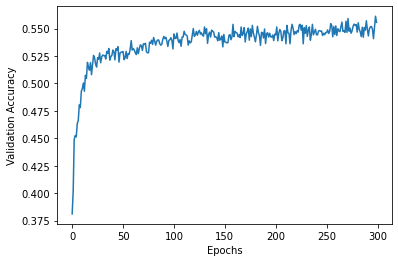

In [66]:
plt.plot(average_acc_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

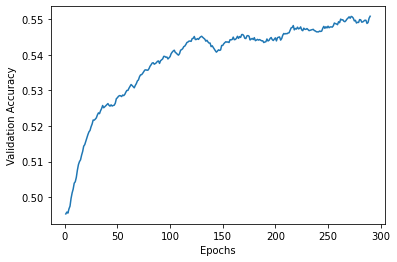

In [67]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_history = smooth_curve(average_acc_history[10:])
plt.plot(range(1, len(smooth_history) + 1), smooth_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

In [78]:
accs_higher_epochs = []
for train_index, test_index in KFold(n_splits=10, shuffle=True, random_state=None).split(ivs):
    x_train, x_test=ivs[train_index], ivs[test_index]
    y_train, y_test=categorical_quality[train_index], categorical_quality[test_index]
    model=build_model()
    start=datetime.datetime.now()
    history = model.fit(x_train, y_train, batch_size=100, epochs=700, verbose=2, validation_data=(x_test, y_test))
    acc_history = history.history['val_accuracy']
    accs_higher_epochs.append(acc_history)
average_acc_history = [np.mean([x[i] for x in accs_higher_epochs]) for i in range(800)]

Epoch 1/700
45/45 - 1s - loss: 2.0257 - accuracy: 0.4381 - val_loss: 1.7396 - val_accuracy: 0.4286
Epoch 2/700
45/45 - 0s - loss: 1.5201 - accuracy: 0.4510 - val_loss: 1.4251 - val_accuracy: 0.4286
Epoch 3/700
45/45 - 0s - loss: 1.3445 - accuracy: 0.4510 - val_loss: 1.3547 - val_accuracy: 0.4286
Epoch 4/700
45/45 - 0s - loss: 1.3029 - accuracy: 0.4510 - val_loss: 1.3370 - val_accuracy: 0.4286
Epoch 5/700
45/45 - 0s - loss: 1.2827 - accuracy: 0.4510 - val_loss: 1.3157 - val_accuracy: 0.4286
Epoch 6/700
45/45 - 0s - loss: 1.2659 - accuracy: 0.4510 - val_loss: 1.3101 - val_accuracy: 0.4286
Epoch 7/700
45/45 - 0s - loss: 1.2516 - accuracy: 0.4512 - val_loss: 1.2827 - val_accuracy: 0.4286
Epoch 8/700
45/45 - 0s - loss: 1.2344 - accuracy: 0.4512 - val_loss: 1.2584 - val_accuracy: 0.4286
Epoch 9/700
45/45 - 0s - loss: 1.2160 - accuracy: 0.4592 - val_loss: 1.2478 - val_accuracy: 0.4347
Epoch 10/700
45/45 - 0s - loss: 1.1983 - accuracy: 0.4814 - val_loss: 1.2249 - val_accuracy: 0.4714
Epoch 11/

Epoch 84/700
45/45 - 0s - loss: 1.0589 - accuracy: 0.5488 - val_loss: 1.1348 - val_accuracy: 0.5143
Epoch 85/700
45/45 - 0s - loss: 1.0582 - accuracy: 0.5549 - val_loss: 1.1315 - val_accuracy: 0.5122
Epoch 86/700
45/45 - 0s - loss: 1.0579 - accuracy: 0.5513 - val_loss: 1.1272 - val_accuracy: 0.5245
Epoch 87/700
45/45 - 0s - loss: 1.0575 - accuracy: 0.5501 - val_loss: 1.1269 - val_accuracy: 0.5184
Epoch 88/700
45/45 - 0s - loss: 1.0562 - accuracy: 0.5490 - val_loss: 1.1274 - val_accuracy: 0.5000
Epoch 89/700
45/45 - 0s - loss: 1.0565 - accuracy: 0.5483 - val_loss: 1.1366 - val_accuracy: 0.5224
Epoch 90/700
45/45 - 0s - loss: 1.0560 - accuracy: 0.5510 - val_loss: 1.1374 - val_accuracy: 0.5143
Epoch 91/700
45/45 - 0s - loss: 1.0562 - accuracy: 0.5447 - val_loss: 1.1287 - val_accuracy: 0.5020
Epoch 92/700
45/45 - 0s - loss: 1.0548 - accuracy: 0.5492 - val_loss: 1.1235 - val_accuracy: 0.5204
Epoch 93/700
45/45 - 0s - loss: 1.0526 - accuracy: 0.5549 - val_loss: 1.1199 - val_accuracy: 0.5041


Epoch 166/700
45/45 - 0s - loss: 1.0200 - accuracy: 0.5615 - val_loss: 1.0763 - val_accuracy: 0.5082
Epoch 167/700
45/45 - 0s - loss: 1.0187 - accuracy: 0.5649 - val_loss: 1.0866 - val_accuracy: 0.5041
Epoch 168/700
45/45 - 0s - loss: 1.0174 - accuracy: 0.5633 - val_loss: 1.0758 - val_accuracy: 0.5265
Epoch 169/700
45/45 - 0s - loss: 1.0178 - accuracy: 0.5690 - val_loss: 1.0868 - val_accuracy: 0.5000
Epoch 170/700
45/45 - 0s - loss: 1.0176 - accuracy: 0.5672 - val_loss: 1.0984 - val_accuracy: 0.5082
Epoch 171/700
45/45 - 0s - loss: 1.0182 - accuracy: 0.5656 - val_loss: 1.0886 - val_accuracy: 0.5102
Epoch 172/700
45/45 - 0s - loss: 1.0182 - accuracy: 0.5662 - val_loss: 1.0823 - val_accuracy: 0.5020
Epoch 173/700
45/45 - 0s - loss: 1.0176 - accuracy: 0.5678 - val_loss: 1.0831 - val_accuracy: 0.5224
Epoch 174/700
45/45 - 0s - loss: 1.0171 - accuracy: 0.5622 - val_loss: 1.0864 - val_accuracy: 0.5082
Epoch 175/700
45/45 - 0s - loss: 1.0166 - accuracy: 0.5631 - val_loss: 1.0890 - val_accurac

Epoch 248/700
45/45 - 0s - loss: 1.0041 - accuracy: 0.5733 - val_loss: 1.0821 - val_accuracy: 0.5041
Epoch 249/700
45/45 - 0s - loss: 1.0046 - accuracy: 0.5730 - val_loss: 1.0761 - val_accuracy: 0.5306
Epoch 250/700
45/45 - 0s - loss: 1.0042 - accuracy: 0.5744 - val_loss: 1.0808 - val_accuracy: 0.5061
Epoch 251/700
45/45 - 0s - loss: 1.0041 - accuracy: 0.5742 - val_loss: 1.0782 - val_accuracy: 0.5143
Epoch 252/700
45/45 - 0s - loss: 1.0047 - accuracy: 0.5746 - val_loss: 1.0780 - val_accuracy: 0.5204
Epoch 253/700
45/45 - 0s - loss: 1.0040 - accuracy: 0.5737 - val_loss: 1.0736 - val_accuracy: 0.5184
Epoch 254/700
45/45 - 0s - loss: 1.0036 - accuracy: 0.5726 - val_loss: 1.0692 - val_accuracy: 0.5245
Epoch 255/700
45/45 - 0s - loss: 1.0041 - accuracy: 0.5728 - val_loss: 1.0734 - val_accuracy: 0.5245
Epoch 256/700
45/45 - 0s - loss: 1.0031 - accuracy: 0.5728 - val_loss: 1.0828 - val_accuracy: 0.5061
Epoch 257/700
45/45 - 0s - loss: 1.0026 - accuracy: 0.5762 - val_loss: 1.0769 - val_accurac

Epoch 330/700
45/45 - 0s - loss: 0.9935 - accuracy: 0.5742 - val_loss: 1.0824 - val_accuracy: 0.5000
Epoch 331/700
45/45 - 0s - loss: 0.9939 - accuracy: 0.5783 - val_loss: 1.0863 - val_accuracy: 0.5143
Epoch 332/700
45/45 - 0s - loss: 0.9943 - accuracy: 0.5724 - val_loss: 1.0819 - val_accuracy: 0.5122
Epoch 333/700
45/45 - 0s - loss: 0.9942 - accuracy: 0.5760 - val_loss: 1.0817 - val_accuracy: 0.5184
Epoch 334/700
45/45 - 0s - loss: 0.9936 - accuracy: 0.5819 - val_loss: 1.0832 - val_accuracy: 0.5245
Epoch 335/700
45/45 - 0s - loss: 0.9949 - accuracy: 0.5776 - val_loss: 1.0783 - val_accuracy: 0.5102
Epoch 336/700
45/45 - 0s - loss: 0.9936 - accuracy: 0.5760 - val_loss: 1.0787 - val_accuracy: 0.5122
Epoch 337/700
45/45 - 0s - loss: 0.9939 - accuracy: 0.5774 - val_loss: 1.0824 - val_accuracy: 0.5184
Epoch 338/700
45/45 - 0s - loss: 0.9925 - accuracy: 0.5744 - val_loss: 1.0776 - val_accuracy: 0.5184
Epoch 339/700
45/45 - 0s - loss: 0.9933 - accuracy: 0.5744 - val_loss: 1.0759 - val_accurac

45/45 - 0s - loss: 0.9868 - accuracy: 0.5830 - val_loss: 1.0741 - val_accuracy: 0.5143
Epoch 412/700
45/45 - 0s - loss: 0.9854 - accuracy: 0.5814 - val_loss: 1.0772 - val_accuracy: 0.5020
Epoch 413/700
45/45 - 0s - loss: 0.9863 - accuracy: 0.5771 - val_loss: 1.0894 - val_accuracy: 0.4837
Epoch 414/700
45/45 - 0s - loss: 0.9884 - accuracy: 0.5730 - val_loss: 1.0707 - val_accuracy: 0.5265
Epoch 415/700
45/45 - 0s - loss: 0.9867 - accuracy: 0.5794 - val_loss: 1.0850 - val_accuracy: 0.4918
Epoch 416/700
45/45 - 0s - loss: 0.9865 - accuracy: 0.5792 - val_loss: 1.0878 - val_accuracy: 0.5082
Epoch 417/700
45/45 - 0s - loss: 0.9877 - accuracy: 0.5794 - val_loss: 1.0754 - val_accuracy: 0.5000
Epoch 418/700
45/45 - 0s - loss: 0.9860 - accuracy: 0.5776 - val_loss: 1.0785 - val_accuracy: 0.5061
Epoch 419/700
45/45 - 0s - loss: 0.9846 - accuracy: 0.5814 - val_loss: 1.0890 - val_accuracy: 0.5041
Epoch 420/700
45/45 - 0s - loss: 0.9868 - accuracy: 0.5796 - val_loss: 1.0895 - val_accuracy: 0.5061
Epoc

Epoch 493/700
45/45 - 0s - loss: 0.9810 - accuracy: 0.5858 - val_loss: 1.0785 - val_accuracy: 0.5122
Epoch 494/700
45/45 - 0s - loss: 0.9814 - accuracy: 0.5839 - val_loss: 1.0824 - val_accuracy: 0.5265
Epoch 495/700
45/45 - 0s - loss: 0.9813 - accuracy: 0.5867 - val_loss: 1.0797 - val_accuracy: 0.5224
Epoch 496/700
45/45 - 0s - loss: 0.9795 - accuracy: 0.5839 - val_loss: 1.0770 - val_accuracy: 0.5184
Epoch 497/700
45/45 - 0s - loss: 0.9805 - accuracy: 0.5867 - val_loss: 1.0829 - val_accuracy: 0.4898
Epoch 498/700
45/45 - 0s - loss: 0.9809 - accuracy: 0.5819 - val_loss: 1.0716 - val_accuracy: 0.5122
Epoch 499/700
45/45 - 0s - loss: 0.9802 - accuracy: 0.5846 - val_loss: 1.0798 - val_accuracy: 0.5102
Epoch 500/700
45/45 - 0s - loss: 0.9798 - accuracy: 0.5794 - val_loss: 1.0910 - val_accuracy: 0.5041
Epoch 501/700
45/45 - 0s - loss: 0.9802 - accuracy: 0.5821 - val_loss: 1.0794 - val_accuracy: 0.5163
Epoch 502/700
45/45 - 0s - loss: 0.9795 - accuracy: 0.5776 - val_loss: 1.0776 - val_accurac

45/45 - 0s - loss: 0.9718 - accuracy: 0.5905 - val_loss: 1.0822 - val_accuracy: 0.5041
Epoch 575/700
45/45 - 0s - loss: 0.9734 - accuracy: 0.5835 - val_loss: 1.0918 - val_accuracy: 0.5041
Epoch 576/700
45/45 - 0s - loss: 0.9718 - accuracy: 0.5892 - val_loss: 1.0704 - val_accuracy: 0.4980
Epoch 577/700
45/45 - 0s - loss: 0.9713 - accuracy: 0.5871 - val_loss: 1.0793 - val_accuracy: 0.5000
Epoch 578/700
45/45 - 0s - loss: 0.9723 - accuracy: 0.5873 - val_loss: 1.0726 - val_accuracy: 0.4939
Epoch 579/700
45/45 - 0s - loss: 0.9715 - accuracy: 0.5873 - val_loss: 1.0843 - val_accuracy: 0.4980
Epoch 580/700
45/45 - 0s - loss: 0.9725 - accuracy: 0.5828 - val_loss: 1.0672 - val_accuracy: 0.5306
Epoch 581/700
45/45 - 0s - loss: 0.9695 - accuracy: 0.5889 - val_loss: 1.0777 - val_accuracy: 0.5122
Epoch 582/700
45/45 - 0s - loss: 0.9702 - accuracy: 0.5892 - val_loss: 1.0911 - val_accuracy: 0.5143
Epoch 583/700
45/45 - 0s - loss: 0.9727 - accuracy: 0.5869 - val_loss: 1.0743 - val_accuracy: 0.5082
Epoc

Epoch 656/700
45/45 - 0s - loss: 0.9649 - accuracy: 0.5905 - val_loss: 1.0865 - val_accuracy: 0.4959
Epoch 657/700
45/45 - 0s - loss: 0.9635 - accuracy: 0.5882 - val_loss: 1.0943 - val_accuracy: 0.4918
Epoch 658/700
45/45 - 0s - loss: 0.9630 - accuracy: 0.5878 - val_loss: 1.0935 - val_accuracy: 0.5082
Epoch 659/700
45/45 - 0s - loss: 0.9620 - accuracy: 0.5894 - val_loss: 1.0871 - val_accuracy: 0.5020
Epoch 660/700
45/45 - 0s - loss: 0.9620 - accuracy: 0.5901 - val_loss: 1.0914 - val_accuracy: 0.4980
Epoch 661/700
45/45 - 0s - loss: 0.9626 - accuracy: 0.5880 - val_loss: 1.0849 - val_accuracy: 0.5082
Epoch 662/700
45/45 - 0s - loss: 0.9624 - accuracy: 0.5858 - val_loss: 1.0969 - val_accuracy: 0.5204
Epoch 663/700
45/45 - 0s - loss: 0.9624 - accuracy: 0.5862 - val_loss: 1.0974 - val_accuracy: 0.5102
Epoch 664/700
45/45 - 0s - loss: 0.9625 - accuracy: 0.5885 - val_loss: 1.0999 - val_accuracy: 0.4918
Epoch 665/700
45/45 - 0s - loss: 0.9632 - accuracy: 0.5878 - val_loss: 1.0881 - val_accurac

Epoch 38/700
45/45 - 0s - loss: 1.0854 - accuracy: 0.5483 - val_loss: 1.1116 - val_accuracy: 0.5408
Epoch 39/700
45/45 - 0s - loss: 1.0813 - accuracy: 0.5381 - val_loss: 1.1106 - val_accuracy: 0.5531
Epoch 40/700
45/45 - 0s - loss: 1.0818 - accuracy: 0.5447 - val_loss: 1.1092 - val_accuracy: 0.5429
Epoch 41/700
45/45 - 0s - loss: 1.0830 - accuracy: 0.5420 - val_loss: 1.1148 - val_accuracy: 0.5408
Epoch 42/700
45/45 - 0s - loss: 1.0797 - accuracy: 0.5422 - val_loss: 1.1134 - val_accuracy: 0.5286
Epoch 43/700
45/45 - 0s - loss: 1.0800 - accuracy: 0.5415 - val_loss: 1.1171 - val_accuracy: 0.5347
Epoch 44/700
45/45 - 0s - loss: 1.0800 - accuracy: 0.5456 - val_loss: 1.1135 - val_accuracy: 0.5490
Epoch 45/700
45/45 - 0s - loss: 1.0785 - accuracy: 0.5402 - val_loss: 1.1055 - val_accuracy: 0.5531
Epoch 46/700
45/45 - 0s - loss: 1.0768 - accuracy: 0.5458 - val_loss: 1.1098 - val_accuracy: 0.5347
Epoch 47/700
45/45 - 0s - loss: 1.0761 - accuracy: 0.5470 - val_loss: 1.1190 - val_accuracy: 0.5347


Epoch 120/700
45/45 - 0s - loss: 1.0443 - accuracy: 0.5569 - val_loss: 1.0863 - val_accuracy: 0.5592
Epoch 121/700
45/45 - 0s - loss: 1.0443 - accuracy: 0.5597 - val_loss: 1.0841 - val_accuracy: 0.5571
Epoch 122/700
45/45 - 0s - loss: 1.0448 - accuracy: 0.5588 - val_loss: 1.0985 - val_accuracy: 0.5429
Epoch 123/700
45/45 - 0s - loss: 1.0447 - accuracy: 0.5506 - val_loss: 1.1020 - val_accuracy: 0.5490
Epoch 124/700
45/45 - 0s - loss: 1.0447 - accuracy: 0.5594 - val_loss: 1.0827 - val_accuracy: 0.5673
Epoch 125/700
45/45 - 0s - loss: 1.0443 - accuracy: 0.5531 - val_loss: 1.0893 - val_accuracy: 0.5531
Epoch 126/700
45/45 - 0s - loss: 1.0423 - accuracy: 0.5565 - val_loss: 1.0858 - val_accuracy: 0.5429
Epoch 127/700
45/45 - 0s - loss: 1.0443 - accuracy: 0.5576 - val_loss: 1.1062 - val_accuracy: 0.5490
Epoch 128/700
45/45 - 0s - loss: 1.0436 - accuracy: 0.5601 - val_loss: 1.0832 - val_accuracy: 0.5633
Epoch 129/700
45/45 - 0s - loss: 1.0428 - accuracy: 0.5572 - val_loss: 1.1170 - val_accurac

45/45 - 0s - loss: 1.0250 - accuracy: 0.5626 - val_loss: 1.0774 - val_accuracy: 0.5429
Epoch 202/700
45/45 - 0s - loss: 1.0251 - accuracy: 0.5597 - val_loss: 1.0979 - val_accuracy: 0.5388
Epoch 203/700
45/45 - 0s - loss: 1.0238 - accuracy: 0.5594 - val_loss: 1.1228 - val_accuracy: 0.5388
Epoch 204/700
45/45 - 0s - loss: 1.0234 - accuracy: 0.5544 - val_loss: 1.0740 - val_accuracy: 0.5551
Epoch 205/700
45/45 - 0s - loss: 1.0235 - accuracy: 0.5588 - val_loss: 1.1051 - val_accuracy: 0.5327
Epoch 206/700
45/45 - 0s - loss: 1.0228 - accuracy: 0.5635 - val_loss: 1.0795 - val_accuracy: 0.5510
Epoch 207/700
45/45 - 0s - loss: 1.0253 - accuracy: 0.5576 - val_loss: 1.1142 - val_accuracy: 0.5327
Epoch 208/700
45/45 - 0s - loss: 1.0237 - accuracy: 0.5628 - val_loss: 1.0853 - val_accuracy: 0.5551
Epoch 209/700
45/45 - 0s - loss: 1.0226 - accuracy: 0.5554 - val_loss: 1.0734 - val_accuracy: 0.5551
Epoch 210/700
45/45 - 0s - loss: 1.0246 - accuracy: 0.5551 - val_loss: 1.0784 - val_accuracy: 0.5551
Epoc

Epoch 283/700
45/45 - 0s - loss: 1.0112 - accuracy: 0.5613 - val_loss: 1.0755 - val_accuracy: 0.5347
Epoch 284/700
45/45 - 0s - loss: 1.0090 - accuracy: 0.5603 - val_loss: 1.0644 - val_accuracy: 0.5571
Epoch 285/700
45/45 - 0s - loss: 1.0098 - accuracy: 0.5667 - val_loss: 1.0775 - val_accuracy: 0.5408
Epoch 286/700
45/45 - 0s - loss: 1.0093 - accuracy: 0.5610 - val_loss: 1.0734 - val_accuracy: 0.5490
Epoch 287/700
45/45 - 0s - loss: 1.0076 - accuracy: 0.5672 - val_loss: 1.0773 - val_accuracy: 0.5469
Epoch 288/700
45/45 - 0s - loss: 1.0067 - accuracy: 0.5658 - val_loss: 1.0644 - val_accuracy: 0.5490
Epoch 289/700
45/45 - 0s - loss: 1.0074 - accuracy: 0.5699 - val_loss: 1.0775 - val_accuracy: 0.5408
Epoch 290/700
45/45 - 0s - loss: 1.0078 - accuracy: 0.5672 - val_loss: 1.1027 - val_accuracy: 0.5286
Epoch 291/700
45/45 - 0s - loss: 1.0083 - accuracy: 0.5635 - val_loss: 1.0750 - val_accuracy: 0.5490
Epoch 292/700
45/45 - 0s - loss: 1.0082 - accuracy: 0.5656 - val_loss: 1.0679 - val_accurac

Epoch 365/700
45/45 - 0s - loss: 0.9933 - accuracy: 0.5726 - val_loss: 1.1332 - val_accuracy: 0.5327
Epoch 366/700
45/45 - 0s - loss: 0.9956 - accuracy: 0.5699 - val_loss: 1.0638 - val_accuracy: 0.5571
Epoch 367/700
45/45 - 0s - loss: 0.9960 - accuracy: 0.5672 - val_loss: 1.0999 - val_accuracy: 0.5163
Epoch 368/700
45/45 - 0s - loss: 0.9971 - accuracy: 0.5681 - val_loss: 1.0797 - val_accuracy: 0.5469
Epoch 369/700
45/45 - 0s - loss: 0.9954 - accuracy: 0.5669 - val_loss: 1.0612 - val_accuracy: 0.5694
Epoch 370/700
45/45 - 0s - loss: 0.9954 - accuracy: 0.5667 - val_loss: 1.0709 - val_accuracy: 0.5531
Epoch 371/700
45/45 - 0s - loss: 0.9966 - accuracy: 0.5683 - val_loss: 1.0825 - val_accuracy: 0.5531
Epoch 372/700
45/45 - 0s - loss: 0.9965 - accuracy: 0.5721 - val_loss: 1.1167 - val_accuracy: 0.5286
Epoch 373/700
45/45 - 0s - loss: 0.9968 - accuracy: 0.5726 - val_loss: 1.0602 - val_accuracy: 0.5592
Epoch 374/700
45/45 - 0s - loss: 0.9955 - accuracy: 0.5746 - val_loss: 1.0700 - val_accurac

Epoch 447/700
45/45 - 0s - loss: 0.9864 - accuracy: 0.5656 - val_loss: 1.0985 - val_accuracy: 0.5327
Epoch 448/700
45/45 - 0s - loss: 0.9866 - accuracy: 0.5712 - val_loss: 1.0747 - val_accuracy: 0.5633
Epoch 449/700
45/45 - 0s - loss: 0.9875 - accuracy: 0.5683 - val_loss: 1.0747 - val_accuracy: 0.5429
Epoch 450/700
45/45 - 0s - loss: 0.9851 - accuracy: 0.5730 - val_loss: 1.0617 - val_accuracy: 0.5449
Epoch 451/700
45/45 - 0s - loss: 0.9863 - accuracy: 0.5692 - val_loss: 1.0775 - val_accuracy: 0.5469
Epoch 452/700
45/45 - 0s - loss: 0.9835 - accuracy: 0.5730 - val_loss: 1.0901 - val_accuracy: 0.5367
Epoch 453/700
45/45 - 0s - loss: 0.9846 - accuracy: 0.5692 - val_loss: 1.0690 - val_accuracy: 0.5510
Epoch 454/700
45/45 - 0s - loss: 0.9841 - accuracy: 0.5678 - val_loss: 1.0515 - val_accuracy: 0.5592
Epoch 455/700
45/45 - 0s - loss: 0.9843 - accuracy: 0.5724 - val_loss: 1.0591 - val_accuracy: 0.5510
Epoch 456/700
45/45 - 0s - loss: 0.9838 - accuracy: 0.5726 - val_loss: 1.0653 - val_accurac

45/45 - 0s - loss: 0.9762 - accuracy: 0.5719 - val_loss: 1.0602 - val_accuracy: 0.5571
Epoch 529/700
45/45 - 0s - loss: 0.9763 - accuracy: 0.5776 - val_loss: 1.1023 - val_accuracy: 0.5429
Epoch 530/700
45/45 - 0s - loss: 0.9764 - accuracy: 0.5762 - val_loss: 1.0627 - val_accuracy: 0.5551
Epoch 531/700
45/45 - 0s - loss: 0.9768 - accuracy: 0.5737 - val_loss: 1.0868 - val_accuracy: 0.5429
Epoch 532/700
45/45 - 0s - loss: 0.9766 - accuracy: 0.5785 - val_loss: 1.0674 - val_accuracy: 0.5490
Epoch 533/700
45/45 - 0s - loss: 0.9763 - accuracy: 0.5789 - val_loss: 1.0610 - val_accuracy: 0.5449
Epoch 534/700
45/45 - 0s - loss: 0.9754 - accuracy: 0.5789 - val_loss: 1.0613 - val_accuracy: 0.5510
Epoch 535/700
45/45 - 0s - loss: 0.9759 - accuracy: 0.5771 - val_loss: 1.0649 - val_accuracy: 0.5490
Epoch 536/700
45/45 - 0s - loss: 0.9762 - accuracy: 0.5733 - val_loss: 1.0820 - val_accuracy: 0.5429
Epoch 537/700
45/45 - 0s - loss: 0.9738 - accuracy: 0.5762 - val_loss: 1.0691 - val_accuracy: 0.5388
Epoc

Epoch 610/700
45/45 - 0s - loss: 0.9683 - accuracy: 0.5837 - val_loss: 1.0868 - val_accuracy: 0.5469
Epoch 611/700
45/45 - 0s - loss: 0.9669 - accuracy: 0.5810 - val_loss: 1.0668 - val_accuracy: 0.5469
Epoch 612/700
45/45 - 0s - loss: 0.9677 - accuracy: 0.5842 - val_loss: 1.0647 - val_accuracy: 0.5531
Epoch 613/700
45/45 - 0s - loss: 0.9670 - accuracy: 0.5783 - val_loss: 1.0687 - val_accuracy: 0.5469
Epoch 614/700
45/45 - 0s - loss: 0.9681 - accuracy: 0.5801 - val_loss: 1.1088 - val_accuracy: 0.5367
Epoch 615/700
45/45 - 0s - loss: 0.9684 - accuracy: 0.5799 - val_loss: 1.0536 - val_accuracy: 0.5510
Epoch 616/700
45/45 - 0s - loss: 0.9671 - accuracy: 0.5771 - val_loss: 1.0683 - val_accuracy: 0.5449
Epoch 617/700
45/45 - 0s - loss: 0.9656 - accuracy: 0.5819 - val_loss: 1.0643 - val_accuracy: 0.5347
Epoch 618/700
45/45 - 0s - loss: 0.9655 - accuracy: 0.5785 - val_loss: 1.0819 - val_accuracy: 0.5429
Epoch 619/700
45/45 - 0s - loss: 0.9671 - accuracy: 0.5839 - val_loss: 1.0619 - val_accurac

45/45 - 0s - loss: 0.9610 - accuracy: 0.5833 - val_loss: 1.0605 - val_accuracy: 0.5551
Epoch 692/700
45/45 - 0s - loss: 0.9620 - accuracy: 0.5855 - val_loss: 1.0821 - val_accuracy: 0.5490
Epoch 693/700
45/45 - 0s - loss: 0.9607 - accuracy: 0.5780 - val_loss: 1.0598 - val_accuracy: 0.5490
Epoch 694/700
45/45 - 0s - loss: 0.9617 - accuracy: 0.5821 - val_loss: 1.0655 - val_accuracy: 0.5551
Epoch 695/700
45/45 - 0s - loss: 0.9603 - accuracy: 0.5819 - val_loss: 1.0500 - val_accuracy: 0.5571
Epoch 696/700
45/45 - 0s - loss: 0.9608 - accuracy: 0.5799 - val_loss: 1.0620 - val_accuracy: 0.5551
Epoch 697/700
45/45 - 0s - loss: 0.9603 - accuracy: 0.5819 - val_loss: 1.0528 - val_accuracy: 0.5469
Epoch 698/700
45/45 - 0s - loss: 0.9596 - accuracy: 0.5848 - val_loss: 1.0751 - val_accuracy: 0.5592
Epoch 699/700
45/45 - 0s - loss: 0.9610 - accuracy: 0.5810 - val_loss: 1.0575 - val_accuracy: 0.5551
Epoch 700/700
45/45 - 0s - loss: 0.9600 - accuracy: 0.5842 - val_loss: 1.0686 - val_accuracy: 0.5367
Epoc

Epoch 74/700
45/45 - 0s - loss: 1.0897 - accuracy: 0.5438 - val_loss: 1.0844 - val_accuracy: 0.5184
Epoch 75/700
45/45 - 0s - loss: 1.0883 - accuracy: 0.5431 - val_loss: 1.0863 - val_accuracy: 0.5245
Epoch 76/700
45/45 - 0s - loss: 1.0886 - accuracy: 0.5429 - val_loss: 1.0837 - val_accuracy: 0.5224
Epoch 77/700
45/45 - 0s - loss: 1.0872 - accuracy: 0.5454 - val_loss: 1.1070 - val_accuracy: 0.4980
Epoch 78/700
45/45 - 0s - loss: 1.0872 - accuracy: 0.5461 - val_loss: 1.0906 - val_accuracy: 0.5224
Epoch 79/700
45/45 - 0s - loss: 1.0860 - accuracy: 0.5424 - val_loss: 1.0979 - val_accuracy: 0.5122
Epoch 80/700
45/45 - 0s - loss: 1.0859 - accuracy: 0.5429 - val_loss: 1.0909 - val_accuracy: 0.5163
Epoch 81/700
45/45 - 0s - loss: 1.0854 - accuracy: 0.5454 - val_loss: 1.0816 - val_accuracy: 0.5204
Epoch 82/700
45/45 - 0s - loss: 1.0840 - accuracy: 0.5447 - val_loss: 1.0824 - val_accuracy: 0.5327
Epoch 83/700
45/45 - 0s - loss: 1.0839 - accuracy: 0.5470 - val_loss: 1.0880 - val_accuracy: 0.5163


Epoch 156/700
45/45 - 0s - loss: 1.0432 - accuracy: 0.5594 - val_loss: 1.0645 - val_accuracy: 0.5327
Epoch 157/700
45/45 - 0s - loss: 1.0427 - accuracy: 0.5601 - val_loss: 1.0700 - val_accuracy: 0.5490
Epoch 158/700
45/45 - 0s - loss: 1.0407 - accuracy: 0.5601 - val_loss: 1.1031 - val_accuracy: 0.5143
Epoch 159/700
45/45 - 0s - loss: 1.0424 - accuracy: 0.5581 - val_loss: 1.0639 - val_accuracy: 0.5265
Epoch 160/700
45/45 - 0s - loss: 1.0395 - accuracy: 0.5617 - val_loss: 1.0858 - val_accuracy: 0.5082
Epoch 161/700
45/45 - 0s - loss: 1.0406 - accuracy: 0.5578 - val_loss: 1.0808 - val_accuracy: 0.5224
Epoch 162/700
45/45 - 0s - loss: 1.0420 - accuracy: 0.5594 - val_loss: 1.0753 - val_accuracy: 0.5306
Epoch 163/700
45/45 - 0s - loss: 1.0397 - accuracy: 0.5551 - val_loss: 1.0748 - val_accuracy: 0.5469
Epoch 164/700
45/45 - 0s - loss: 1.0394 - accuracy: 0.5583 - val_loss: 1.0639 - val_accuracy: 0.5367
Epoch 165/700
45/45 - 0s - loss: 1.0386 - accuracy: 0.5599 - val_loss: 1.0649 - val_accurac

45/45 - 0s - loss: 1.0215 - accuracy: 0.5699 - val_loss: 1.0509 - val_accuracy: 0.5306
Epoch 238/700
45/45 - 0s - loss: 1.0197 - accuracy: 0.5678 - val_loss: 1.0391 - val_accuracy: 0.5490
Epoch 239/700
45/45 - 0s - loss: 1.0203 - accuracy: 0.5724 - val_loss: 1.0472 - val_accuracy: 0.5490
Epoch 240/700
45/45 - 0s - loss: 1.0173 - accuracy: 0.5678 - val_loss: 1.0670 - val_accuracy: 0.5286
Epoch 241/700
45/45 - 0s - loss: 1.0199 - accuracy: 0.5676 - val_loss: 1.0538 - val_accuracy: 0.5367
Epoch 242/700
45/45 - 0s - loss: 1.0191 - accuracy: 0.5721 - val_loss: 1.0520 - val_accuracy: 0.5469
Epoch 243/700
45/45 - 0s - loss: 1.0184 - accuracy: 0.5667 - val_loss: 1.0651 - val_accuracy: 0.5490
Epoch 244/700
45/45 - 0s - loss: 1.0198 - accuracy: 0.5662 - val_loss: 1.0742 - val_accuracy: 0.5184
Epoch 245/700
45/45 - 0s - loss: 1.0203 - accuracy: 0.5660 - val_loss: 1.0520 - val_accuracy: 0.5469
Epoch 246/700
45/45 - 0s - loss: 1.0193 - accuracy: 0.5660 - val_loss: 1.0513 - val_accuracy: 0.5429
Epoc

Epoch 319/700
45/45 - 0s - loss: 1.0079 - accuracy: 0.5635 - val_loss: 1.0410 - val_accuracy: 0.5306
Epoch 320/700
45/45 - 0s - loss: 1.0075 - accuracy: 0.5685 - val_loss: 1.0350 - val_accuracy: 0.5510
Epoch 321/700
45/45 - 0s - loss: 1.0079 - accuracy: 0.5676 - val_loss: 1.0466 - val_accuracy: 0.5347
Epoch 322/700
45/45 - 0s - loss: 1.0054 - accuracy: 0.5701 - val_loss: 1.0374 - val_accuracy: 0.5551
Epoch 323/700
45/45 - 0s - loss: 1.0073 - accuracy: 0.5753 - val_loss: 1.0400 - val_accuracy: 0.5367
Epoch 324/700
45/45 - 0s - loss: 1.0062 - accuracy: 0.5728 - val_loss: 1.0579 - val_accuracy: 0.5408
Epoch 325/700
45/45 - 0s - loss: 1.0074 - accuracy: 0.5726 - val_loss: 1.0497 - val_accuracy: 0.5531
Epoch 326/700
45/45 - 0s - loss: 1.0061 - accuracy: 0.5694 - val_loss: 1.0504 - val_accuracy: 0.5286
Epoch 327/700
45/45 - 0s - loss: 1.0058 - accuracy: 0.5712 - val_loss: 1.0417 - val_accuracy: 0.5408
Epoch 328/700
45/45 - 0s - loss: 1.0060 - accuracy: 0.5715 - val_loss: 1.0498 - val_accurac

Epoch 401/700
45/45 - 0s - loss: 0.9926 - accuracy: 0.5780 - val_loss: 1.0474 - val_accuracy: 0.5449
Epoch 402/700
45/45 - 0s - loss: 0.9938 - accuracy: 0.5771 - val_loss: 1.0441 - val_accuracy: 0.5469
Epoch 403/700
45/45 - 0s - loss: 0.9940 - accuracy: 0.5769 - val_loss: 1.0450 - val_accuracy: 0.5694
Epoch 404/700
45/45 - 0s - loss: 0.9942 - accuracy: 0.5762 - val_loss: 1.0367 - val_accuracy: 0.5286
Epoch 405/700
45/45 - 0s - loss: 0.9943 - accuracy: 0.5724 - val_loss: 1.0405 - val_accuracy: 0.5367
Epoch 406/700
45/45 - 0s - loss: 0.9921 - accuracy: 0.5749 - val_loss: 1.0433 - val_accuracy: 0.5367
Epoch 407/700
45/45 - 0s - loss: 0.9938 - accuracy: 0.5746 - val_loss: 1.0546 - val_accuracy: 0.5327
Epoch 408/700
45/45 - 0s - loss: 0.9929 - accuracy: 0.5753 - val_loss: 1.0474 - val_accuracy: 0.5306
Epoch 409/700
45/45 - 0s - loss: 0.9941 - accuracy: 0.5769 - val_loss: 1.0343 - val_accuracy: 0.5367
Epoch 410/700
45/45 - 0s - loss: 0.9932 - accuracy: 0.5755 - val_loss: 1.0460 - val_accurac

Epoch 483/700
45/45 - 0s - loss: 0.9792 - accuracy: 0.5835 - val_loss: 1.0538 - val_accuracy: 0.5571
Epoch 484/700
45/45 - 0s - loss: 0.9778 - accuracy: 0.5860 - val_loss: 1.0622 - val_accuracy: 0.5429
Epoch 485/700
45/45 - 0s - loss: 0.9783 - accuracy: 0.5821 - val_loss: 1.0600 - val_accuracy: 0.5551
Epoch 486/700
45/45 - 0s - loss: 0.9778 - accuracy: 0.5814 - val_loss: 1.0406 - val_accuracy: 0.5653
Epoch 487/700
45/45 - 0s - loss: 0.9775 - accuracy: 0.5796 - val_loss: 1.0521 - val_accuracy: 0.5633
Epoch 488/700
45/45 - 0s - loss: 0.9760 - accuracy: 0.5787 - val_loss: 1.0454 - val_accuracy: 0.5612
Epoch 489/700
45/45 - 0s - loss: 0.9757 - accuracy: 0.5844 - val_loss: 1.0434 - val_accuracy: 0.5592
Epoch 490/700
45/45 - 0s - loss: 0.9778 - accuracy: 0.5830 - val_loss: 1.0385 - val_accuracy: 0.5612
Epoch 491/700
45/45 - 0s - loss: 0.9767 - accuracy: 0.5819 - val_loss: 1.0406 - val_accuracy: 0.5673
Epoch 492/700
45/45 - 0s - loss: 0.9764 - accuracy: 0.5808 - val_loss: 1.0505 - val_accurac

Epoch 565/700
45/45 - 0s - loss: 0.9652 - accuracy: 0.5799 - val_loss: 1.0486 - val_accuracy: 0.5469
Epoch 566/700
45/45 - 0s - loss: 0.9675 - accuracy: 0.5814 - val_loss: 1.0849 - val_accuracy: 0.5061
Epoch 567/700
45/45 - 0s - loss: 0.9670 - accuracy: 0.5867 - val_loss: 1.0436 - val_accuracy: 0.5571
Epoch 568/700
45/45 - 0s - loss: 0.9647 - accuracy: 0.5844 - val_loss: 1.0517 - val_accuracy: 0.5265
Epoch 569/700
45/45 - 0s - loss: 0.9659 - accuracy: 0.5882 - val_loss: 1.0522 - val_accuracy: 0.5490
Epoch 570/700
45/45 - 0s - loss: 0.9643 - accuracy: 0.5880 - val_loss: 1.0530 - val_accuracy: 0.5347
Epoch 571/700
45/45 - 0s - loss: 0.9649 - accuracy: 0.5860 - val_loss: 1.0353 - val_accuracy: 0.5714
Epoch 572/700
45/45 - 0s - loss: 0.9638 - accuracy: 0.5851 - val_loss: 1.0457 - val_accuracy: 0.5673
Epoch 573/700
45/45 - 0s - loss: 0.9654 - accuracy: 0.5873 - val_loss: 1.0402 - val_accuracy: 0.5755
Epoch 574/700
45/45 - 0s - loss: 0.9647 - accuracy: 0.5828 - val_loss: 1.0310 - val_accurac

45/45 - 0s - loss: 0.9576 - accuracy: 0.5878 - val_loss: 1.0370 - val_accuracy: 0.5592
Epoch 647/700
45/45 - 0s - loss: 0.9571 - accuracy: 0.5907 - val_loss: 1.0522 - val_accuracy: 0.5592
Epoch 648/700
45/45 - 0s - loss: 0.9582 - accuracy: 0.5910 - val_loss: 1.0375 - val_accuracy: 0.5633
Epoch 649/700
45/45 - 0s - loss: 0.9566 - accuracy: 0.5876 - val_loss: 1.0527 - val_accuracy: 0.5612
Epoch 650/700
45/45 - 0s - loss: 0.9569 - accuracy: 0.5894 - val_loss: 1.0678 - val_accuracy: 0.5571
Epoch 651/700
45/45 - 0s - loss: 0.9597 - accuracy: 0.5889 - val_loss: 1.0541 - val_accuracy: 0.5531
Epoch 652/700
45/45 - 0s - loss: 0.9564 - accuracy: 0.5853 - val_loss: 1.0431 - val_accuracy: 0.5612
Epoch 653/700
45/45 - 0s - loss: 0.9564 - accuracy: 0.5923 - val_loss: 1.0451 - val_accuracy: 0.5612
Epoch 654/700
45/45 - 0s - loss: 0.9566 - accuracy: 0.5880 - val_loss: 1.0561 - val_accuracy: 0.5673
Epoch 655/700
45/45 - 0s - loss: 0.9560 - accuracy: 0.5912 - val_loss: 1.0598 - val_accuracy: 0.5653
Epoc

Epoch 28/700
45/45 - 0s - loss: 1.0903 - accuracy: 0.5392 - val_loss: 1.1471 - val_accuracy: 0.5224
Epoch 29/700
45/45 - 0s - loss: 1.0890 - accuracy: 0.5379 - val_loss: 1.1433 - val_accuracy: 0.5306
Epoch 30/700
45/45 - 0s - loss: 1.0878 - accuracy: 0.5399 - val_loss: 1.1522 - val_accuracy: 0.4878
Epoch 31/700
45/45 - 0s - loss: 1.0863 - accuracy: 0.5426 - val_loss: 1.1391 - val_accuracy: 0.5388
Epoch 32/700
45/45 - 0s - loss: 1.0846 - accuracy: 0.5413 - val_loss: 1.1351 - val_accuracy: 0.5347
Epoch 33/700
45/45 - 0s - loss: 1.0844 - accuracy: 0.5429 - val_loss: 1.1512 - val_accuracy: 0.5224
Epoch 34/700
45/45 - 0s - loss: 1.0845 - accuracy: 0.5402 - val_loss: 1.1370 - val_accuracy: 0.5082
Epoch 35/700
45/45 - 0s - loss: 1.0818 - accuracy: 0.5383 - val_loss: 1.1478 - val_accuracy: 0.5143
Epoch 36/700
45/45 - 0s - loss: 1.0801 - accuracy: 0.5440 - val_loss: 1.1401 - val_accuracy: 0.5367
Epoch 37/700
45/45 - 0s - loss: 1.0796 - accuracy: 0.5402 - val_loss: 1.1392 - val_accuracy: 0.5347


Epoch 110/700
45/45 - 0s - loss: 1.0336 - accuracy: 0.5576 - val_loss: 1.1076 - val_accuracy: 0.5408
Epoch 111/700
45/45 - 0s - loss: 1.0348 - accuracy: 0.5533 - val_loss: 1.0892 - val_accuracy: 0.5449
Epoch 112/700
45/45 - 0s - loss: 1.0325 - accuracy: 0.5583 - val_loss: 1.0846 - val_accuracy: 0.5673
Epoch 113/700
45/45 - 0s - loss: 1.0342 - accuracy: 0.5578 - val_loss: 1.0817 - val_accuracy: 0.5429
Epoch 114/700
45/45 - 0s - loss: 1.0316 - accuracy: 0.5567 - val_loss: 1.0785 - val_accuracy: 0.5653
Epoch 115/700
45/45 - 0s - loss: 1.0312 - accuracy: 0.5578 - val_loss: 1.0737 - val_accuracy: 0.5510
Epoch 116/700
45/45 - 0s - loss: 1.0304 - accuracy: 0.5599 - val_loss: 1.0689 - val_accuracy: 0.5592
Epoch 117/700
45/45 - 0s - loss: 1.0319 - accuracy: 0.5554 - val_loss: 1.0819 - val_accuracy: 0.5673
Epoch 118/700
45/45 - 0s - loss: 1.0310 - accuracy: 0.5590 - val_loss: 1.0710 - val_accuracy: 0.5612
Epoch 119/700
45/45 - 0s - loss: 1.0307 - accuracy: 0.5585 - val_loss: 1.0923 - val_accurac

45/45 - 0s - loss: 1.0101 - accuracy: 0.5669 - val_loss: 1.0771 - val_accuracy: 0.5449
Epoch 192/700
45/45 - 0s - loss: 1.0094 - accuracy: 0.5665 - val_loss: 1.0531 - val_accuracy: 0.5633
Epoch 193/700
45/45 - 0s - loss: 1.0099 - accuracy: 0.5665 - val_loss: 1.0781 - val_accuracy: 0.5469
Epoch 194/700
45/45 - 0s - loss: 1.0101 - accuracy: 0.5660 - val_loss: 1.0633 - val_accuracy: 0.5490
Epoch 195/700
45/45 - 0s - loss: 1.0100 - accuracy: 0.5637 - val_loss: 1.0572 - val_accuracy: 0.5633
Epoch 196/700
45/45 - 0s - loss: 1.0098 - accuracy: 0.5690 - val_loss: 1.0750 - val_accuracy: 0.5469
Epoch 197/700
45/45 - 0s - loss: 1.0094 - accuracy: 0.5635 - val_loss: 1.0787 - val_accuracy: 0.5388
Epoch 198/700
45/45 - 0s - loss: 1.0097 - accuracy: 0.5674 - val_loss: 1.0541 - val_accuracy: 0.5510
Epoch 199/700
45/45 - 0s - loss: 1.0072 - accuracy: 0.5672 - val_loss: 1.0883 - val_accuracy: 0.5469
Epoch 200/700
45/45 - 0s - loss: 1.0085 - accuracy: 0.5690 - val_loss: 1.0572 - val_accuracy: 0.5510
Epoc

Epoch 273/700
45/45 - 0s - loss: 0.9937 - accuracy: 0.5712 - val_loss: 1.0746 - val_accuracy: 0.5592
Epoch 274/700
45/45 - 0s - loss: 0.9940 - accuracy: 0.5744 - val_loss: 1.0740 - val_accuracy: 0.5449
Epoch 275/700
45/45 - 0s - loss: 0.9943 - accuracy: 0.5751 - val_loss: 1.0498 - val_accuracy: 0.5653
Epoch 276/700
45/45 - 0s - loss: 0.9920 - accuracy: 0.5744 - val_loss: 1.0786 - val_accuracy: 0.5408
Epoch 277/700
45/45 - 0s - loss: 0.9910 - accuracy: 0.5742 - val_loss: 1.0705 - val_accuracy: 0.5347
Epoch 278/700
45/45 - 0s - loss: 0.9930 - accuracy: 0.5785 - val_loss: 1.0579 - val_accuracy: 0.5633
Epoch 279/700
45/45 - 0s - loss: 0.9937 - accuracy: 0.5715 - val_loss: 1.0557 - val_accuracy: 0.5755
Epoch 280/700
45/45 - 0s - loss: 0.9924 - accuracy: 0.5783 - val_loss: 1.0495 - val_accuracy: 0.5673
Epoch 281/700
45/45 - 0s - loss: 0.9926 - accuracy: 0.5746 - val_loss: 1.0629 - val_accuracy: 0.5490
Epoch 282/700
45/45 - 0s - loss: 0.9931 - accuracy: 0.5755 - val_loss: 1.0561 - val_accurac

45/45 - 0s - loss: 0.9791 - accuracy: 0.5830 - val_loss: 1.0470 - val_accuracy: 0.5612
Epoch 355/700
45/45 - 0s - loss: 0.9810 - accuracy: 0.5769 - val_loss: 1.0583 - val_accuracy: 0.5551
Epoch 356/700
45/45 - 0s - loss: 0.9799 - accuracy: 0.5801 - val_loss: 1.0654 - val_accuracy: 0.5429
Epoch 357/700
45/45 - 0s - loss: 0.9791 - accuracy: 0.5787 - val_loss: 1.0557 - val_accuracy: 0.5612
Epoch 358/700
45/45 - 0s - loss: 0.9785 - accuracy: 0.5810 - val_loss: 1.0670 - val_accuracy: 0.5714
Epoch 359/700
45/45 - 0s - loss: 0.9792 - accuracy: 0.5812 - val_loss: 1.0621 - val_accuracy: 0.5796
Epoch 360/700
45/45 - 0s - loss: 0.9819 - accuracy: 0.5760 - val_loss: 1.0842 - val_accuracy: 0.5286
Epoch 361/700
45/45 - 0s - loss: 0.9782 - accuracy: 0.5789 - val_loss: 1.0481 - val_accuracy: 0.5653
Epoch 362/700
45/45 - 0s - loss: 0.9792 - accuracy: 0.5821 - val_loss: 1.0561 - val_accuracy: 0.5837
Epoch 363/700
45/45 - 0s - loss: 0.9780 - accuracy: 0.5794 - val_loss: 1.0505 - val_accuracy: 0.5592
Epoc

Epoch 436/700
45/45 - 0s - loss: 0.9661 - accuracy: 0.5839 - val_loss: 1.0654 - val_accuracy: 0.5469
Epoch 437/700
45/45 - 0s - loss: 0.9660 - accuracy: 0.5869 - val_loss: 1.0727 - val_accuracy: 0.5388
Epoch 438/700
45/45 - 0s - loss: 0.9676 - accuracy: 0.5862 - val_loss: 1.0656 - val_accuracy: 0.5653
Epoch 439/700
45/45 - 0s - loss: 0.9657 - accuracy: 0.5860 - val_loss: 1.0523 - val_accuracy: 0.5714
Epoch 440/700
45/45 - 0s - loss: 0.9670 - accuracy: 0.5808 - val_loss: 1.0683 - val_accuracy: 0.5612
Epoch 441/700
45/45 - 0s - loss: 0.9684 - accuracy: 0.5830 - val_loss: 1.0625 - val_accuracy: 0.5653
Epoch 442/700
45/45 - 0s - loss: 0.9660 - accuracy: 0.5810 - val_loss: 1.0536 - val_accuracy: 0.5878
Epoch 443/700
45/45 - 0s - loss: 0.9663 - accuracy: 0.5805 - val_loss: 1.0774 - val_accuracy: 0.5449
Epoch 444/700
45/45 - 0s - loss: 0.9655 - accuracy: 0.5833 - val_loss: 1.0604 - val_accuracy: 0.5490
Epoch 445/700
45/45 - 0s - loss: 0.9666 - accuracy: 0.5855 - val_loss: 1.0643 - val_accurac

Epoch 518/700
45/45 - 0s - loss: 0.9584 - accuracy: 0.5860 - val_loss: 1.0711 - val_accuracy: 0.5531
Epoch 519/700
45/45 - 0s - loss: 0.9581 - accuracy: 0.5907 - val_loss: 1.0874 - val_accuracy: 0.5469
Epoch 520/700
45/45 - 0s - loss: 0.9588 - accuracy: 0.5876 - val_loss: 1.0921 - val_accuracy: 0.5408
Epoch 521/700
45/45 - 0s - loss: 0.9554 - accuracy: 0.5898 - val_loss: 1.0643 - val_accuracy: 0.5633
Epoch 522/700
45/45 - 0s - loss: 0.9583 - accuracy: 0.5889 - val_loss: 1.0751 - val_accuracy: 0.5429
Epoch 523/700
45/45 - 0s - loss: 0.9577 - accuracy: 0.5876 - val_loss: 1.0711 - val_accuracy: 0.5714
Epoch 524/700
45/45 - 0s - loss: 0.9585 - accuracy: 0.5892 - val_loss: 1.0986 - val_accuracy: 0.5510
Epoch 525/700
45/45 - 0s - loss: 0.9583 - accuracy: 0.5876 - val_loss: 1.0581 - val_accuracy: 0.5918
Epoch 526/700
45/45 - 0s - loss: 0.9566 - accuracy: 0.5880 - val_loss: 1.0923 - val_accuracy: 0.5531
Epoch 527/700
45/45 - 0s - loss: 0.9559 - accuracy: 0.5869 - val_loss: 1.1070 - val_accurac

45/45 - 0s - loss: 0.9505 - accuracy: 0.5896 - val_loss: 1.1522 - val_accuracy: 0.5163
Epoch 600/700
45/45 - 0s - loss: 0.9523 - accuracy: 0.5892 - val_loss: 1.0770 - val_accuracy: 0.5959
Epoch 601/700
45/45 - 0s - loss: 0.9523 - accuracy: 0.5885 - val_loss: 1.0891 - val_accuracy: 0.5102
Epoch 602/700
45/45 - 0s - loss: 0.9512 - accuracy: 0.5894 - val_loss: 1.0752 - val_accuracy: 0.5612
Epoch 603/700
45/45 - 0s - loss: 0.9517 - accuracy: 0.5905 - val_loss: 1.0993 - val_accuracy: 0.5490
Epoch 604/700
45/45 - 0s - loss: 0.9503 - accuracy: 0.5887 - val_loss: 1.0735 - val_accuracy: 0.5531
Epoch 605/700
45/45 - 0s - loss: 0.9497 - accuracy: 0.5905 - val_loss: 1.0681 - val_accuracy: 0.5837
Epoch 606/700
45/45 - 0s - loss: 0.9509 - accuracy: 0.5941 - val_loss: 1.1080 - val_accuracy: 0.5286
Epoch 607/700
45/45 - 0s - loss: 0.9509 - accuracy: 0.5903 - val_loss: 1.1055 - val_accuracy: 0.5388
Epoch 608/700
45/45 - 0s - loss: 0.9491 - accuracy: 0.5907 - val_loss: 1.0927 - val_accuracy: 0.5388
Epoc

Epoch 681/700
45/45 - 0s - loss: 0.9430 - accuracy: 0.5919 - val_loss: 1.1195 - val_accuracy: 0.5469
Epoch 682/700
45/45 - 0s - loss: 0.9435 - accuracy: 0.5907 - val_loss: 1.0802 - val_accuracy: 0.5755
Epoch 683/700
45/45 - 0s - loss: 0.9438 - accuracy: 0.5962 - val_loss: 1.1047 - val_accuracy: 0.5510
Epoch 684/700
45/45 - 0s - loss: 0.9428 - accuracy: 0.5926 - val_loss: 1.1156 - val_accuracy: 0.5163
Epoch 685/700
45/45 - 0s - loss: 0.9450 - accuracy: 0.5926 - val_loss: 1.1407 - val_accuracy: 0.5204
Epoch 686/700
45/45 - 0s - loss: 0.9431 - accuracy: 0.5905 - val_loss: 1.0888 - val_accuracy: 0.5673
Epoch 687/700
45/45 - 0s - loss: 0.9424 - accuracy: 0.5978 - val_loss: 1.1268 - val_accuracy: 0.5204
Epoch 688/700
45/45 - 0s - loss: 0.9417 - accuracy: 0.5930 - val_loss: 1.1184 - val_accuracy: 0.5469
Epoch 689/700
45/45 - 0s - loss: 0.9424 - accuracy: 0.5946 - val_loss: 1.1153 - val_accuracy: 0.5408
Epoch 690/700
45/45 - 0s - loss: 0.9421 - accuracy: 0.5894 - val_loss: 1.0851 - val_accurac

Epoch 63/700
45/45 - 0s - loss: 1.0792 - accuracy: 0.5372 - val_loss: 1.1277 - val_accuracy: 0.5571
Epoch 64/700
45/45 - 0s - loss: 1.0789 - accuracy: 0.5374 - val_loss: 1.1033 - val_accuracy: 0.5939
Epoch 65/700
45/45 - 0s - loss: 1.0787 - accuracy: 0.5372 - val_loss: 1.1043 - val_accuracy: 0.6000
Epoch 66/700
45/45 - 0s - loss: 1.0780 - accuracy: 0.5406 - val_loss: 1.0995 - val_accuracy: 0.6020
Epoch 67/700
45/45 - 0s - loss: 1.0769 - accuracy: 0.5404 - val_loss: 1.0956 - val_accuracy: 0.5816
Epoch 68/700
45/45 - 0s - loss: 1.0774 - accuracy: 0.5379 - val_loss: 1.1062 - val_accuracy: 0.5980
Epoch 69/700
45/45 - 0s - loss: 1.0763 - accuracy: 0.5411 - val_loss: 1.1233 - val_accuracy: 0.5612
Epoch 70/700
45/45 - 0s - loss: 1.0751 - accuracy: 0.5356 - val_loss: 1.0992 - val_accuracy: 0.5980
Epoch 71/700
45/45 - 0s - loss: 1.0745 - accuracy: 0.5358 - val_loss: 1.0940 - val_accuracy: 0.5857
Epoch 72/700
45/45 - 0s - loss: 1.0734 - accuracy: 0.5390 - val_loss: 1.1012 - val_accuracy: 0.5939


Epoch 145/700
45/45 - 0s - loss: 1.0369 - accuracy: 0.5515 - val_loss: 1.0884 - val_accuracy: 0.6020
Epoch 146/700
45/45 - 0s - loss: 1.0359 - accuracy: 0.5472 - val_loss: 1.1028 - val_accuracy: 0.5776
Epoch 147/700
45/45 - 0s - loss: 1.0367 - accuracy: 0.5506 - val_loss: 1.0804 - val_accuracy: 0.6082
Epoch 148/700
45/45 - 0s - loss: 1.0367 - accuracy: 0.5488 - val_loss: 1.0814 - val_accuracy: 0.5939
Epoch 149/700
45/45 - 0s - loss: 1.0356 - accuracy: 0.5451 - val_loss: 1.0830 - val_accuracy: 0.5837
Epoch 150/700
45/45 - 0s - loss: 1.0350 - accuracy: 0.5495 - val_loss: 1.0946 - val_accuracy: 0.5898
Epoch 151/700
45/45 - 0s - loss: 1.0339 - accuracy: 0.5474 - val_loss: 1.1246 - val_accuracy: 0.5673
Epoch 152/700
45/45 - 0s - loss: 1.0336 - accuracy: 0.5479 - val_loss: 1.0784 - val_accuracy: 0.5959
Epoch 153/700
45/45 - 0s - loss: 1.0329 - accuracy: 0.5504 - val_loss: 1.0769 - val_accuracy: 0.6000
Epoch 154/700
45/45 - 0s - loss: 1.0338 - accuracy: 0.5520 - val_loss: 1.0857 - val_accurac

45/45 - 0s - loss: 1.0130 - accuracy: 0.5631 - val_loss: 1.0755 - val_accuracy: 0.6041
Epoch 227/700
45/45 - 0s - loss: 1.0136 - accuracy: 0.5560 - val_loss: 1.1242 - val_accuracy: 0.5551
Epoch 228/700
45/45 - 0s - loss: 1.0150 - accuracy: 0.5549 - val_loss: 1.0936 - val_accuracy: 0.5755
Epoch 229/700
45/45 - 0s - loss: 1.0128 - accuracy: 0.5572 - val_loss: 1.0993 - val_accuracy: 0.5714
Epoch 230/700
45/45 - 0s - loss: 1.0128 - accuracy: 0.5567 - val_loss: 1.0838 - val_accuracy: 0.5959
Epoch 231/700
45/45 - 0s - loss: 1.0119 - accuracy: 0.5619 - val_loss: 1.0725 - val_accuracy: 0.6082
Epoch 232/700
45/45 - 0s - loss: 1.0127 - accuracy: 0.5624 - val_loss: 1.0818 - val_accuracy: 0.6082
Epoch 233/700
45/45 - 0s - loss: 1.0119 - accuracy: 0.5588 - val_loss: 1.0732 - val_accuracy: 0.5837
Epoch 234/700
45/45 - 0s - loss: 1.0104 - accuracy: 0.5567 - val_loss: 1.0698 - val_accuracy: 0.5878
Epoch 235/700
45/45 - 0s - loss: 1.0114 - accuracy: 0.5619 - val_loss: 1.0680 - val_accuracy: 0.6041
Epoc

Epoch 308/700
45/45 - 0s - loss: 0.9955 - accuracy: 0.5635 - val_loss: 1.0809 - val_accuracy: 0.5939
Epoch 309/700
45/45 - 0s - loss: 0.9951 - accuracy: 0.5651 - val_loss: 1.0741 - val_accuracy: 0.5878
Epoch 310/700
45/45 - 0s - loss: 0.9949 - accuracy: 0.5637 - val_loss: 1.0778 - val_accuracy: 0.5735
Epoch 311/700
45/45 - 0s - loss: 0.9950 - accuracy: 0.5658 - val_loss: 1.0772 - val_accuracy: 0.5776
Epoch 312/700
45/45 - 0s - loss: 0.9944 - accuracy: 0.5649 - val_loss: 1.0706 - val_accuracy: 0.5796
Epoch 313/700
45/45 - 0s - loss: 0.9948 - accuracy: 0.5649 - val_loss: 1.0762 - val_accuracy: 0.5776
Epoch 314/700
45/45 - 0s - loss: 0.9950 - accuracy: 0.5628 - val_loss: 1.0786 - val_accuracy: 0.5694
Epoch 315/700
45/45 - 0s - loss: 0.9940 - accuracy: 0.5692 - val_loss: 1.0725 - val_accuracy: 0.5755
Epoch 316/700
45/45 - 0s - loss: 0.9942 - accuracy: 0.5669 - val_loss: 1.0738 - val_accuracy: 0.5857
Epoch 317/700
45/45 - 0s - loss: 0.9932 - accuracy: 0.5606 - val_loss: 1.0724 - val_accurac

45/45 - 0s - loss: 0.9839 - accuracy: 0.5658 - val_loss: 1.0755 - val_accuracy: 0.5816
Epoch 390/700
45/45 - 0s - loss: 0.9824 - accuracy: 0.5685 - val_loss: 1.1025 - val_accuracy: 0.5571
Epoch 391/700
45/45 - 0s - loss: 0.9804 - accuracy: 0.5687 - val_loss: 1.0684 - val_accuracy: 0.5816
Epoch 392/700
45/45 - 0s - loss: 0.9816 - accuracy: 0.5699 - val_loss: 1.1027 - val_accuracy: 0.5714
Epoch 393/700
45/45 - 0s - loss: 0.9849 - accuracy: 0.5669 - val_loss: 1.0759 - val_accuracy: 0.5776
Epoch 394/700
45/45 - 0s - loss: 0.9833 - accuracy: 0.5640 - val_loss: 1.0719 - val_accuracy: 0.5837
Epoch 395/700
45/45 - 0s - loss: 0.9828 - accuracy: 0.5669 - val_loss: 1.0835 - val_accuracy: 0.5898
Epoch 396/700
45/45 - 0s - loss: 0.9818 - accuracy: 0.5672 - val_loss: 1.0770 - val_accuracy: 0.5735
Epoch 397/700
45/45 - 0s - loss: 0.9824 - accuracy: 0.5676 - val_loss: 1.0812 - val_accuracy: 0.5816
Epoch 398/700
45/45 - 0s - loss: 0.9816 - accuracy: 0.5660 - val_loss: 1.0731 - val_accuracy: 0.5776
Epoc

Epoch 471/700
45/45 - 0s - loss: 0.9735 - accuracy: 0.5678 - val_loss: 1.0733 - val_accuracy: 0.5592
Epoch 472/700
45/45 - 0s - loss: 0.9729 - accuracy: 0.5692 - val_loss: 1.0990 - val_accuracy: 0.5857
Epoch 473/700
45/45 - 0s - loss: 0.9737 - accuracy: 0.5710 - val_loss: 1.1013 - val_accuracy: 0.5633
Epoch 474/700
45/45 - 0s - loss: 0.9732 - accuracy: 0.5733 - val_loss: 1.0711 - val_accuracy: 0.5898
Epoch 475/700
45/45 - 0s - loss: 0.9723 - accuracy: 0.5674 - val_loss: 1.0945 - val_accuracy: 0.5796
Epoch 476/700
45/45 - 0s - loss: 0.9732 - accuracy: 0.5658 - val_loss: 1.0741 - val_accuracy: 0.5796
Epoch 477/700
45/45 - 0s - loss: 0.9735 - accuracy: 0.5669 - val_loss: 1.0873 - val_accuracy: 0.5796
Epoch 478/700
45/45 - 0s - loss: 0.9723 - accuracy: 0.5683 - val_loss: 1.0796 - val_accuracy: 0.5857
Epoch 479/700
45/45 - 0s - loss: 0.9725 - accuracy: 0.5740 - val_loss: 1.0857 - val_accuracy: 0.5816
Epoch 480/700
45/45 - 0s - loss: 0.9727 - accuracy: 0.5656 - val_loss: 1.0805 - val_accurac

45/45 - 0s - loss: 0.9663 - accuracy: 0.5696 - val_loss: 1.0979 - val_accuracy: 0.5673
Epoch 553/700
45/45 - 0s - loss: 0.9657 - accuracy: 0.5742 - val_loss: 1.1138 - val_accuracy: 0.5694
Epoch 554/700
45/45 - 0s - loss: 0.9660 - accuracy: 0.5719 - val_loss: 1.0857 - val_accuracy: 0.5878
Epoch 555/700
45/45 - 0s - loss: 0.9664 - accuracy: 0.5746 - val_loss: 1.0745 - val_accuracy: 0.5816
Epoch 556/700
45/45 - 0s - loss: 0.9660 - accuracy: 0.5724 - val_loss: 1.0961 - val_accuracy: 0.5837
Epoch 557/700
45/45 - 0s - loss: 0.9658 - accuracy: 0.5783 - val_loss: 1.0877 - val_accuracy: 0.5633
Epoch 558/700
45/45 - 0s - loss: 0.9669 - accuracy: 0.5719 - val_loss: 1.0979 - val_accuracy: 0.5694
Epoch 559/700
45/45 - 0s - loss: 0.9663 - accuracy: 0.5769 - val_loss: 1.1121 - val_accuracy: 0.5612
Epoch 560/700
45/45 - 0s - loss: 0.9655 - accuracy: 0.5749 - val_loss: 1.0855 - val_accuracy: 0.5918
Epoch 561/700
45/45 - 0s - loss: 0.9641 - accuracy: 0.5755 - val_loss: 1.0804 - val_accuracy: 0.5755
Epoc

Epoch 634/700
45/45 - 0s - loss: 0.9590 - accuracy: 0.5760 - val_loss: 1.0960 - val_accuracy: 0.5694
Epoch 635/700
45/45 - 0s - loss: 0.9592 - accuracy: 0.5808 - val_loss: 1.0848 - val_accuracy: 0.5816
Epoch 636/700
45/45 - 0s - loss: 0.9579 - accuracy: 0.5805 - val_loss: 1.0848 - val_accuracy: 0.5796
Epoch 637/700
45/45 - 0s - loss: 0.9600 - accuracy: 0.5780 - val_loss: 1.1041 - val_accuracy: 0.5694
Epoch 638/700
45/45 - 0s - loss: 0.9581 - accuracy: 0.5778 - val_loss: 1.1108 - val_accuracy: 0.5633
Epoch 639/700
45/45 - 0s - loss: 0.9590 - accuracy: 0.5817 - val_loss: 1.1104 - val_accuracy: 0.5816
Epoch 640/700
45/45 - 0s - loss: 0.9596 - accuracy: 0.5780 - val_loss: 1.0817 - val_accuracy: 0.5898
Epoch 641/700
45/45 - 0s - loss: 0.9595 - accuracy: 0.5751 - val_loss: 1.0805 - val_accuracy: 0.5857
Epoch 642/700
45/45 - 0s - loss: 0.9593 - accuracy: 0.5737 - val_loss: 1.0826 - val_accuracy: 0.5694
Epoch 643/700
45/45 - 0s - loss: 0.9578 - accuracy: 0.5694 - val_loss: 1.0881 - val_accurac

Epoch 16/700
45/45 - 0s - loss: 1.2150 - accuracy: 0.4853 - val_loss: 1.1970 - val_accuracy: 0.4796
Epoch 17/700
45/45 - 0s - loss: 1.2030 - accuracy: 0.4891 - val_loss: 1.1834 - val_accuracy: 0.4898
Epoch 18/700
45/45 - 0s - loss: 1.1935 - accuracy: 0.4934 - val_loss: 1.1713 - val_accuracy: 0.4673
Epoch 19/700
45/45 - 0s - loss: 1.1860 - accuracy: 0.4993 - val_loss: 1.1601 - val_accuracy: 0.4673
Epoch 20/700
45/45 - 0s - loss: 1.1784 - accuracy: 0.5070 - val_loss: 1.1511 - val_accuracy: 0.5020
Epoch 21/700
45/45 - 0s - loss: 1.1728 - accuracy: 0.5052 - val_loss: 1.1549 - val_accuracy: 0.4980
Epoch 22/700
45/45 - 0s - loss: 1.1692 - accuracy: 0.5070 - val_loss: 1.1364 - val_accuracy: 0.4959
Epoch 23/700
45/45 - 0s - loss: 1.1632 - accuracy: 0.5102 - val_loss: 1.1336 - val_accuracy: 0.5245
Epoch 24/700
45/45 - 0s - loss: 1.1583 - accuracy: 0.5134 - val_loss: 1.1324 - val_accuracy: 0.4878
Epoch 25/700
45/45 - 0s - loss: 1.1550 - accuracy: 0.5098 - val_loss: 1.1245 - val_accuracy: 0.5327


Epoch 98/700
45/45 - 0s - loss: 1.0738 - accuracy: 0.5406 - val_loss: 1.0515 - val_accuracy: 0.5469
Epoch 99/700
45/45 - 0s - loss: 1.0736 - accuracy: 0.5465 - val_loss: 1.0306 - val_accuracy: 0.5510
Epoch 100/700
45/45 - 0s - loss: 1.0727 - accuracy: 0.5431 - val_loss: 1.0352 - val_accuracy: 0.5429
Epoch 101/700
45/45 - 0s - loss: 1.0722 - accuracy: 0.5440 - val_loss: 1.0291 - val_accuracy: 0.5592
Epoch 102/700
45/45 - 0s - loss: 1.0712 - accuracy: 0.5397 - val_loss: 1.0324 - val_accuracy: 0.5490
Epoch 103/700
45/45 - 0s - loss: 1.0702 - accuracy: 0.5456 - val_loss: 1.0298 - val_accuracy: 0.5592
Epoch 104/700
45/45 - 0s - loss: 1.0694 - accuracy: 0.5442 - val_loss: 1.0351 - val_accuracy: 0.5490
Epoch 105/700
45/45 - 0s - loss: 1.0689 - accuracy: 0.5424 - val_loss: 1.0286 - val_accuracy: 0.5633
Epoch 106/700
45/45 - 0s - loss: 1.0684 - accuracy: 0.5440 - val_loss: 1.0316 - val_accuracy: 0.5510
Epoch 107/700
45/45 - 0s - loss: 1.0676 - accuracy: 0.5465 - val_loss: 1.0274 - val_accuracy:

Epoch 180/700
45/45 - 0s - loss: 1.0367 - accuracy: 0.5588 - val_loss: 1.0455 - val_accuracy: 0.5510
Epoch 181/700
45/45 - 0s - loss: 1.0365 - accuracy: 0.5590 - val_loss: 1.0453 - val_accuracy: 0.5490
Epoch 182/700
45/45 - 0s - loss: 1.0369 - accuracy: 0.5590 - val_loss: 1.0272 - val_accuracy: 0.5490
Epoch 183/700
45/45 - 0s - loss: 1.0366 - accuracy: 0.5606 - val_loss: 1.0398 - val_accuracy: 0.5490
Epoch 184/700
45/45 - 0s - loss: 1.0352 - accuracy: 0.5613 - val_loss: 1.0324 - val_accuracy: 0.5612
Epoch 185/700
45/45 - 0s - loss: 1.0363 - accuracy: 0.5592 - val_loss: 1.0220 - val_accuracy: 0.5633
Epoch 186/700
45/45 - 0s - loss: 1.0355 - accuracy: 0.5576 - val_loss: 1.0308 - val_accuracy: 0.5571
Epoch 187/700
45/45 - 0s - loss: 1.0345 - accuracy: 0.5599 - val_loss: 1.0413 - val_accuracy: 0.5449
Epoch 188/700
45/45 - 0s - loss: 1.0361 - accuracy: 0.5556 - val_loss: 1.0461 - val_accuracy: 0.5510
Epoch 189/700
45/45 - 0s - loss: 1.0357 - accuracy: 0.5567 - val_loss: 1.0239 - val_accurac

Epoch 262/700
45/45 - 0s - loss: 1.0202 - accuracy: 0.5665 - val_loss: 1.0282 - val_accuracy: 0.5510
Epoch 263/700
45/45 - 0s - loss: 1.0220 - accuracy: 0.5640 - val_loss: 1.0231 - val_accuracy: 0.5612
Epoch 264/700
45/45 - 0s - loss: 1.0217 - accuracy: 0.5576 - val_loss: 1.0413 - val_accuracy: 0.5571
Epoch 265/700
45/45 - 0s - loss: 1.0221 - accuracy: 0.5626 - val_loss: 1.0300 - val_accuracy: 0.5592
Epoch 266/700
45/45 - 0s - loss: 1.0225 - accuracy: 0.5647 - val_loss: 1.0321 - val_accuracy: 0.5592
Epoch 267/700
45/45 - 0s - loss: 1.0202 - accuracy: 0.5672 - val_loss: 1.0262 - val_accuracy: 0.5531
Epoch 268/700
45/45 - 0s - loss: 1.0211 - accuracy: 0.5640 - val_loss: 1.0291 - val_accuracy: 0.5510
Epoch 269/700
45/45 - 0s - loss: 1.0213 - accuracy: 0.5585 - val_loss: 1.0313 - val_accuracy: 0.5510
Epoch 270/700
45/45 - 0s - loss: 1.0194 - accuracy: 0.5622 - val_loss: 1.0387 - val_accuracy: 0.5551
Epoch 271/700
45/45 - 0s - loss: 1.0202 - accuracy: 0.5662 - val_loss: 1.0357 - val_accurac

45/45 - 0s - loss: 1.0115 - accuracy: 0.5667 - val_loss: 1.0323 - val_accuracy: 0.5571
Epoch 344/700
45/45 - 0s - loss: 1.0110 - accuracy: 0.5647 - val_loss: 1.0307 - val_accuracy: 0.5612
Epoch 345/700
45/45 - 0s - loss: 1.0107 - accuracy: 0.5633 - val_loss: 1.0359 - val_accuracy: 0.5551
Epoch 346/700
45/45 - 0s - loss: 1.0117 - accuracy: 0.5635 - val_loss: 1.0385 - val_accuracy: 0.5653
Epoch 347/700
45/45 - 0s - loss: 1.0099 - accuracy: 0.5672 - val_loss: 1.0685 - val_accuracy: 0.5408
Epoch 348/700
45/45 - 0s - loss: 1.0115 - accuracy: 0.5660 - val_loss: 1.0360 - val_accuracy: 0.5551
Epoch 349/700
45/45 - 0s - loss: 1.0101 - accuracy: 0.5613 - val_loss: 1.0334 - val_accuracy: 0.5510
Epoch 350/700
45/45 - 0s - loss: 1.0109 - accuracy: 0.5669 - val_loss: 1.0337 - val_accuracy: 0.5531
Epoch 351/700
45/45 - 0s - loss: 1.0103 - accuracy: 0.5710 - val_loss: 1.0484 - val_accuracy: 0.5469
Epoch 352/700
45/45 - 0s - loss: 1.0107 - accuracy: 0.5656 - val_loss: 1.0345 - val_accuracy: 0.5612
Epoc

Epoch 425/700
45/45 - 0s - loss: 1.0039 - accuracy: 0.5685 - val_loss: 1.0442 - val_accuracy: 0.5571
Epoch 426/700
45/45 - 0s - loss: 1.0032 - accuracy: 0.5699 - val_loss: 1.0470 - val_accuracy: 0.5429
Epoch 427/700
45/45 - 0s - loss: 1.0036 - accuracy: 0.5656 - val_loss: 1.0378 - val_accuracy: 0.5551
Epoch 428/700
45/45 - 0s - loss: 1.0039 - accuracy: 0.5694 - val_loss: 1.0407 - val_accuracy: 0.5429
Epoch 429/700
45/45 - 0s - loss: 1.0033 - accuracy: 0.5685 - val_loss: 1.0428 - val_accuracy: 0.5633
Epoch 430/700
45/45 - 0s - loss: 1.0043 - accuracy: 0.5683 - val_loss: 1.0399 - val_accuracy: 0.5633
Epoch 431/700
45/45 - 0s - loss: 1.0039 - accuracy: 0.5649 - val_loss: 1.0420 - val_accuracy: 0.5490
Epoch 432/700
45/45 - 0s - loss: 1.0023 - accuracy: 0.5665 - val_loss: 1.0535 - val_accuracy: 0.5571
Epoch 433/700
45/45 - 0s - loss: 1.0046 - accuracy: 0.5662 - val_loss: 1.0509 - val_accuracy: 0.5510
Epoch 434/700
45/45 - 0s - loss: 1.0034 - accuracy: 0.5649 - val_loss: 1.0443 - val_accurac

Epoch 507/700
45/45 - 0s - loss: 0.9960 - accuracy: 0.5676 - val_loss: 1.0571 - val_accuracy: 0.5490
Epoch 508/700
45/45 - 0s - loss: 0.9979 - accuracy: 0.5719 - val_loss: 1.0490 - val_accuracy: 0.5510
Epoch 509/700
45/45 - 0s - loss: 0.9961 - accuracy: 0.5701 - val_loss: 1.0481 - val_accuracy: 0.5531
Epoch 510/700
45/45 - 0s - loss: 0.9970 - accuracy: 0.5717 - val_loss: 1.0449 - val_accuracy: 0.5531
Epoch 511/700
45/45 - 0s - loss: 0.9979 - accuracy: 0.5696 - val_loss: 1.0575 - val_accuracy: 0.5388
Epoch 512/700
45/45 - 0s - loss: 0.9964 - accuracy: 0.5733 - val_loss: 1.0487 - val_accuracy: 0.5388
Epoch 513/700
45/45 - 0s - loss: 0.9983 - accuracy: 0.5699 - val_loss: 1.0400 - val_accuracy: 0.5490
Epoch 514/700
45/45 - 0s - loss: 0.9957 - accuracy: 0.5687 - val_loss: 1.0668 - val_accuracy: 0.5429
Epoch 515/700
45/45 - 0s - loss: 0.9971 - accuracy: 0.5708 - val_loss: 1.0487 - val_accuracy: 0.5429
Epoch 516/700
45/45 - 0s - loss: 0.9969 - accuracy: 0.5708 - val_loss: 1.0402 - val_accurac

45/45 - 0s - loss: 0.9890 - accuracy: 0.5746 - val_loss: 1.0774 - val_accuracy: 0.5184
Epoch 589/700
45/45 - 0s - loss: 0.9912 - accuracy: 0.5771 - val_loss: 1.0535 - val_accuracy: 0.5388
Epoch 590/700
45/45 - 0s - loss: 0.9899 - accuracy: 0.5728 - val_loss: 1.0528 - val_accuracy: 0.5592
Epoch 591/700
45/45 - 0s - loss: 0.9895 - accuracy: 0.5778 - val_loss: 1.0511 - val_accuracy: 0.5510
Epoch 592/700
45/45 - 0s - loss: 0.9897 - accuracy: 0.5803 - val_loss: 1.0481 - val_accuracy: 0.5469
Epoch 593/700
45/45 - 0s - loss: 0.9885 - accuracy: 0.5839 - val_loss: 1.0461 - val_accuracy: 0.5531
Epoch 594/700
45/45 - 0s - loss: 0.9895 - accuracy: 0.5780 - val_loss: 1.0511 - val_accuracy: 0.5449
Epoch 595/700
45/45 - 0s - loss: 0.9882 - accuracy: 0.5767 - val_loss: 1.0438 - val_accuracy: 0.5551
Epoch 596/700
45/45 - 0s - loss: 0.9879 - accuracy: 0.5812 - val_loss: 1.0508 - val_accuracy: 0.5429
Epoch 597/700
45/45 - 0s - loss: 0.9894 - accuracy: 0.5762 - val_loss: 1.0454 - val_accuracy: 0.5490
Epoc

Epoch 670/700
45/45 - 0s - loss: 0.9830 - accuracy: 0.5844 - val_loss: 1.0412 - val_accuracy: 0.5510
Epoch 671/700
45/45 - 0s - loss: 0.9810 - accuracy: 0.5828 - val_loss: 1.0388 - val_accuracy: 0.5531
Epoch 672/700
45/45 - 0s - loss: 0.9813 - accuracy: 0.5835 - val_loss: 1.0592 - val_accuracy: 0.5347
Epoch 673/700
45/45 - 0s - loss: 0.9822 - accuracy: 0.5833 - val_loss: 1.0466 - val_accuracy: 0.5592
Epoch 674/700
45/45 - 0s - loss: 0.9822 - accuracy: 0.5810 - val_loss: 1.0392 - val_accuracy: 0.5633
Epoch 675/700
45/45 - 0s - loss: 0.9818 - accuracy: 0.5817 - val_loss: 1.0394 - val_accuracy: 0.5633
Epoch 676/700
45/45 - 0s - loss: 0.9807 - accuracy: 0.5821 - val_loss: 1.0635 - val_accuracy: 0.5429
Epoch 677/700
45/45 - 0s - loss: 0.9812 - accuracy: 0.5830 - val_loss: 1.0509 - val_accuracy: 0.5551
Epoch 678/700
45/45 - 0s - loss: 0.9806 - accuracy: 0.5826 - val_loss: 1.0532 - val_accuracy: 0.5449
Epoch 679/700
45/45 - 0s - loss: 0.9817 - accuracy: 0.5844 - val_loss: 1.0861 - val_accurac

Epoch 52/700
45/45 - 0s - loss: 1.0893 - accuracy: 0.5379 - val_loss: 1.0719 - val_accuracy: 0.5571
Epoch 53/700
45/45 - 0s - loss: 1.0879 - accuracy: 0.5390 - val_loss: 1.0732 - val_accuracy: 0.5571
Epoch 54/700
45/45 - 0s - loss: 1.0874 - accuracy: 0.5358 - val_loss: 1.0794 - val_accuracy: 0.5592
Epoch 55/700
45/45 - 0s - loss: 1.0866 - accuracy: 0.5388 - val_loss: 1.1011 - val_accuracy: 0.5571
Epoch 56/700
45/45 - 0s - loss: 1.0867 - accuracy: 0.5358 - val_loss: 1.1021 - val_accuracy: 0.5551
Epoch 57/700
45/45 - 0s - loss: 1.0862 - accuracy: 0.5440 - val_loss: 1.0856 - val_accuracy: 0.5673
Epoch 58/700
45/45 - 0s - loss: 1.0853 - accuracy: 0.5381 - val_loss: 1.0809 - val_accuracy: 0.5531
Epoch 59/700
45/45 - 0s - loss: 1.0849 - accuracy: 0.5365 - val_loss: 1.0709 - val_accuracy: 0.5633
Epoch 60/700
45/45 - 0s - loss: 1.0839 - accuracy: 0.5440 - val_loss: 1.0912 - val_accuracy: 0.5694
Epoch 61/700
45/45 - 0s - loss: 1.0833 - accuracy: 0.5383 - val_loss: 1.0912 - val_accuracy: 0.5633


Epoch 134/700
45/45 - 0s - loss: 1.0481 - accuracy: 0.5583 - val_loss: 1.0724 - val_accuracy: 0.5510
Epoch 135/700
45/45 - 0s - loss: 1.0479 - accuracy: 0.5495 - val_loss: 1.0827 - val_accuracy: 0.5531
Epoch 136/700
45/45 - 0s - loss: 1.0489 - accuracy: 0.5504 - val_loss: 1.0743 - val_accuracy: 0.5551
Epoch 137/700
45/45 - 0s - loss: 1.0468 - accuracy: 0.5533 - val_loss: 1.0562 - val_accuracy: 0.5612
Epoch 138/700
45/45 - 0s - loss: 1.0465 - accuracy: 0.5515 - val_loss: 1.0515 - val_accuracy: 0.5633
Epoch 139/700
45/45 - 0s - loss: 1.0462 - accuracy: 0.5583 - val_loss: 1.0544 - val_accuracy: 0.5592
Epoch 140/700
45/45 - 0s - loss: 1.0465 - accuracy: 0.5538 - val_loss: 1.0654 - val_accuracy: 0.5571
Epoch 141/700
45/45 - 0s - loss: 1.0459 - accuracy: 0.5542 - val_loss: 1.0717 - val_accuracy: 0.5653
Epoch 142/700
45/45 - 0s - loss: 1.0471 - accuracy: 0.5567 - val_loss: 1.0523 - val_accuracy: 0.5694
Epoch 143/700
45/45 - 0s - loss: 1.0456 - accuracy: 0.5540 - val_loss: 1.0612 - val_accurac

45/45 - 0s - loss: 1.0323 - accuracy: 0.5592 - val_loss: 1.0620 - val_accuracy: 0.5571
Epoch 216/700
45/45 - 0s - loss: 1.0312 - accuracy: 0.5578 - val_loss: 1.0526 - val_accuracy: 0.5592
Epoch 217/700
45/45 - 0s - loss: 1.0321 - accuracy: 0.5635 - val_loss: 1.0428 - val_accuracy: 0.5714
Epoch 218/700
45/45 - 0s - loss: 1.0325 - accuracy: 0.5592 - val_loss: 1.0623 - val_accuracy: 0.5531
Epoch 219/700
45/45 - 0s - loss: 1.0324 - accuracy: 0.5624 - val_loss: 1.0809 - val_accuracy: 0.5490
Epoch 220/700
45/45 - 0s - loss: 1.0328 - accuracy: 0.5660 - val_loss: 1.0503 - val_accuracy: 0.5694
Epoch 221/700
45/45 - 0s - loss: 1.0320 - accuracy: 0.5610 - val_loss: 1.0827 - val_accuracy: 0.5367
Epoch 222/700
45/45 - 0s - loss: 1.0312 - accuracy: 0.5658 - val_loss: 1.0457 - val_accuracy: 0.5633
Epoch 223/700
45/45 - 0s - loss: 1.0313 - accuracy: 0.5608 - val_loss: 1.0470 - val_accuracy: 0.5735
Epoch 224/700
45/45 - 0s - loss: 1.0306 - accuracy: 0.5558 - val_loss: 1.0472 - val_accuracy: 0.5714
Epoc

Epoch 297/700
45/45 - 0s - loss: 1.0185 - accuracy: 0.5622 - val_loss: 1.0555 - val_accuracy: 0.5653
Epoch 298/700
45/45 - 0s - loss: 1.0190 - accuracy: 0.5676 - val_loss: 1.0608 - val_accuracy: 0.5449
Epoch 299/700
45/45 - 0s - loss: 1.0182 - accuracy: 0.5633 - val_loss: 1.0497 - val_accuracy: 0.5796
Epoch 300/700
45/45 - 0s - loss: 1.0180 - accuracy: 0.5694 - val_loss: 1.0494 - val_accuracy: 0.5673
Epoch 301/700
45/45 - 0s - loss: 1.0173 - accuracy: 0.5669 - val_loss: 1.0514 - val_accuracy: 0.5633
Epoch 302/700
45/45 - 0s - loss: 1.0170 - accuracy: 0.5658 - val_loss: 1.0538 - val_accuracy: 0.5735
Epoch 303/700
45/45 - 0s - loss: 1.0169 - accuracy: 0.5651 - val_loss: 1.0523 - val_accuracy: 0.5633
Epoch 304/700
45/45 - 0s - loss: 1.0176 - accuracy: 0.5642 - val_loss: 1.0607 - val_accuracy: 0.5714
Epoch 305/700
45/45 - 0s - loss: 1.0154 - accuracy: 0.5703 - val_loss: 1.0407 - val_accuracy: 0.5776
Epoch 306/700
45/45 - 0s - loss: 1.0178 - accuracy: 0.5660 - val_loss: 1.0521 - val_accurac

Epoch 379/700
45/45 - 0s - loss: 1.0060 - accuracy: 0.5751 - val_loss: 1.0419 - val_accuracy: 0.5592
Epoch 380/700
45/45 - 0s - loss: 1.0054 - accuracy: 0.5721 - val_loss: 1.0905 - val_accuracy: 0.5469
Epoch 381/700
45/45 - 0s - loss: 1.0069 - accuracy: 0.5703 - val_loss: 1.0596 - val_accuracy: 0.5755
Epoch 382/700
45/45 - 0s - loss: 1.0056 - accuracy: 0.5765 - val_loss: 1.0897 - val_accuracy: 0.5082
Epoch 383/700
45/45 - 0s - loss: 1.0067 - accuracy: 0.5687 - val_loss: 1.0853 - val_accuracy: 0.5510
Epoch 384/700
45/45 - 0s - loss: 1.0047 - accuracy: 0.5726 - val_loss: 1.0591 - val_accuracy: 0.5735
Epoch 385/700
45/45 - 0s - loss: 1.0064 - accuracy: 0.5735 - val_loss: 1.0470 - val_accuracy: 0.5694
Epoch 386/700
45/45 - 0s - loss: 1.0051 - accuracy: 0.5751 - val_loss: 1.0333 - val_accuracy: 0.5755
Epoch 387/700
45/45 - 0s - loss: 1.0032 - accuracy: 0.5730 - val_loss: 1.0420 - val_accuracy: 0.5837
Epoch 388/700
45/45 - 0s - loss: 1.0041 - accuracy: 0.5746 - val_loss: 1.0479 - val_accurac

45/45 - 0s - loss: 0.9988 - accuracy: 0.5762 - val_loss: 1.0710 - val_accuracy: 0.5673
Epoch 461/700
45/45 - 0s - loss: 0.9989 - accuracy: 0.5783 - val_loss: 1.0647 - val_accuracy: 0.5592
Epoch 462/700
45/45 - 0s - loss: 0.9969 - accuracy: 0.5715 - val_loss: 1.0840 - val_accuracy: 0.5571
Epoch 463/700
45/45 - 0s - loss: 0.9972 - accuracy: 0.5753 - val_loss: 1.0704 - val_accuracy: 0.5673
Epoch 464/700
45/45 - 0s - loss: 0.9955 - accuracy: 0.5803 - val_loss: 1.0700 - val_accuracy: 0.5551
Epoch 465/700
45/45 - 0s - loss: 0.9965 - accuracy: 0.5755 - val_loss: 1.0644 - val_accuracy: 0.5735
Epoch 466/700
45/45 - 0s - loss: 0.9975 - accuracy: 0.5796 - val_loss: 1.0741 - val_accuracy: 0.5592
Epoch 467/700
45/45 - 0s - loss: 0.9970 - accuracy: 0.5769 - val_loss: 1.0619 - val_accuracy: 0.5449
Epoch 468/700
45/45 - 0s - loss: 0.9947 - accuracy: 0.5771 - val_loss: 1.0492 - val_accuracy: 0.5796
Epoch 469/700
45/45 - 0s - loss: 0.9958 - accuracy: 0.5767 - val_loss: 1.0509 - val_accuracy: 0.5714
Epoc

Epoch 542/700
45/45 - 0s - loss: 0.9910 - accuracy: 0.5789 - val_loss: 1.0878 - val_accuracy: 0.5082
Epoch 543/700
45/45 - 0s - loss: 0.9908 - accuracy: 0.5751 - val_loss: 1.0745 - val_accuracy: 0.5592
Epoch 544/700
45/45 - 0s - loss: 0.9906 - accuracy: 0.5844 - val_loss: 1.0562 - val_accuracy: 0.5633
Epoch 545/700
45/45 - 0s - loss: 0.9893 - accuracy: 0.5821 - val_loss: 1.0913 - val_accuracy: 0.5694
Epoch 546/700
45/45 - 0s - loss: 0.9892 - accuracy: 0.5794 - val_loss: 1.0853 - val_accuracy: 0.5592
Epoch 547/700
45/45 - 0s - loss: 0.9898 - accuracy: 0.5771 - val_loss: 1.0609 - val_accuracy: 0.5571
Epoch 548/700
45/45 - 0s - loss: 0.9890 - accuracy: 0.5794 - val_loss: 1.0783 - val_accuracy: 0.5510
Epoch 549/700
45/45 - 0s - loss: 0.9899 - accuracy: 0.5808 - val_loss: 1.0530 - val_accuracy: 0.5714
Epoch 550/700
45/45 - 0s - loss: 0.9898 - accuracy: 0.5821 - val_loss: 1.0513 - val_accuracy: 0.5694
Epoch 551/700
45/45 - 0s - loss: 0.9907 - accuracy: 0.5762 - val_loss: 1.0607 - val_accurac

Epoch 624/700
45/45 - 0s - loss: 0.9834 - accuracy: 0.5810 - val_loss: 1.0843 - val_accuracy: 0.5755
Epoch 625/700
45/45 - 0s - loss: 0.9853 - accuracy: 0.5830 - val_loss: 1.0723 - val_accuracy: 0.5653
Epoch 626/700
45/45 - 0s - loss: 0.9846 - accuracy: 0.5824 - val_loss: 1.0912 - val_accuracy: 0.5510
Epoch 627/700
45/45 - 0s - loss: 0.9849 - accuracy: 0.5819 - val_loss: 1.0898 - val_accuracy: 0.5551
Epoch 628/700
45/45 - 0s - loss: 0.9856 - accuracy: 0.5819 - val_loss: 1.0846 - val_accuracy: 0.5592
Epoch 629/700
45/45 - 0s - loss: 0.9843 - accuracy: 0.5821 - val_loss: 1.0681 - val_accuracy: 0.5612
Epoch 630/700
45/45 - 0s - loss: 0.9837 - accuracy: 0.5826 - val_loss: 1.0767 - val_accuracy: 0.5612
Epoch 631/700
45/45 - 0s - loss: 0.9825 - accuracy: 0.5862 - val_loss: 1.0912 - val_accuracy: 0.5347
Epoch 632/700
45/45 - 0s - loss: 0.9849 - accuracy: 0.5810 - val_loss: 1.0869 - val_accuracy: 0.5510
Epoch 633/700
45/45 - 0s - loss: 0.9837 - accuracy: 0.5830 - val_loss: 1.0832 - val_accurac

Epoch 6/700
45/45 - 0s - loss: 1.2613 - accuracy: 0.4682 - val_loss: 1.2165 - val_accuracy: 0.4980
Epoch 7/700
45/45 - 0s - loss: 1.2416 - accuracy: 0.4798 - val_loss: 1.1996 - val_accuracy: 0.4837
Epoch 8/700
45/45 - 0s - loss: 1.2289 - accuracy: 0.4848 - val_loss: 1.1857 - val_accuracy: 0.5061
Epoch 9/700
45/45 - 0s - loss: 1.2162 - accuracy: 0.4889 - val_loss: 1.1777 - val_accuracy: 0.5347
Epoch 10/700
45/45 - 0s - loss: 1.2060 - accuracy: 0.4841 - val_loss: 1.1666 - val_accuracy: 0.4939
Epoch 11/700
45/45 - 0s - loss: 1.1973 - accuracy: 0.4918 - val_loss: 1.1553 - val_accuracy: 0.5000
Epoch 12/700
45/45 - 0s - loss: 1.1894 - accuracy: 0.4907 - val_loss: 1.1496 - val_accuracy: 0.5122
Epoch 13/700
45/45 - 0s - loss: 1.1820 - accuracy: 0.4971 - val_loss: 1.1462 - val_accuracy: 0.5347
Epoch 14/700
45/45 - 0s - loss: 1.1747 - accuracy: 0.5023 - val_loss: 1.1501 - val_accuracy: 0.5143
Epoch 15/700
45/45 - 0s - loss: 1.1710 - accuracy: 0.5045 - val_loss: 1.1388 - val_accuracy: 0.5143
Epoc

Epoch 88/700
45/45 - 0s - loss: 1.0772 - accuracy: 0.5461 - val_loss: 1.0538 - val_accuracy: 0.5306
Epoch 89/700
45/45 - 0s - loss: 1.0760 - accuracy: 0.5476 - val_loss: 1.0798 - val_accuracy: 0.5204
Epoch 90/700
45/45 - 0s - loss: 1.0770 - accuracy: 0.5463 - val_loss: 1.0650 - val_accuracy: 0.5306
Epoch 91/700
45/45 - 0s - loss: 1.0760 - accuracy: 0.5461 - val_loss: 1.0549 - val_accuracy: 0.5367
Epoch 92/700
45/45 - 0s - loss: 1.0749 - accuracy: 0.5533 - val_loss: 1.0671 - val_accuracy: 0.5347
Epoch 93/700
45/45 - 0s - loss: 1.0747 - accuracy: 0.5522 - val_loss: 1.0645 - val_accuracy: 0.5388
Epoch 94/700
45/45 - 0s - loss: 1.0742 - accuracy: 0.5526 - val_loss: 1.0623 - val_accuracy: 0.5204
Epoch 95/700
45/45 - 0s - loss: 1.0741 - accuracy: 0.5463 - val_loss: 1.0507 - val_accuracy: 0.5347
Epoch 96/700
45/45 - 0s - loss: 1.0724 - accuracy: 0.5520 - val_loss: 1.0501 - val_accuracy: 0.5429
Epoch 97/700
45/45 - 0s - loss: 1.0713 - accuracy: 0.5506 - val_loss: 1.0544 - val_accuracy: 0.5306


Epoch 170/700
45/45 - 0s - loss: 1.0447 - accuracy: 0.5526 - val_loss: 1.0250 - val_accuracy: 0.5551
Epoch 171/700
45/45 - 0s - loss: 1.0439 - accuracy: 0.5569 - val_loss: 1.0293 - val_accuracy: 0.5408
Epoch 172/700
45/45 - 0s - loss: 1.0442 - accuracy: 0.5588 - val_loss: 1.0397 - val_accuracy: 0.5469
Epoch 173/700
45/45 - 0s - loss: 1.0434 - accuracy: 0.5592 - val_loss: 1.0596 - val_accuracy: 0.5306
Epoch 174/700
45/45 - 0s - loss: 1.0423 - accuracy: 0.5583 - val_loss: 1.0327 - val_accuracy: 0.5633
Epoch 175/700
45/45 - 0s - loss: 1.0436 - accuracy: 0.5578 - val_loss: 1.0260 - val_accuracy: 0.5612
Epoch 176/700
45/45 - 0s - loss: 1.0417 - accuracy: 0.5551 - val_loss: 1.0448 - val_accuracy: 0.5490
Epoch 177/700
45/45 - 0s - loss: 1.0403 - accuracy: 0.5617 - val_loss: 1.0336 - val_accuracy: 0.5592
Epoch 178/700
45/45 - 0s - loss: 1.0434 - accuracy: 0.5533 - val_loss: 1.0388 - val_accuracy: 0.5612
Epoch 179/700
45/45 - 0s - loss: 1.0419 - accuracy: 0.5590 - val_loss: 1.0261 - val_accurac

45/45 - 0s - loss: 1.0248 - accuracy: 0.5640 - val_loss: 1.0603 - val_accuracy: 0.5367
Epoch 252/700
45/45 - 0s - loss: 1.0255 - accuracy: 0.5599 - val_loss: 1.0145 - val_accuracy: 0.5878
Epoch 253/700
45/45 - 0s - loss: 1.0261 - accuracy: 0.5610 - val_loss: 1.0323 - val_accuracy: 0.5367
Epoch 254/700
45/45 - 0s - loss: 1.0234 - accuracy: 0.5637 - val_loss: 1.0330 - val_accuracy: 0.5286
Epoch 255/700
45/45 - 0s - loss: 1.0231 - accuracy: 0.5610 - val_loss: 1.0234 - val_accuracy: 0.5388
Epoch 256/700
45/45 - 0s - loss: 1.0242 - accuracy: 0.5678 - val_loss: 1.0248 - val_accuracy: 0.5449
Epoch 257/700
45/45 - 0s - loss: 1.0237 - accuracy: 0.5622 - val_loss: 1.0216 - val_accuracy: 0.5408
Epoch 258/700
45/45 - 0s - loss: 1.0244 - accuracy: 0.5622 - val_loss: 1.0384 - val_accuracy: 0.5388
Epoch 259/700
45/45 - 0s - loss: 1.0235 - accuracy: 0.5590 - val_loss: 1.0159 - val_accuracy: 0.5408
Epoch 260/700
45/45 - 0s - loss: 1.0232 - accuracy: 0.5626 - val_loss: 1.0164 - val_accuracy: 0.5612
Epoc

Epoch 333/700
45/45 - 0s - loss: 1.0126 - accuracy: 0.5644 - val_loss: 1.0141 - val_accuracy: 0.5531
Epoch 334/700
45/45 - 0s - loss: 1.0121 - accuracy: 0.5651 - val_loss: 1.0154 - val_accuracy: 0.5531
Epoch 335/700
45/45 - 0s - loss: 1.0114 - accuracy: 0.5751 - val_loss: 1.0092 - val_accuracy: 0.5633
Epoch 336/700
45/45 - 0s - loss: 1.0110 - accuracy: 0.5637 - val_loss: 1.0248 - val_accuracy: 0.5449
Epoch 337/700
45/45 - 0s - loss: 1.0118 - accuracy: 0.5651 - val_loss: 1.0296 - val_accuracy: 0.5388
Epoch 338/700
45/45 - 0s - loss: 1.0114 - accuracy: 0.5674 - val_loss: 1.0406 - val_accuracy: 0.5449
Epoch 339/700
45/45 - 0s - loss: 1.0113 - accuracy: 0.5676 - val_loss: 1.0164 - val_accuracy: 0.5571
Epoch 340/700
45/45 - 0s - loss: 1.0091 - accuracy: 0.5667 - val_loss: 1.0090 - val_accuracy: 0.5653
Epoch 341/700
45/45 - 0s - loss: 1.0096 - accuracy: 0.5687 - val_loss: 1.0084 - val_accuracy: 0.5551
Epoch 342/700
45/45 - 0s - loss: 1.0089 - accuracy: 0.5649 - val_loss: 1.0124 - val_accurac

45/45 - 0s - loss: 1.0028 - accuracy: 0.5706 - val_loss: 1.0401 - val_accuracy: 0.5327
Epoch 415/700
45/45 - 0s - loss: 1.0001 - accuracy: 0.5717 - val_loss: 1.0205 - val_accuracy: 0.5286
Epoch 416/700
45/45 - 0s - loss: 1.0008 - accuracy: 0.5701 - val_loss: 1.0083 - val_accuracy: 0.5449
Epoch 417/700
45/45 - 0s - loss: 1.0005 - accuracy: 0.5715 - val_loss: 1.0145 - val_accuracy: 0.5367
Epoch 418/700
45/45 - 0s - loss: 0.9999 - accuracy: 0.5699 - val_loss: 1.0107 - val_accuracy: 0.5694
Epoch 419/700
45/45 - 0s - loss: 0.9998 - accuracy: 0.5701 - val_loss: 1.0190 - val_accuracy: 0.5184
Epoch 420/700
45/45 - 0s - loss: 1.0005 - accuracy: 0.5699 - val_loss: 1.0271 - val_accuracy: 0.5408
Epoch 421/700
45/45 - 0s - loss: 0.9997 - accuracy: 0.5672 - val_loss: 1.0354 - val_accuracy: 0.5388
Epoch 422/700
45/45 - 0s - loss: 0.9978 - accuracy: 0.5706 - val_loss: 1.0109 - val_accuracy: 0.5286
Epoch 423/700
45/45 - 0s - loss: 0.9999 - accuracy: 0.5681 - val_loss: 1.0539 - val_accuracy: 0.5327
Epoc

Epoch 496/700
45/45 - 0s - loss: 0.9910 - accuracy: 0.5706 - val_loss: 1.0232 - val_accuracy: 0.5306
Epoch 497/700
45/45 - 0s - loss: 0.9911 - accuracy: 0.5762 - val_loss: 1.0215 - val_accuracy: 0.5306
Epoch 498/700
45/45 - 0s - loss: 0.9911 - accuracy: 0.5744 - val_loss: 1.0212 - val_accuracy: 0.5429
Epoch 499/700
45/45 - 0s - loss: 0.9912 - accuracy: 0.5755 - val_loss: 1.0094 - val_accuracy: 0.5551
Epoch 500/700
45/45 - 0s - loss: 0.9899 - accuracy: 0.5699 - val_loss: 1.0155 - val_accuracy: 0.5143
Epoch 501/700
45/45 - 0s - loss: 0.9920 - accuracy: 0.5719 - val_loss: 1.0141 - val_accuracy: 0.5633
Epoch 502/700
45/45 - 0s - loss: 0.9892 - accuracy: 0.5767 - val_loss: 1.0378 - val_accuracy: 0.5408
Epoch 503/700
45/45 - 0s - loss: 0.9903 - accuracy: 0.5699 - val_loss: 1.0337 - val_accuracy: 0.5388
Epoch 504/700
45/45 - 0s - loss: 0.9908 - accuracy: 0.5721 - val_loss: 1.0162 - val_accuracy: 0.5673
Epoch 505/700
45/45 - 0s - loss: 0.9914 - accuracy: 0.5726 - val_loss: 1.0815 - val_accurac

45/45 - 0s - loss: 0.9843 - accuracy: 0.5787 - val_loss: 1.0203 - val_accuracy: 0.5694
Epoch 578/700
45/45 - 0s - loss: 0.9842 - accuracy: 0.5751 - val_loss: 1.0189 - val_accuracy: 0.5551
Epoch 579/700
45/45 - 0s - loss: 0.9846 - accuracy: 0.5762 - val_loss: 1.0130 - val_accuracy: 0.5490
Epoch 580/700
45/45 - 0s - loss: 0.9832 - accuracy: 0.5783 - val_loss: 1.0154 - val_accuracy: 0.5633
Epoch 581/700
45/45 - 0s - loss: 0.9842 - accuracy: 0.5783 - val_loss: 1.0174 - val_accuracy: 0.5714
Epoch 582/700
45/45 - 0s - loss: 0.9826 - accuracy: 0.5760 - val_loss: 1.0194 - val_accuracy: 0.5367
Epoch 583/700
45/45 - 0s - loss: 0.9827 - accuracy: 0.5767 - val_loss: 1.0259 - val_accuracy: 0.5306
Epoch 584/700
45/45 - 0s - loss: 0.9828 - accuracy: 0.5780 - val_loss: 1.0488 - val_accuracy: 0.5469
Epoch 585/700
45/45 - 0s - loss: 0.9847 - accuracy: 0.5771 - val_loss: 1.0130 - val_accuracy: 0.5714
Epoch 586/700
45/45 - 0s - loss: 0.9823 - accuracy: 0.5744 - val_loss: 1.0154 - val_accuracy: 0.5449
Epoc

Epoch 659/700
45/45 - 0s - loss: 0.9777 - accuracy: 0.5762 - val_loss: 1.0119 - val_accuracy: 0.5408
Epoch 660/700
45/45 - 0s - loss: 0.9771 - accuracy: 0.5735 - val_loss: 1.0161 - val_accuracy: 0.5735
Epoch 661/700
45/45 - 0s - loss: 0.9769 - accuracy: 0.5778 - val_loss: 1.0465 - val_accuracy: 0.5367
Epoch 662/700
45/45 - 0s - loss: 0.9779 - accuracy: 0.5737 - val_loss: 1.0596 - val_accuracy: 0.5245
Epoch 663/700
45/45 - 0s - loss: 0.9767 - accuracy: 0.5751 - val_loss: 1.0178 - val_accuracy: 0.5531
Epoch 664/700
45/45 - 0s - loss: 0.9757 - accuracy: 0.5776 - val_loss: 1.0175 - val_accuracy: 0.5469
Epoch 665/700
45/45 - 0s - loss: 0.9766 - accuracy: 0.5749 - val_loss: 1.0131 - val_accuracy: 0.5347
Epoch 666/700
45/45 - 0s - loss: 0.9771 - accuracy: 0.5767 - val_loss: 1.0118 - val_accuracy: 0.5429
Epoch 667/700
45/45 - 0s - loss: 0.9780 - accuracy: 0.5767 - val_loss: 1.0233 - val_accuracy: 0.5531
Epoch 668/700
45/45 - 0s - loss: 0.9767 - accuracy: 0.5787 - val_loss: 1.0098 - val_accurac

Epoch 41/700
45/45 - 0s - loss: 1.1024 - accuracy: 0.5314 - val_loss: 1.1427 - val_accuracy: 0.5358
Epoch 42/700
45/45 - 0s - loss: 1.1016 - accuracy: 0.5316 - val_loss: 1.1376 - val_accuracy: 0.5276
Epoch 43/700
45/45 - 0s - loss: 1.0999 - accuracy: 0.5344 - val_loss: 1.1332 - val_accuracy: 0.5297
Epoch 44/700
45/45 - 0s - loss: 1.0996 - accuracy: 0.5341 - val_loss: 1.1450 - val_accuracy: 0.5215
Epoch 45/700
45/45 - 0s - loss: 1.0996 - accuracy: 0.5332 - val_loss: 1.1353 - val_accuracy: 0.5440
Epoch 46/700
45/45 - 0s - loss: 1.0985 - accuracy: 0.5330 - val_loss: 1.1455 - val_accuracy: 0.5194
Epoch 47/700
45/45 - 0s - loss: 1.0985 - accuracy: 0.5359 - val_loss: 1.1345 - val_accuracy: 0.5337
Epoch 48/700
45/45 - 0s - loss: 1.0969 - accuracy: 0.5400 - val_loss: 1.1293 - val_accuracy: 0.5562
Epoch 49/700
45/45 - 0s - loss: 1.0963 - accuracy: 0.5373 - val_loss: 1.1315 - val_accuracy: 0.5481
Epoch 50/700
45/45 - 0s - loss: 1.0952 - accuracy: 0.5330 - val_loss: 1.1428 - val_accuracy: 0.5358


Epoch 123/700
45/45 - 0s - loss: 1.0566 - accuracy: 0.5568 - val_loss: 1.0936 - val_accuracy: 0.5399
Epoch 124/700
45/45 - 0s - loss: 1.0574 - accuracy: 0.5570 - val_loss: 1.0960 - val_accuracy: 0.5235
Epoch 125/700
45/45 - 0s - loss: 1.0575 - accuracy: 0.5536 - val_loss: 1.0961 - val_accuracy: 0.5481
Epoch 126/700
45/45 - 0s - loss: 1.0569 - accuracy: 0.5570 - val_loss: 1.0928 - val_accuracy: 0.5337
Epoch 127/700
45/45 - 0s - loss: 1.0553 - accuracy: 0.5564 - val_loss: 1.1123 - val_accuracy: 0.5256
Epoch 128/700
45/45 - 0s - loss: 1.0568 - accuracy: 0.5575 - val_loss: 1.1053 - val_accuracy: 0.5460
Epoch 129/700
45/45 - 0s - loss: 1.0562 - accuracy: 0.5582 - val_loss: 1.1118 - val_accuracy: 0.5297
Epoch 130/700
45/45 - 0s - loss: 1.0541 - accuracy: 0.5568 - val_loss: 1.0902 - val_accuracy: 0.5378
Epoch 131/700
45/45 - 0s - loss: 1.0553 - accuracy: 0.5593 - val_loss: 1.0922 - val_accuracy: 0.5399
Epoch 132/700
45/45 - 0s - loss: 1.0546 - accuracy: 0.5579 - val_loss: 1.0915 - val_accurac

45/45 - 0s - loss: 1.0386 - accuracy: 0.5632 - val_loss: 1.0814 - val_accuracy: 0.5297
Epoch 205/700
45/45 - 0s - loss: 1.0379 - accuracy: 0.5629 - val_loss: 1.0822 - val_accuracy: 0.5399
Epoch 206/700
45/45 - 0s - loss: 1.0367 - accuracy: 0.5607 - val_loss: 1.0980 - val_accuracy: 0.5399
Epoch 207/700
45/45 - 0s - loss: 1.0362 - accuracy: 0.5611 - val_loss: 1.0872 - val_accuracy: 0.5399
Epoch 208/700
45/45 - 0s - loss: 1.0365 - accuracy: 0.5659 - val_loss: 1.0831 - val_accuracy: 0.5419
Epoch 209/700
45/45 - 0s - loss: 1.0366 - accuracy: 0.5579 - val_loss: 1.0784 - val_accuracy: 0.5460
Epoch 210/700
45/45 - 0s - loss: 1.0352 - accuracy: 0.5600 - val_loss: 1.0875 - val_accuracy: 0.5562
Epoch 211/700
45/45 - 0s - loss: 1.0356 - accuracy: 0.5609 - val_loss: 1.0877 - val_accuracy: 0.5399
Epoch 212/700
45/45 - 0s - loss: 1.0358 - accuracy: 0.5591 - val_loss: 1.0773 - val_accuracy: 0.5542
Epoch 213/700
45/45 - 0s - loss: 1.0358 - accuracy: 0.5627 - val_loss: 1.0838 - val_accuracy: 0.5378
Epoc

Epoch 286/700
45/45 - 0s - loss: 1.0209 - accuracy: 0.5623 - val_loss: 1.0807 - val_accuracy: 0.5521
Epoch 287/700
45/45 - 0s - loss: 1.0207 - accuracy: 0.5677 - val_loss: 1.1024 - val_accuracy: 0.5521
Epoch 288/700
45/45 - 0s - loss: 1.0222 - accuracy: 0.5675 - val_loss: 1.0810 - val_accuracy: 0.5501
Epoch 289/700
45/45 - 0s - loss: 1.0218 - accuracy: 0.5659 - val_loss: 1.0856 - val_accuracy: 0.5501
Epoch 290/700
45/45 - 0s - loss: 1.0207 - accuracy: 0.5707 - val_loss: 1.0856 - val_accuracy: 0.5378
Epoch 291/700
45/45 - 0s - loss: 1.0205 - accuracy: 0.5661 - val_loss: 1.0840 - val_accuracy: 0.5481
Epoch 292/700
45/45 - 0s - loss: 1.0196 - accuracy: 0.5659 - val_loss: 1.1092 - val_accuracy: 0.5481
Epoch 293/700
45/45 - 0s - loss: 1.0212 - accuracy: 0.5632 - val_loss: 1.0785 - val_accuracy: 0.5419
Epoch 294/700
45/45 - 0s - loss: 1.0203 - accuracy: 0.5629 - val_loss: 1.0813 - val_accuracy: 0.5501
Epoch 295/700
45/45 - 0s - loss: 1.0213 - accuracy: 0.5643 - val_loss: 1.0818 - val_accurac

45/45 - 0s - loss: 1.0108 - accuracy: 0.5670 - val_loss: 1.0817 - val_accuracy: 0.5440
Epoch 368/700
45/45 - 0s - loss: 1.0089 - accuracy: 0.5672 - val_loss: 1.0920 - val_accuracy: 0.5481
Epoch 369/700
45/45 - 0s - loss: 1.0111 - accuracy: 0.5725 - val_loss: 1.0812 - val_accuracy: 0.5460
Epoch 370/700
45/45 - 0s - loss: 1.0088 - accuracy: 0.5729 - val_loss: 1.0839 - val_accuracy: 0.5481
Epoch 371/700
45/45 - 0s - loss: 1.0102 - accuracy: 0.5693 - val_loss: 1.0848 - val_accuracy: 0.5624
Epoch 372/700
45/45 - 0s - loss: 1.0099 - accuracy: 0.5695 - val_loss: 1.0886 - val_accuracy: 0.5501
Epoch 373/700
45/45 - 0s - loss: 1.0098 - accuracy: 0.5702 - val_loss: 1.0812 - val_accuracy: 0.5481
Epoch 374/700
45/45 - 0s - loss: 1.0106 - accuracy: 0.5666 - val_loss: 1.0841 - val_accuracy: 0.5501
Epoch 375/700
45/45 - 0s - loss: 1.0101 - accuracy: 0.5697 - val_loss: 1.0809 - val_accuracy: 0.5521
Epoch 376/700
45/45 - 0s - loss: 1.0099 - accuracy: 0.5704 - val_loss: 1.1208 - val_accuracy: 0.5378
Epoc

Epoch 449/700
45/45 - 0s - loss: 1.0005 - accuracy: 0.5722 - val_loss: 1.0927 - val_accuracy: 0.5501
Epoch 450/700
45/45 - 0s - loss: 1.0018 - accuracy: 0.5686 - val_loss: 1.0827 - val_accuracy: 0.5644
Epoch 451/700
45/45 - 0s - loss: 1.0007 - accuracy: 0.5707 - val_loss: 1.1070 - val_accuracy: 0.5460
Epoch 452/700
45/45 - 0s - loss: 1.0018 - accuracy: 0.5675 - val_loss: 1.0825 - val_accuracy: 0.5521
Epoch 453/700
45/45 - 0s - loss: 0.9997 - accuracy: 0.5729 - val_loss: 1.0834 - val_accuracy: 0.5542
Epoch 454/700
45/45 - 0s - loss: 0.9994 - accuracy: 0.5695 - val_loss: 1.0960 - val_accuracy: 0.5501
Epoch 455/700
45/45 - 0s - loss: 0.9996 - accuracy: 0.5691 - val_loss: 1.0904 - val_accuracy: 0.5501
Epoch 456/700
45/45 - 0s - loss: 1.0013 - accuracy: 0.5675 - val_loss: 1.0818 - val_accuracy: 0.5644
Epoch 457/700
45/45 - 0s - loss: 0.9988 - accuracy: 0.5713 - val_loss: 1.0941 - val_accuracy: 0.5542
Epoch 458/700
45/45 - 0s - loss: 0.9995 - accuracy: 0.5756 - val_loss: 1.0870 - val_accurac

45/45 - 0s - loss: 0.9922 - accuracy: 0.5768 - val_loss: 1.0922 - val_accuracy: 0.5583
Epoch 531/700
45/45 - 0s - loss: 0.9934 - accuracy: 0.5765 - val_loss: 1.0949 - val_accuracy: 0.5481
Epoch 532/700
45/45 - 0s - loss: 0.9902 - accuracy: 0.5736 - val_loss: 1.0947 - val_accuracy: 0.5583
Epoch 533/700
45/45 - 0s - loss: 0.9927 - accuracy: 0.5788 - val_loss: 1.0928 - val_accuracy: 0.5583
Epoch 534/700
45/45 - 0s - loss: 0.9926 - accuracy: 0.5743 - val_loss: 1.0909 - val_accuracy: 0.5603
Epoch 535/700
45/45 - 0s - loss: 0.9905 - accuracy: 0.5793 - val_loss: 1.0955 - val_accuracy: 0.5624
Epoch 536/700
45/45 - 0s - loss: 0.9897 - accuracy: 0.5777 - val_loss: 1.1262 - val_accuracy: 0.5153
Epoch 537/700
45/45 - 0s - loss: 0.9918 - accuracy: 0.5745 - val_loss: 1.0970 - val_accuracy: 0.5624
Epoch 538/700
45/45 - 0s - loss: 0.9913 - accuracy: 0.5725 - val_loss: 1.0990 - val_accuracy: 0.5644
Epoch 539/700
45/45 - 0s - loss: 0.9912 - accuracy: 0.5743 - val_loss: 1.0983 - val_accuracy: 0.5562
Epoc

Epoch 612/700
45/45 - 0s - loss: 0.9825 - accuracy: 0.5775 - val_loss: 1.0990 - val_accuracy: 0.5521
Epoch 613/700
45/45 - 0s - loss: 0.9829 - accuracy: 0.5722 - val_loss: 1.0934 - val_accuracy: 0.5685
Epoch 614/700
45/45 - 0s - loss: 0.9825 - accuracy: 0.5790 - val_loss: 1.1023 - val_accuracy: 0.5624
Epoch 615/700
45/45 - 0s - loss: 0.9815 - accuracy: 0.5765 - val_loss: 1.0974 - val_accuracy: 0.5644
Epoch 616/700
45/45 - 0s - loss: 0.9831 - accuracy: 0.5772 - val_loss: 1.1069 - val_accuracy: 0.5603
Epoch 617/700
45/45 - 0s - loss: 0.9819 - accuracy: 0.5759 - val_loss: 1.1060 - val_accuracy: 0.5521
Epoch 618/700
45/45 - 0s - loss: 0.9824 - accuracy: 0.5777 - val_loss: 1.1004 - val_accuracy: 0.5706
Epoch 619/700
45/45 - 0s - loss: 0.9817 - accuracy: 0.5797 - val_loss: 1.0989 - val_accuracy: 0.5583
Epoch 620/700
45/45 - 0s - loss: 0.9811 - accuracy: 0.5763 - val_loss: 1.1123 - val_accuracy: 0.5706
Epoch 621/700
45/45 - 0s - loss: 0.9823 - accuracy: 0.5729 - val_loss: 1.0903 - val_accurac

45/45 - 0s - loss: 0.9755 - accuracy: 0.5818 - val_loss: 1.1155 - val_accuracy: 0.5399
Epoch 694/700
45/45 - 0s - loss: 0.9752 - accuracy: 0.5804 - val_loss: 1.1030 - val_accuracy: 0.5358
Epoch 695/700
45/45 - 0s - loss: 0.9748 - accuracy: 0.5804 - val_loss: 1.1017 - val_accuracy: 0.5665
Epoch 696/700
45/45 - 0s - loss: 0.9749 - accuracy: 0.5775 - val_loss: 1.0942 - val_accuracy: 0.5542
Epoch 697/700
45/45 - 0s - loss: 0.9745 - accuracy: 0.5795 - val_loss: 1.0977 - val_accuracy: 0.5583
Epoch 698/700
45/45 - 0s - loss: 0.9758 - accuracy: 0.5775 - val_loss: 1.1001 - val_accuracy: 0.5542
Epoch 699/700
45/45 - 0s - loss: 0.9748 - accuracy: 0.5797 - val_loss: 1.1315 - val_accuracy: 0.5153
Epoch 700/700
45/45 - 0s - loss: 0.9748 - accuracy: 0.5786 - val_loss: 1.1002 - val_accuracy: 0.5624
Epoch 1/700
45/45 - 1s - loss: 1.9359 - accuracy: 0.3552 - val_loss: 1.5989 - val_accuracy: 0.4315
Epoch 2/700
45/45 - 0s - loss: 1.4318 - accuracy: 0.4507 - val_loss: 1.3169 - val_accuracy: 0.4315
Epoch 3/

Epoch 76/700
45/45 - 0s - loss: 1.0734 - accuracy: 0.5428 - val_loss: 1.0823 - val_accuracy: 0.5256
Epoch 77/700
45/45 - 0s - loss: 1.0747 - accuracy: 0.5477 - val_loss: 1.0770 - val_accuracy: 0.5215
Epoch 78/700
45/45 - 0s - loss: 1.0726 - accuracy: 0.5455 - val_loss: 1.0817 - val_accuracy: 0.5276
Epoch 79/700
45/45 - 0s - loss: 1.0735 - accuracy: 0.5443 - val_loss: 1.0803 - val_accuracy: 0.5317
Epoch 80/700
45/45 - 0s - loss: 1.0714 - accuracy: 0.5468 - val_loss: 1.0747 - val_accuracy: 0.5317
Epoch 81/700
45/45 - 0s - loss: 1.0709 - accuracy: 0.5466 - val_loss: 1.0785 - val_accuracy: 0.5378
Epoch 82/700
45/45 - 0s - loss: 1.0711 - accuracy: 0.5459 - val_loss: 1.0907 - val_accuracy: 0.5051
Epoch 83/700
45/45 - 0s - loss: 1.0711 - accuracy: 0.5464 - val_loss: 1.0724 - val_accuracy: 0.5337
Epoch 84/700
45/45 - 0s - loss: 1.0698 - accuracy: 0.5507 - val_loss: 1.0796 - val_accuracy: 0.5174
Epoch 85/700
45/45 - 0s - loss: 1.0692 - accuracy: 0.5482 - val_loss: 1.0730 - val_accuracy: 0.5378


Epoch 158/700
45/45 - 0s - loss: 1.0426 - accuracy: 0.5552 - val_loss: 1.0540 - val_accuracy: 0.5215
Epoch 159/700
45/45 - 0s - loss: 1.0433 - accuracy: 0.5586 - val_loss: 1.0758 - val_accuracy: 0.5133
Epoch 160/700
45/45 - 0s - loss: 1.0429 - accuracy: 0.5582 - val_loss: 1.0693 - val_accuracy: 0.5215
Epoch 161/700
45/45 - 0s - loss: 1.0430 - accuracy: 0.5573 - val_loss: 1.0576 - val_accuracy: 0.5174
Epoch 162/700
45/45 - 0s - loss: 1.0426 - accuracy: 0.5521 - val_loss: 1.0438 - val_accuracy: 0.5276
Epoch 163/700
45/45 - 0s - loss: 1.0427 - accuracy: 0.5573 - val_loss: 1.0511 - val_accuracy: 0.5562
Epoch 164/700
45/45 - 0s - loss: 1.0420 - accuracy: 0.5593 - val_loss: 1.0580 - val_accuracy: 0.5276
Epoch 165/700
45/45 - 0s - loss: 1.0420 - accuracy: 0.5595 - val_loss: 1.0534 - val_accuracy: 0.5256
Epoch 166/700
45/45 - 0s - loss: 1.0428 - accuracy: 0.5575 - val_loss: 1.0502 - val_accuracy: 0.5521
Epoch 167/700
45/45 - 0s - loss: 1.0423 - accuracy: 0.5552 - val_loss: 1.0461 - val_accurac

45/45 - 0s - loss: 1.0267 - accuracy: 0.5668 - val_loss: 1.0496 - val_accuracy: 0.5419
Epoch 240/700
45/45 - 0s - loss: 1.0267 - accuracy: 0.5663 - val_loss: 1.0366 - val_accuracy: 0.5419
Epoch 241/700
45/45 - 0s - loss: 1.0257 - accuracy: 0.5657 - val_loss: 1.0370 - val_accuracy: 0.5583
Epoch 242/700
45/45 - 0s - loss: 1.0250 - accuracy: 0.5661 - val_loss: 1.0485 - val_accuracy: 0.5358
Epoch 243/700
45/45 - 0s - loss: 1.0255 - accuracy: 0.5625 - val_loss: 1.0427 - val_accuracy: 0.5542
Epoch 244/700
45/45 - 0s - loss: 1.0260 - accuracy: 0.5702 - val_loss: 1.0503 - val_accuracy: 0.5440
Epoch 245/700
45/45 - 0s - loss: 1.0243 - accuracy: 0.5688 - val_loss: 1.0357 - val_accuracy: 0.5460
Epoch 246/700
45/45 - 0s - loss: 1.0245 - accuracy: 0.5704 - val_loss: 1.0365 - val_accuracy: 0.5481
Epoch 247/700
45/45 - 0s - loss: 1.0238 - accuracy: 0.5688 - val_loss: 1.0517 - val_accuracy: 0.5440
Epoch 248/700
45/45 - 0s - loss: 1.0261 - accuracy: 0.5702 - val_loss: 1.0349 - val_accuracy: 0.5440
Epoc

Epoch 321/700
45/45 - 0s - loss: 1.0113 - accuracy: 0.5713 - val_loss: 1.0290 - val_accuracy: 0.5583
Epoch 322/700
45/45 - 0s - loss: 1.0109 - accuracy: 0.5718 - val_loss: 1.0670 - val_accuracy: 0.5276
Epoch 323/700
45/45 - 0s - loss: 1.0131 - accuracy: 0.5720 - val_loss: 1.0428 - val_accuracy: 0.5460
Epoch 324/700
45/45 - 0s - loss: 1.0095 - accuracy: 0.5691 - val_loss: 1.0456 - val_accuracy: 0.5297
Epoch 325/700
45/45 - 0s - loss: 1.0118 - accuracy: 0.5668 - val_loss: 1.0297 - val_accuracy: 0.5624
Epoch 326/700
45/45 - 0s - loss: 1.0117 - accuracy: 0.5668 - val_loss: 1.0264 - val_accuracy: 0.5501
Epoch 327/700
45/45 - 0s - loss: 1.0112 - accuracy: 0.5702 - val_loss: 1.0371 - val_accuracy: 0.5521
Epoch 328/700
45/45 - 0s - loss: 1.0109 - accuracy: 0.5713 - val_loss: 1.0290 - val_accuracy: 0.5624
Epoch 329/700
45/45 - 0s - loss: 1.0101 - accuracy: 0.5700 - val_loss: 1.0316 - val_accuracy: 0.5481
Epoch 330/700
45/45 - 0s - loss: 1.0098 - accuracy: 0.5736 - val_loss: 1.0334 - val_accurac

Epoch 403/700
45/45 - 0s - loss: 0.9999 - accuracy: 0.5741 - val_loss: 1.0575 - val_accuracy: 0.5276
Epoch 404/700
45/45 - 0s - loss: 1.0006 - accuracy: 0.5756 - val_loss: 1.0247 - val_accuracy: 0.5399
Epoch 405/700
45/45 - 0s - loss: 1.0000 - accuracy: 0.5743 - val_loss: 1.0223 - val_accuracy: 0.5685
Epoch 406/700
45/45 - 0s - loss: 0.9994 - accuracy: 0.5784 - val_loss: 1.0336 - val_accuracy: 0.5399
Epoch 407/700
45/45 - 0s - loss: 1.0000 - accuracy: 0.5695 - val_loss: 1.0392 - val_accuracy: 0.5378
Epoch 408/700
45/45 - 0s - loss: 0.9992 - accuracy: 0.5747 - val_loss: 1.0596 - val_accuracy: 0.5317
Epoch 409/700
45/45 - 0s - loss: 0.9999 - accuracy: 0.5750 - val_loss: 1.0524 - val_accuracy: 0.5358
Epoch 410/700
45/45 - 0s - loss: 0.9996 - accuracy: 0.5697 - val_loss: 1.0354 - val_accuracy: 0.5419
Epoch 411/700
45/45 - 0s - loss: 1.0002 - accuracy: 0.5745 - val_loss: 1.0204 - val_accuracy: 0.5665
Epoch 412/700
45/45 - 0s - loss: 0.9989 - accuracy: 0.5738 - val_loss: 1.0291 - val_accurac

45/45 - 0s - loss: 0.9895 - accuracy: 0.5795 - val_loss: 1.0185 - val_accuracy: 0.5481
Epoch 485/700
45/45 - 0s - loss: 0.9907 - accuracy: 0.5800 - val_loss: 1.0293 - val_accuracy: 0.5624
Epoch 486/700
45/45 - 0s - loss: 0.9893 - accuracy: 0.5752 - val_loss: 1.0223 - val_accuracy: 0.5542
Epoch 487/700
45/45 - 0s - loss: 0.9905 - accuracy: 0.5786 - val_loss: 1.0442 - val_accuracy: 0.5440
Epoch 488/700
45/45 - 0s - loss: 0.9895 - accuracy: 0.5818 - val_loss: 1.0265 - val_accuracy: 0.5521
Epoch 489/700
45/45 - 0s - loss: 0.9900 - accuracy: 0.5802 - val_loss: 1.0237 - val_accuracy: 0.5583
Epoch 490/700
45/45 - 0s - loss: 0.9912 - accuracy: 0.5741 - val_loss: 1.0212 - val_accuracy: 0.5583
Epoch 491/700
45/45 - 0s - loss: 0.9902 - accuracy: 0.5836 - val_loss: 1.0509 - val_accuracy: 0.5419
Epoch 492/700
45/45 - 0s - loss: 0.9909 - accuracy: 0.5800 - val_loss: 1.0626 - val_accuracy: 0.5051
Epoch 493/700
45/45 - 0s - loss: 0.9908 - accuracy: 0.5711 - val_loss: 1.0184 - val_accuracy: 0.5603
Epoc

Epoch 566/700
45/45 - 0s - loss: 0.9821 - accuracy: 0.5834 - val_loss: 1.0304 - val_accuracy: 0.5542
Epoch 567/700
45/45 - 0s - loss: 0.9805 - accuracy: 0.5772 - val_loss: 1.0239 - val_accuracy: 0.5440
Epoch 568/700
45/45 - 0s - loss: 0.9799 - accuracy: 0.5804 - val_loss: 1.0695 - val_accuracy: 0.5215
Epoch 569/700
45/45 - 0s - loss: 0.9815 - accuracy: 0.5784 - val_loss: 1.0266 - val_accuracy: 0.5624
Epoch 570/700
45/45 - 0s - loss: 0.9808 - accuracy: 0.5874 - val_loss: 1.0289 - val_accuracy: 0.5583
Epoch 571/700
45/45 - 0s - loss: 0.9804 - accuracy: 0.5800 - val_loss: 1.0557 - val_accuracy: 0.5358
Epoch 572/700
45/45 - 0s - loss: 0.9804 - accuracy: 0.5827 - val_loss: 1.0288 - val_accuracy: 0.5562
Epoch 573/700
45/45 - 0s - loss: 0.9804 - accuracy: 0.5870 - val_loss: 1.0231 - val_accuracy: 0.5440
Epoch 574/700
45/45 - 0s - loss: 0.9798 - accuracy: 0.5818 - val_loss: 1.0251 - val_accuracy: 0.5603
Epoch 575/700
45/45 - 0s - loss: 0.9803 - accuracy: 0.5784 - val_loss: 1.0328 - val_accurac

45/45 - 0s - loss: 0.9708 - accuracy: 0.5852 - val_loss: 1.0492 - val_accuracy: 0.5501
Epoch 648/700
45/45 - 0s - loss: 0.9725 - accuracy: 0.5890 - val_loss: 1.0272 - val_accuracy: 0.5501
Epoch 649/700
45/45 - 0s - loss: 0.9699 - accuracy: 0.5895 - val_loss: 1.0324 - val_accuracy: 0.5440
Epoch 650/700
45/45 - 0s - loss: 0.9707 - accuracy: 0.5868 - val_loss: 1.0226 - val_accuracy: 0.5624
Epoch 651/700
45/45 - 0s - loss: 0.9713 - accuracy: 0.5883 - val_loss: 1.0416 - val_accuracy: 0.5603
Epoch 652/700
45/45 - 0s - loss: 0.9699 - accuracy: 0.5899 - val_loss: 1.0479 - val_accuracy: 0.5501
Epoch 653/700
45/45 - 0s - loss: 0.9723 - accuracy: 0.5863 - val_loss: 1.0317 - val_accuracy: 0.5521
Epoch 654/700
45/45 - 0s - loss: 0.9717 - accuracy: 0.5809 - val_loss: 1.0483 - val_accuracy: 0.5440
Epoch 655/700
45/45 - 0s - loss: 0.9705 - accuracy: 0.5858 - val_loss: 1.0191 - val_accuracy: 0.5460
Epoch 656/700
45/45 - 0s - loss: 0.9709 - accuracy: 0.5890 - val_loss: 1.0491 - val_accuracy: 0.5419
Epoc

IndexError: list index out of range

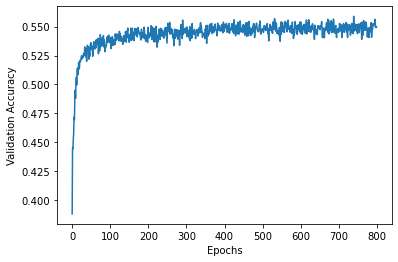

In [79]:
plt.plot(average_acc_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

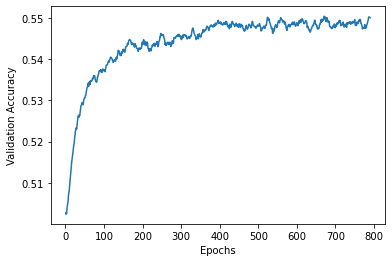

In [80]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_history = smooth_curve(average_acc_history[10:])
plt.plot(range(1, len(smooth_history) + 1), smooth_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

In [82]:
model = Sequential()
model.add(Dense(14,activation='relu',input_dim=11))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(ivs_train,quality_train,validation_data =(ivs_test,quality_test),epochs=265,verbose=0)

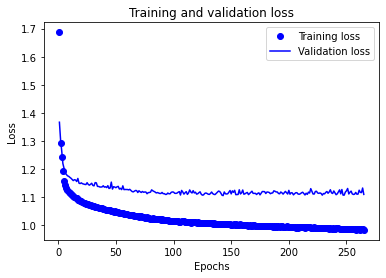

In [83]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

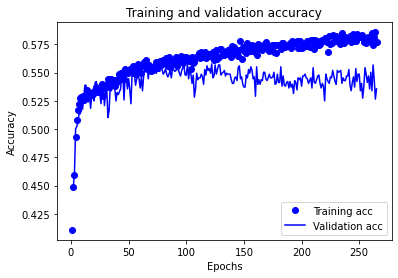

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

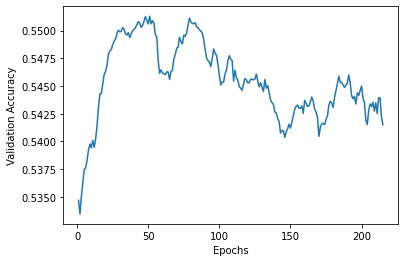

In [88]:
smooth_history = smooth_curve(history.history['val_accuracy'][50:])
plt.plot(range(1, len(smooth_history) + 1), smooth_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

In [135]:
best_accuracy=[]
for i in range(25,125,1):
    model = Sequential()
    model.add(Dense(14,activation='relu',input_dim=11))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    model.fit(ivs_train,quality_train,validation_data =(ivs_test,quality_test),epochs=i,verbose=0)
    results = model.evaluate(ivs_test,quality_test,verbose=0)
    best_accuracy.append((results,i))

In [137]:
best_accuracy[69]

([1.1209585666656494, 0.5559183955192566], 94)

In [ ]:


model.fit(ivs_train,quality_train,epochs=25,batch_size=100,verbose=2)
scores = model.evaluate(ivs_test,quality_test,verbose=0)


In [16]:
model = Sequential()
model.add(Dense(14,activation='relu',input_dim=11))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
start=datetime.datetime.now()
model.fit(ivs_train,quality_train,validation_data =(ivs_test,quality_test),epochs=94,batch_size=32,verbose=0)
results = model.evaluate(ivs_test,quality_test,verbose=0)
end=datetime.datetime.now()
print("Run Time:", end-start)

Run Time: 0:00:52.362001


In [160]:
results

[1.1201459169387817, 0.5551020503044128]

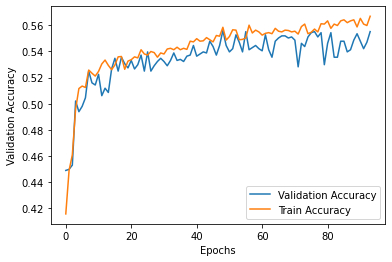

In [170]:
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

In [13]:
model = Sequential()
model.add(Dense(125,activation='relu',input_dim=11))
model.add(Dense(125,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(ivs_train,quality_train,validation_data =(ivs_test,quality_test),epochs=94,batch_size=32,verbose=0)
results = model.evaluate(ivs_test,quality_test,verbose=0)

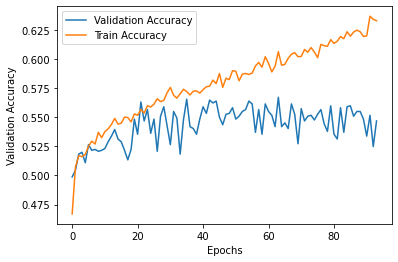

In [15]:
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()